# Validation for quantile scaling

In [23]:
import sys

import xarray as xr
import cmocean

sys.path.append('/home/599/dbi599/qq-workflows')
import validation
sys.path.append('/g/data/wp00/shared_code/qqscale')
import utils

In [2]:
# Parameters
adjustment_file = "/g/data/xv83/dbi599/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/ecdfm/task-projection/pr-ecdfm-multiplicative-monthly-q100-ssr-adjustment-factors_AGCD_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_19800101-19991231.nc"
qq_file = "/g/data/xv83/dbi599/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/ecdfm/task-projection/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20800101-20991231_ecdfm-multiplicative-monthly-q100-nearest-ssr-AGCD-19800101-19991231.nc"
hist_units = "mm day-1"
ref_units = "mm day-1"
target_units = "mm day-1"
output_units = "mm day-1"
hist_var = "pr"
ref_var = "pr"
target_var = "pr"
scaling = "multiplicative"
method = "ecdfm"
hist_files = "/g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19800101-19801231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19810101-19811231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19820101-19821231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19830101-19831231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19840101-19841231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19850101-19851231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19860101-19861231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19870101-19871231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19880101-19881231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19890101-19891231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19900101-19901231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19910101-19911231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19920101-19921231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19930101-19931231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19940101-19941231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19950101-19951231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19960101-19961231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19970101-19971231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19980101-19981231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_historical_r6i1p1f1_BOM-BARPA-R_v1_day_19990101-19991231.nc"
ref_files = "/g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19800101-19801231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19810101-19811231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19820101-19821231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19830101-19831231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19840101-19841231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19850101-19851231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19860101-19861231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19870101-19871231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19880101-19881231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19890101-19891231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19900101-19901231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19910101-19911231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19920101-19921231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19930101-19931231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19940101-19941231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19950101-19951231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19960101-19961231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19970101-19971231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19980101-19981231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_19990101-19991231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20000101-20001231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20010101-20011231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20020101-20021231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20030101-20031231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20040101-20041231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20050101-20051231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20060101-20061231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20070101-20071231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20080101-20081231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20090101-20091231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20100101-20101231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20110101-20111231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20120101-20121231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20130101-20131231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20140101-20141231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20150101-20151231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20160101-20161231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20170101-20171231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20180101-20181231.nc /g/data/ia39/npcp/data/pr/observations/AGCD/raw/task-reference/pr_NPCP-20i_AGCD_v1-0-1_day_20190101-20191231.nc"
target_files = "/g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20800101-20801231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20810101-20811231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20820101-20821231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20830101-20831231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20840101-20841231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20850101-20851231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20860101-20861231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20870101-20871231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20880101-20881231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20890101-20891231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20900101-20901231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20910101-20911231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20920101-20921231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20930101-20931231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20940101-20941231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20950101-20951231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20960101-20961231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20970101-20971231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20980101-20981231.nc /g/data/ia39/npcp/data/pr/CSIRO-ACCESS-ESM1-5/BOM-BARPA-R/raw/task-reference/pr_NPCP-20i_CSIRO-ACCESS-ESM1-5_ssp370_r6i1p1f1_BOM-BARPA-R_v1_day_20990101-20991231.nc"
hist_time_bounds = "1980-01-01 1999-12-31"
ref_time_bounds = "1980-01-01 1999-12-31"
target_time_bounds = "2080-01-01 2099-12-31"

In [3]:
# Required parameters
assert 'method' in locals(), "Must provide the method - qdm or ecdfm (options -p method {name})"
assert 'scaling' in locals(), "Must provide the scaling method (option -p scaling {name})"
assert 'hist_var' in locals(), "Must provide an historical variable name (option -p hist_var {name})"
assert 'ref_var' in locals(), "Must provide a reference variable name (option -p ref_var {name})"
assert 'target_var' in locals(), "Must provide a target variable name (option -p target_var {name})"
assert 'hist_units' in locals(), "Must provide historical units (option -p hist_units {units})"
assert 'ref_units' in locals(), "Must provide reference units (option -p ref_units {units})"
assert 'target_units' in locals(), "Must provide target units (option -p target_units {units})"
assert 'output_units' in locals(), "Must provide output units (option -p output_units {units})"
assert 'adjustment_file' in locals(), "Must provide an adjustment factors file (option -p adjustment_file {file path})"
assert 'hist_files' in locals(), """Must provide historical data files (option -p hist_files {"file paths"})"""
assert 'ref_files' in locals(), """Must provide reference data files (option -p ref_files {"file paths"})"""
assert 'target_files' in locals(), """Must provide target data files (option -p target_files {"file paths"})"""
assert 'qq_file' in locals(), "Must provide an qq-scaled data file (option -p qq_file {file path})"
assert 'hist_time_bounds' in locals(), """Must provide time bounds for historical data (option -p hist_time_bounds {"YYYY-MM-DD YYYY-MM-DD"})"""
assert 'ref_time_bounds' in locals(), """Must provide time bounds for reference data (option -p ref_time_bounds {"YYYY-MM-DD YYYY-MM-DD"})"""
assert 'target_time_bounds' in locals(), """Must provide time bounds for target data (option -p target_time_bounds {"YYYY-MM-DD YYYY-MM-DD"})"""

In [4]:
hist_files = hist_files.split()
ref_files = ref_files.split()
target_files = target_files.split()

hist_time_bounds = hist_time_bounds.split()
ref_time_bounds = ref_time_bounds.split()
target_time_bounds = target_time_bounds.split()

In [5]:
plot_config = {}
plot_config['pct_change_levels'] = [64, 72, 80, 88, 96, 104, 112, 120, 128, 136]
plot_config['pct_diff_levels'] = [-65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65]
plot_config['plot_pdfs_flag'] = True
plot_config['plot_1d_quantiles_flag'] = True
mask_ocean = False
if hist_var == 'tasmin':
    plot_config['pdf_xbounds'] = (-5, 30)
    plot_config['pdf_ybounds'] = None
    plot_config['q_xbounds'] = (0, 100)
    plot_config['regular_cmap'] = cmocean.cm.thermal
    plot_config['diverging_cmap'] = 'RdBu_r'
    plot_config['general_levels'] = [-4.0, -2.5, -1, 0.5, 2, 3.5, 5, 6.5, 8, 9.5, 11, 12.5, 14, 15.5, 17, 18.5, 20, 21.5]
    plot_config['af_levels'] = None
    plot_config['difference_levels'] = [-2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5]
    mask_ocean = True
elif hist_var == 'tasmax':
    plot_config['pdf_xbounds'] = (0, 45)
    plot_config['pdf_ybounds'] = None
    plot_config['q_xbounds'] = (0, 100)
    plot_config['regular_cmap'] = cmocean.cm.thermal
    plot_config['diverging_cmap'] = 'RdBu_r'
    plot_config['general_levels'] = [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35]
    plot_config['af_levels'] = None
    plot_config['difference_levels'] = [-2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5]
    mask_ocean = True
elif hist_var == 'pr':
    plot_config['plot_pdfs_flag'] = False
    plot_config['pdf_xbounds'] = (5, 80)
    plot_config['pdf_ybounds'] = (0, 0.02)
    plot_config['q_xbounds'] = (80, 100)
    plot_config['regular_cmap'] = cmocean.cm.rain
    plot_config['diverging_cmap'] = 'BrBG'
    plot_config['general_levels'] = [0, 0.01, 0.25, 0.5, 1, 2, 5, 10, 20, 40, 60]
    plot_config['af_levels'] = [0.125, 0.25, 0.5, 0.67, 0.8, 1, 1.25, 1.5, 2, 4, 8]
    plot_config['difference_levels'] = [-32.0, -16.0, -8.0, -4.0, -2.0, -1.0, -0.5, -0.25, 0, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
else:
    raise ValueError(f'No plotting configuration defined for {hist_var}')

In [6]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

## Read data

In [7]:
ds_adjust = xr.open_dataset(adjustment_file)

In [8]:
ds_hist = utils.read_data(
    hist_files,
    hist_var,
    time_bounds=hist_time_bounds,
    input_units=hist_units,
    output_units=output_units,
)

In [9]:
ds_ref = utils.read_data(
    ref_files,
    ref_var,
    time_bounds=ref_time_bounds,
    input_units=ref_units,
    output_units=output_units,
)

In [10]:
ds_target = utils.read_data(
    target_files,
    target_var,
    time_bounds=target_time_bounds,
    input_units=target_units,
    output_units=output_units
)

In [11]:
ds_qq = xr.open_dataset(qq_file)

## Australia-wide

In [12]:
hist_clim = ds_hist[hist_var].mean('time', keep_attrs=True).compute()
ref_clim = ds_ref[ref_var].mean('time', keep_attrs=True).compute()
target_clim = ds_target[target_var].mean('time', keep_attrs=True).compute()
qq_clim = ds_qq[target_var].mean('time', keep_attrs=True).compute()

In [13]:
if hist_var == 'pr':
    mask = qq_clim > 0.1
else:
    mask = None

#### QDM

GCM change = ref (ssp) - hist  
QQ change = qq - target (obs)

#### eCDFm

GCM change = target (ssp) - hist  
QQ change = qq - ref (obs)

In [14]:
ref_hist_comparison = validation.spatial_comparison_data(ref_clim, hist_clim, scaling)
qq_target_comparison = validation.spatial_comparison_data(qq_clim, target_clim, scaling)
target_hist_comparison = validation.spatial_comparison_data(target_clim, hist_clim, scaling)
qq_ref_comparison = validation.spatial_comparison_data(qq_clim, ref_clim, scaling)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar bu

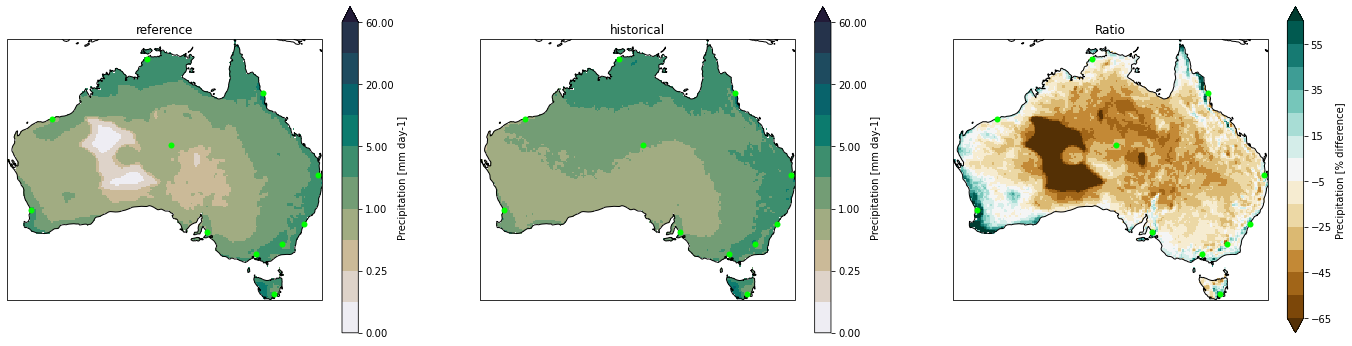

In [28]:
validation.spatial_comparison_plot(
    ref_clim,
    hist_clim,
    ref_hist_comparison,
    'reference',
    'historical',
    plot_config['regular_cmap'],
    plot_config['diverging_cmap'],
    plot_config['general_levels'],
    plot_config['pct_diff_levels'],
    scaling,
    city_lat_lon=city_lat_lon,
    mask=None,
    land_only=True,
    outfile='pr_ref-hist-comparison_CSIRO-ACCESS-ESM1-5_BOM-BARPA-R.png'
)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar bu

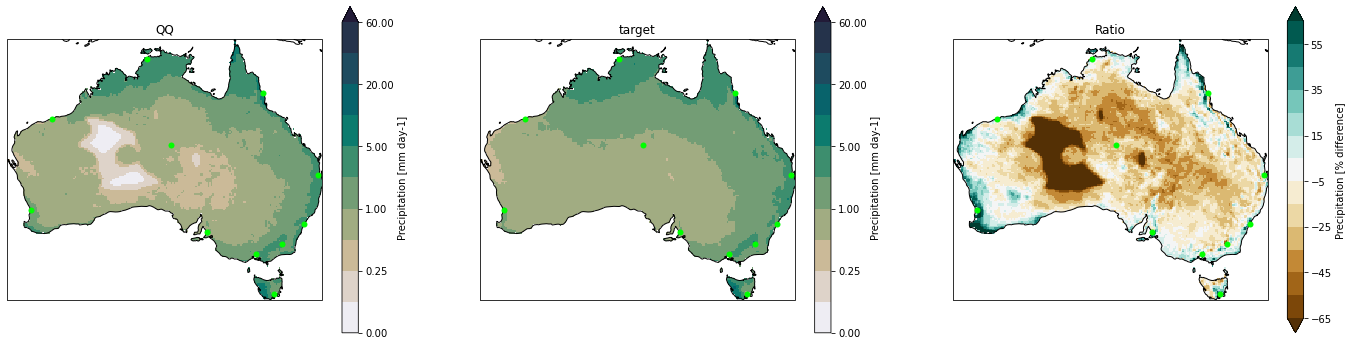

In [16]:
validation.spatial_comparison_plot(
    qq_clim,
    target_clim,
    qq_target_comparison,
    'QQ',
    'target',
    plot_config['regular_cmap'],
    plot_config['diverging_cmap'],
    plot_config['general_levels'],
    plot_config['pct_diff_levels'],
    scaling,
    city_lat_lon=city_lat_lon,
    mask=None,
    land_only=True,
)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar bu

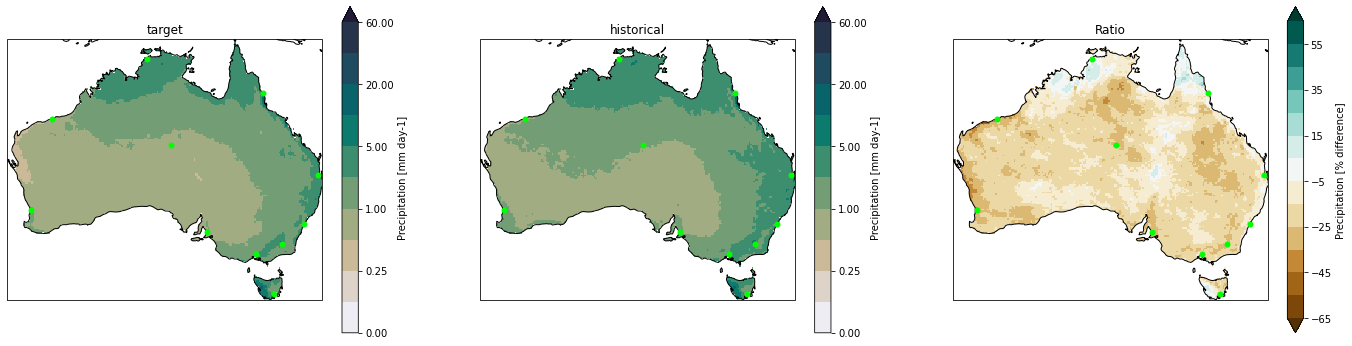

In [17]:
validation.spatial_comparison_plot(
    target_clim,
    hist_clim,
    target_hist_comparison,
    'target',
    'historical',
    plot_config['regular_cmap'],
    plot_config['diverging_cmap'],
    plot_config['general_levels'],
    plot_config['pct_diff_levels'],
    scaling,
    city_lat_lon=city_lat_lon,
    mask=None,
    land_only=True,
)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar bu

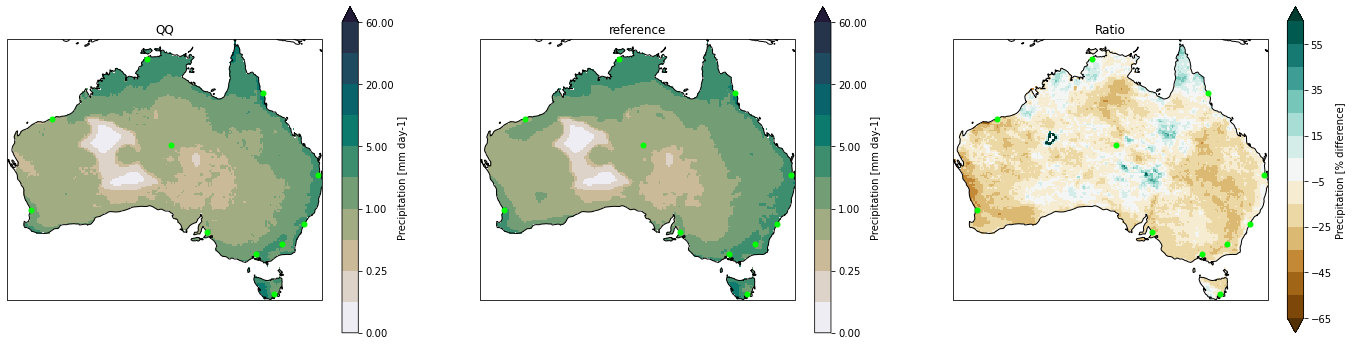

In [18]:
validation.spatial_comparison_plot(
    qq_clim,
    ref_clim,
    qq_ref_comparison,
    'QQ',
    'reference',
    plot_config['regular_cmap'],
    plot_config['diverging_cmap'],
    plot_config['general_levels'],
    plot_config['pct_diff_levels'],
    scaling,
    city_lat_lon=city_lat_lon,
    mask=None,
    land_only=True,
)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar bu

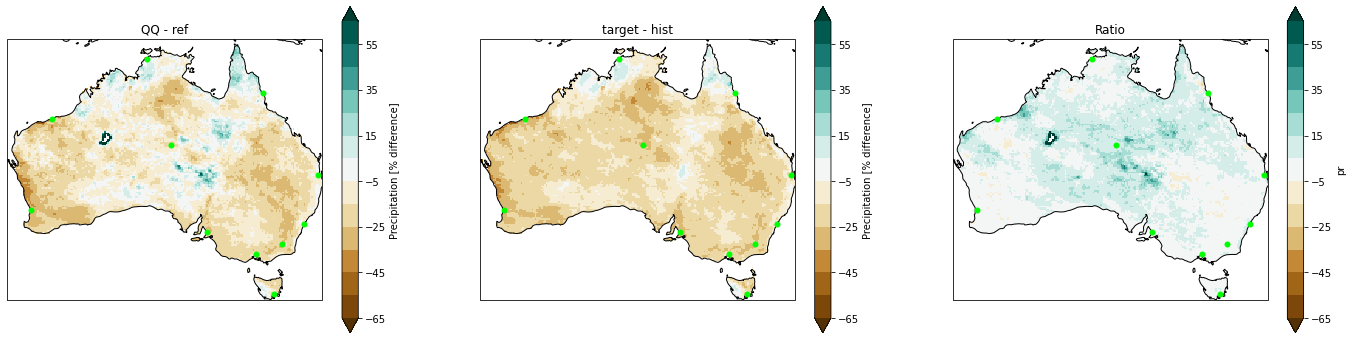

In [29]:
change_diff = qq_ref_comparison - target_hist_comparison

validation.spatial_comparison_plot(
    qq_ref_comparison,
    target_hist_comparison,
    change_diff,
    'QQ - ref',
    'target - hist',
    plot_config['diverging_cmap'],
    plot_config['diverging_cmap'],
    plot_config['pct_diff_levels'],
    plot_config['pct_diff_levels'],
    scaling,
    city_lat_lon=city_lat_lon,
    mask=None,
    land_only=True,
    clim_extend='both',
    outfile='pr_trend-comparison_CSIRO-ACCESS-ESM1-5_BOM-BARPA-R.png'
)

## Points of interest

In [25]:
def plot_city(city):
    """Generate plots for a city"""
    
    lat, lon = city_lat_lon[city]
    
    validation.single_point_analysis(
        ds_hist[hist_var],
        ds_ref[ref_var],
        ds_target[target_var],
        ds_qq[target_var],
        ds_adjust,
        hist_var,
        city,
        lat,
        lon,
        plot_config['regular_cmap'],
        plot_config['diverging_cmap'],
        plot_config['diverging_cmap'],
        plot_config['general_levels'],
        plot_config['af_levels'],
        plot_config['difference_levels'],
        pdf_xbounds=plot_config['pdf_xbounds'],
        pdf_ybounds=plot_config['pdf_ybounds'],
        q_xbounds=plot_config['q_xbounds'],
        months=[1,2,3,4,5,6,7,8,9,10,11,12],
        plot_1d_quantiles=plot_config['plot_1d_quantiles_flag'],
        plot_pdfs=plot_config['plot_pdfs_flag'],
        seasonal_agg='mean',
    )

HOBART


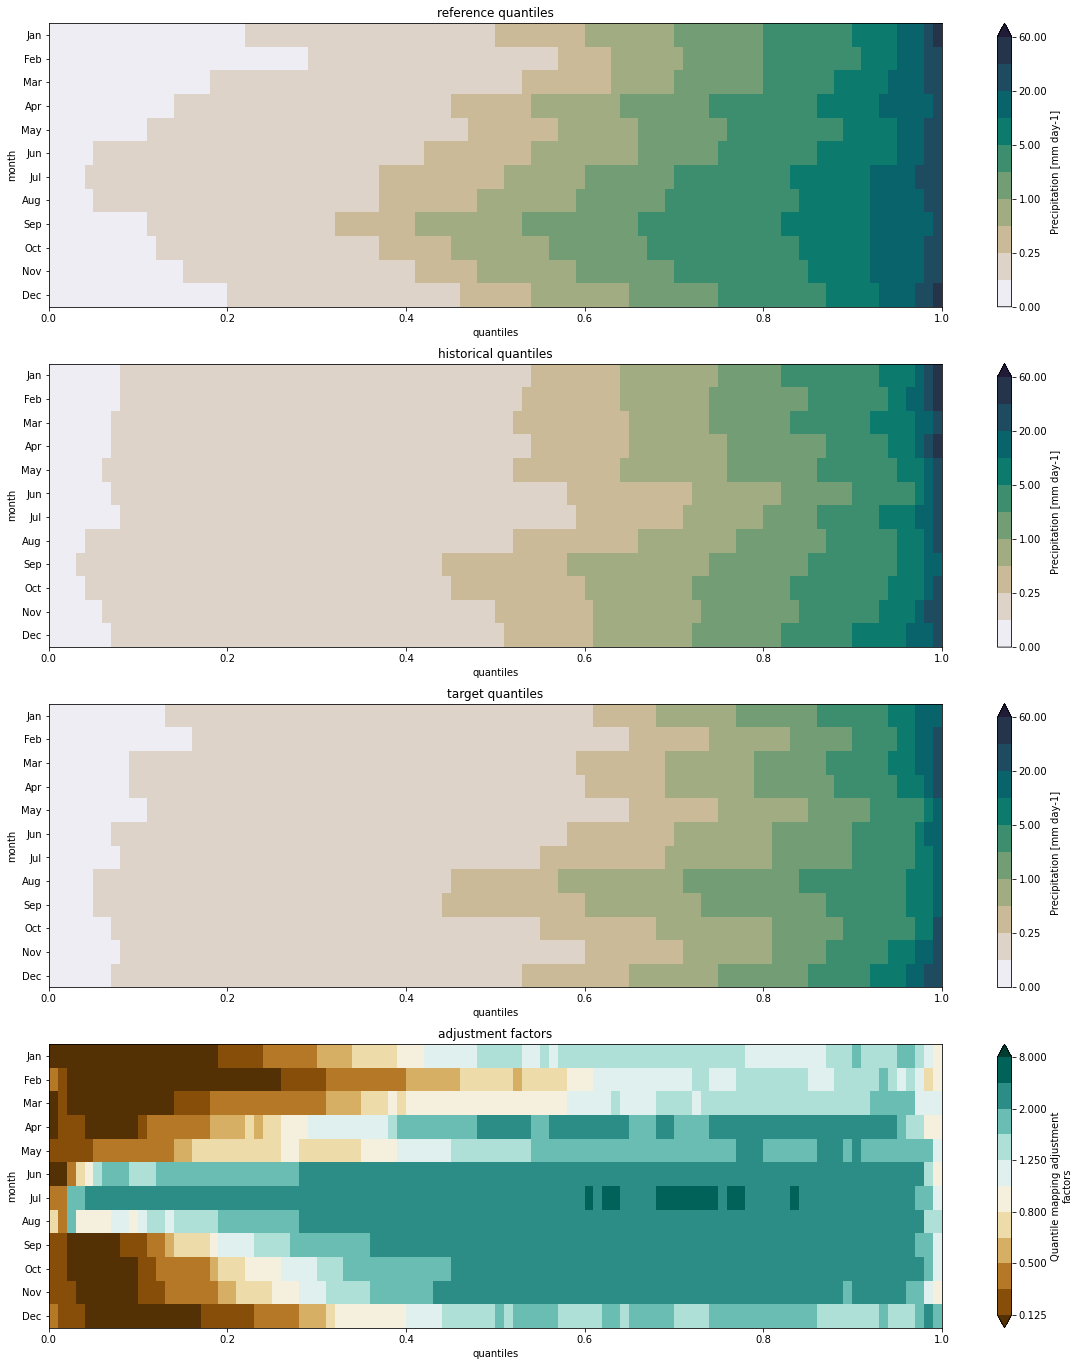

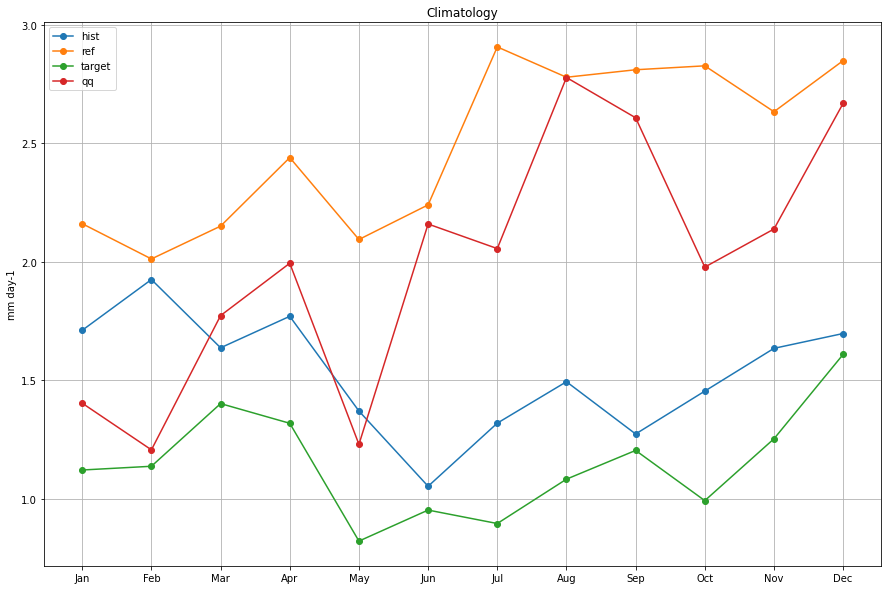

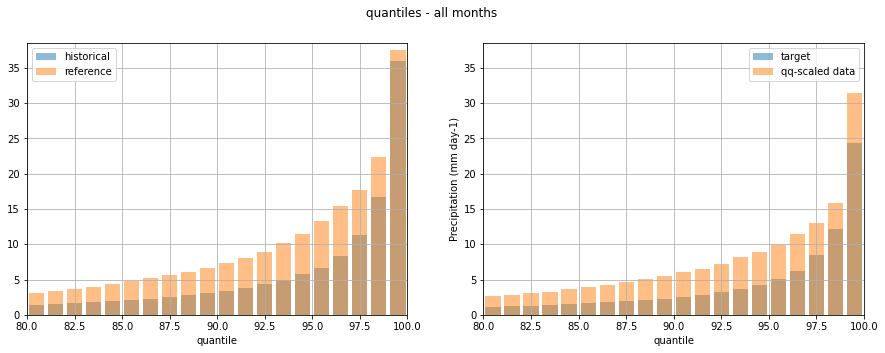

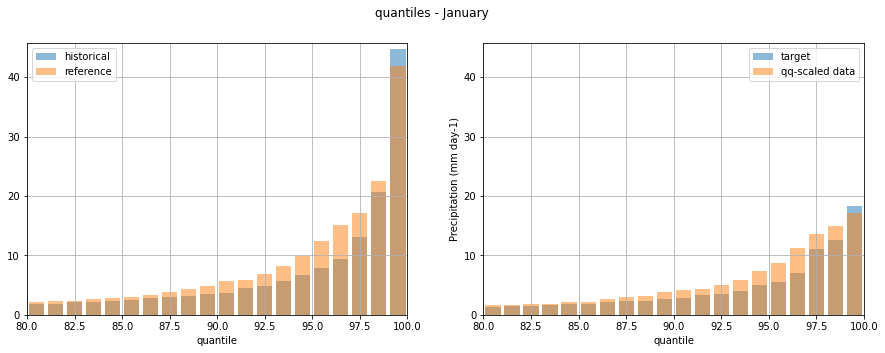

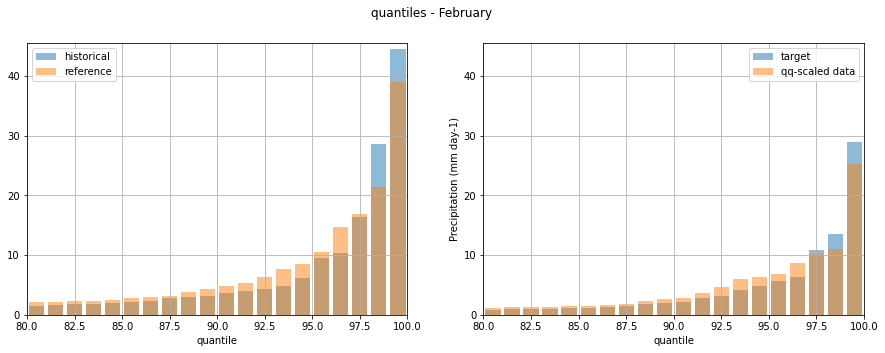

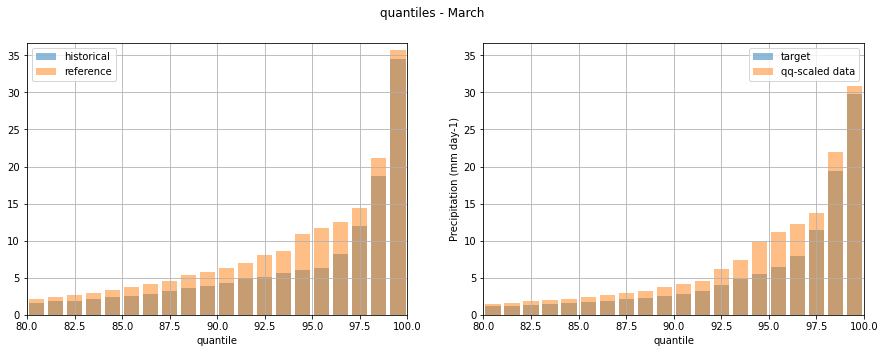

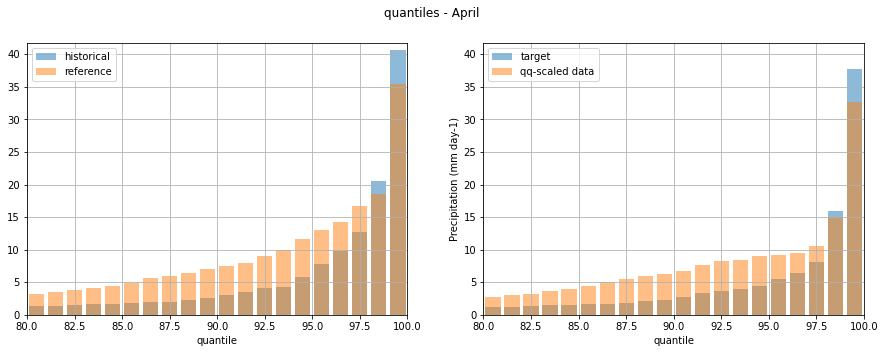

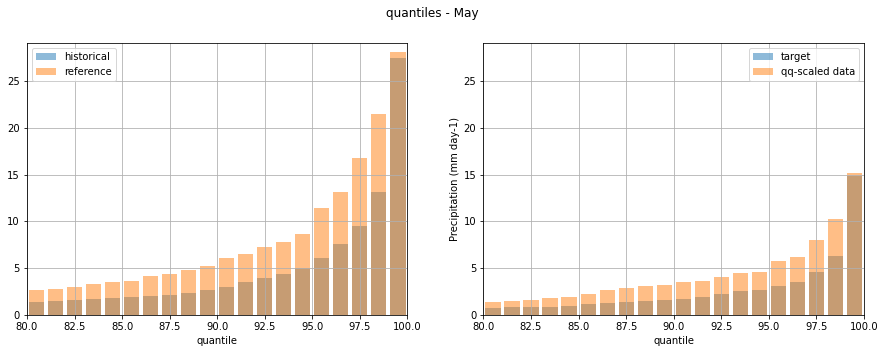

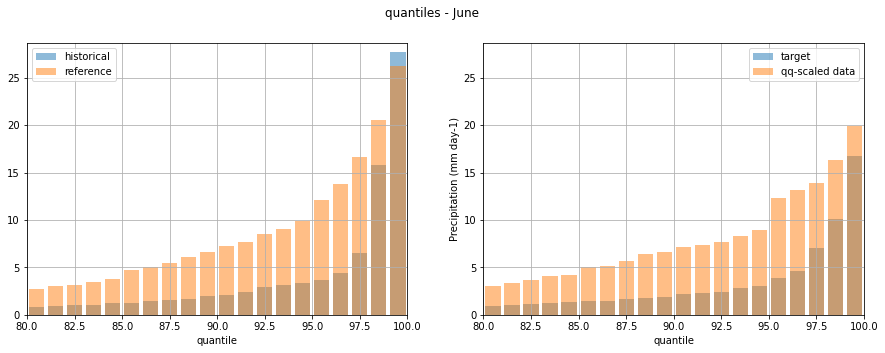

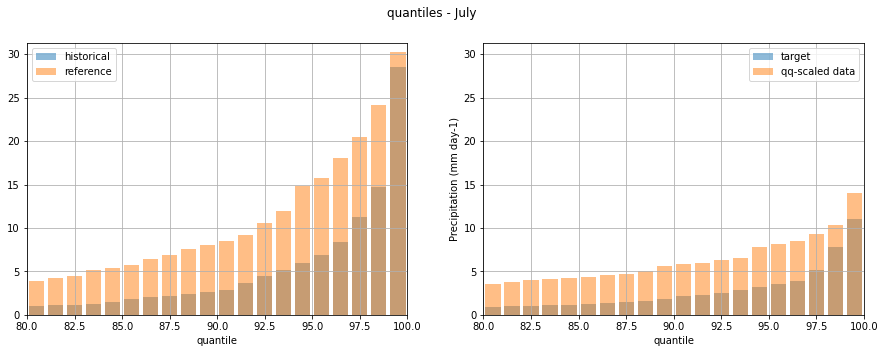

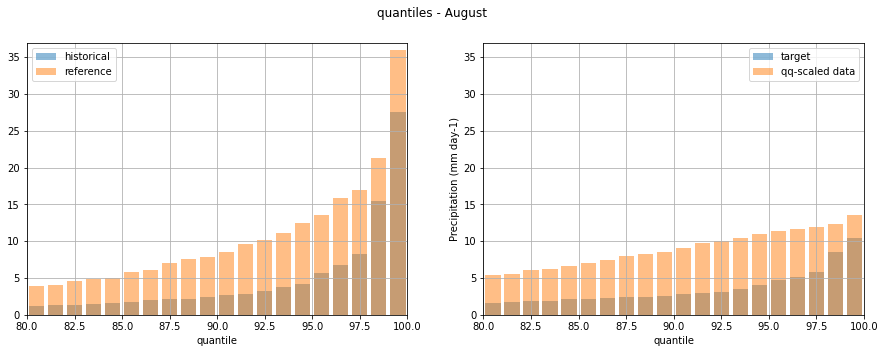

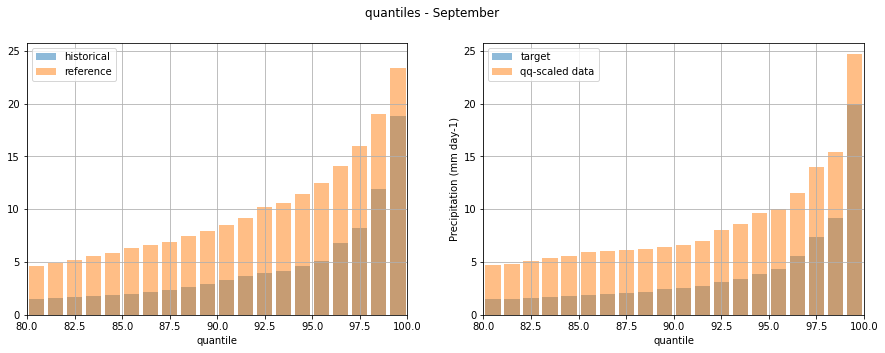

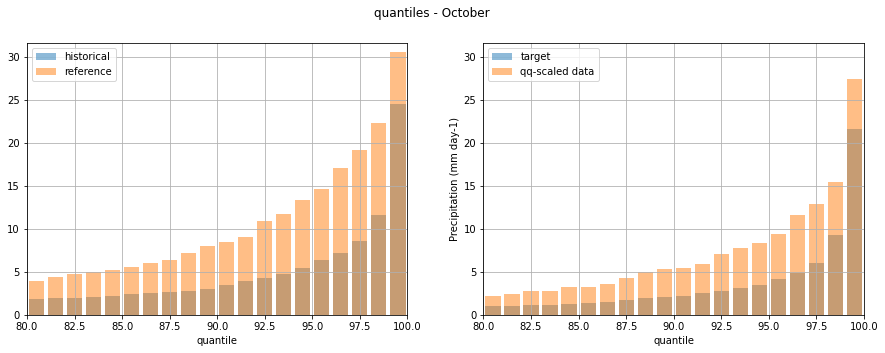

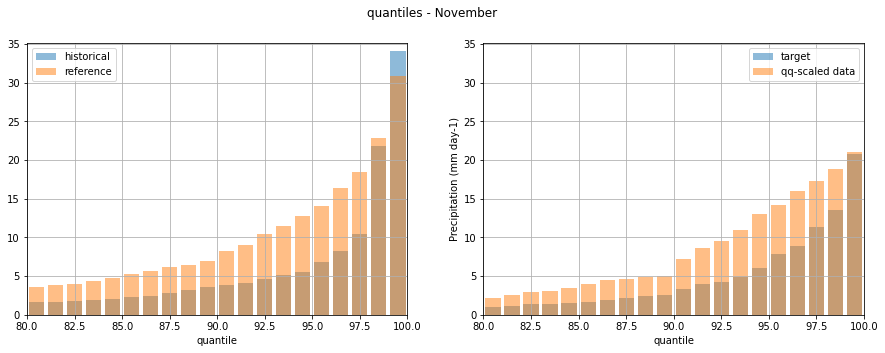

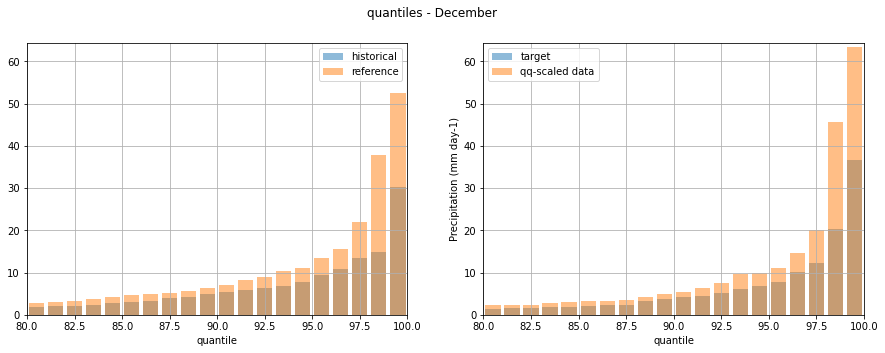

In [26]:
plot_city('Hobart')

MELBOURNE


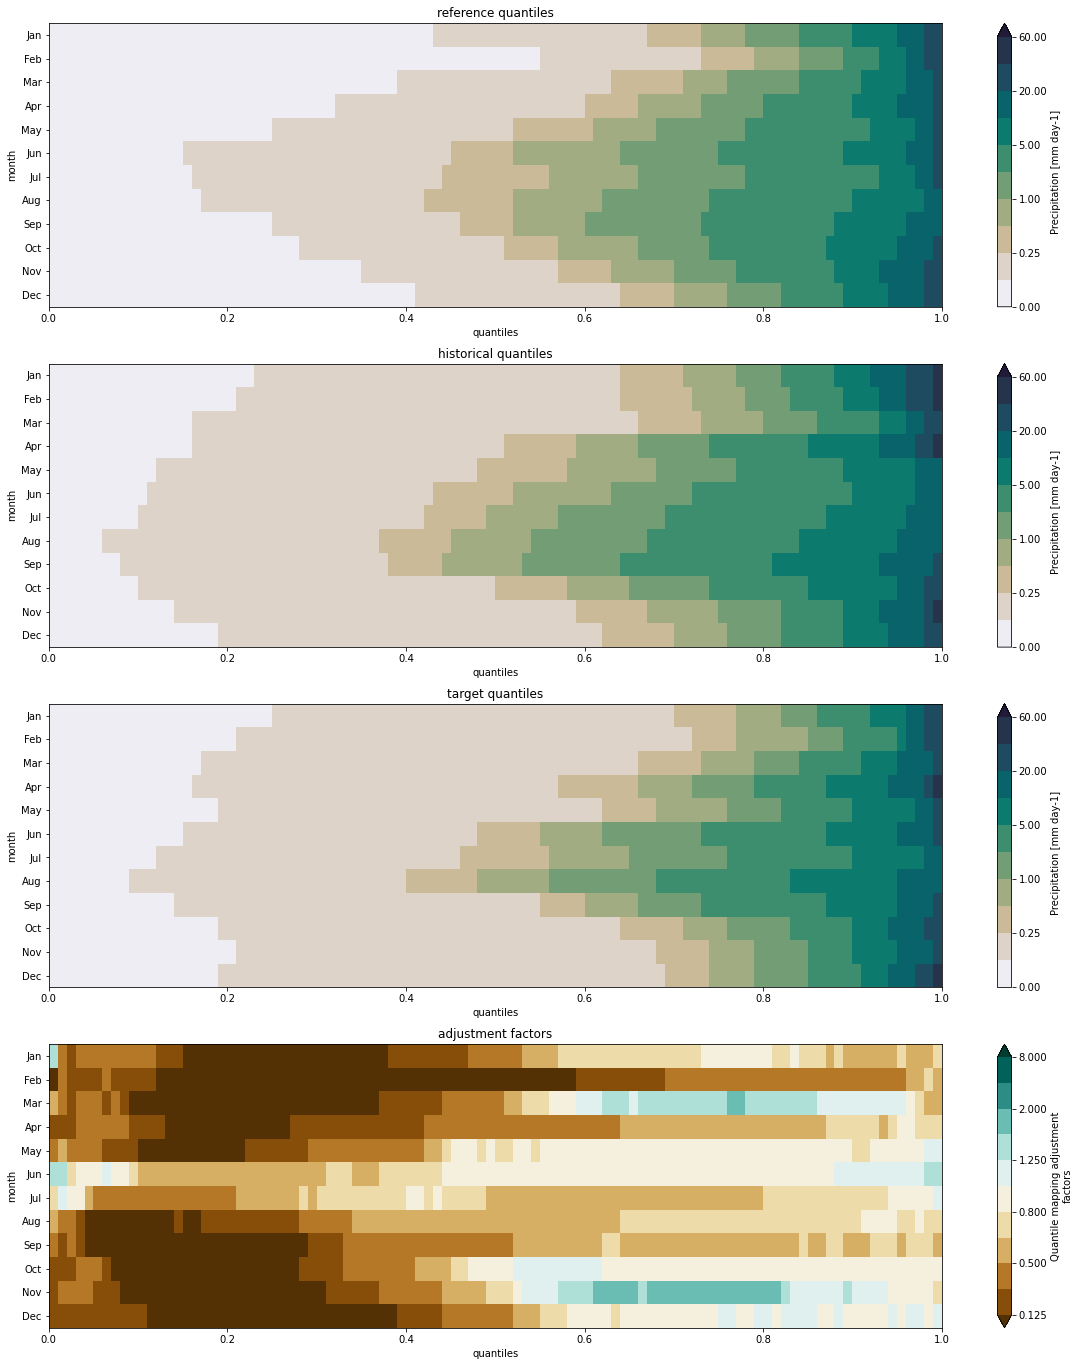

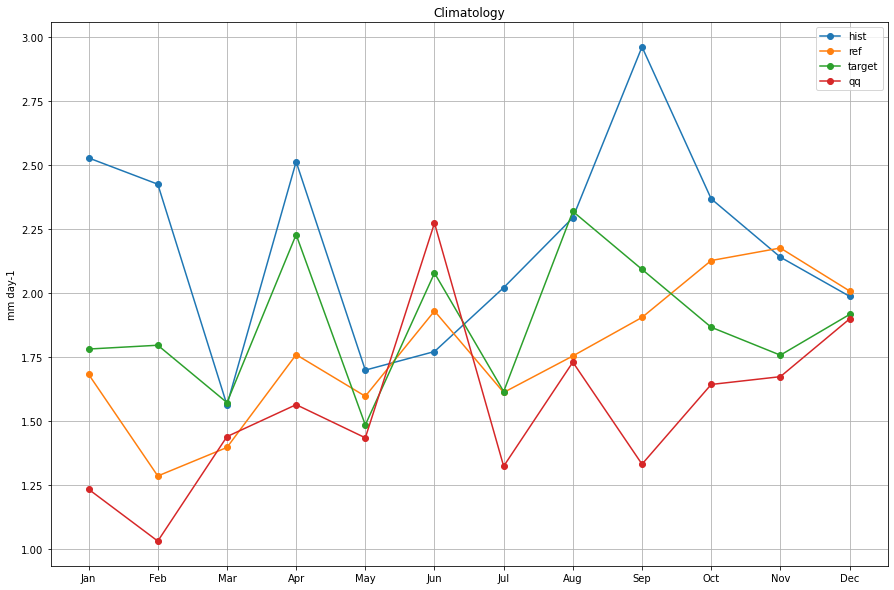

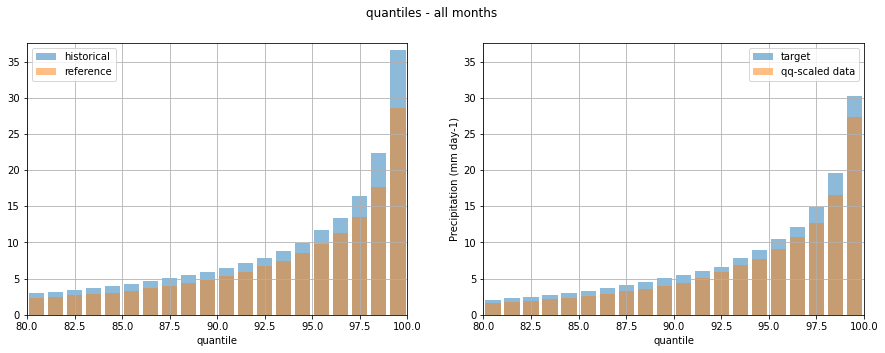

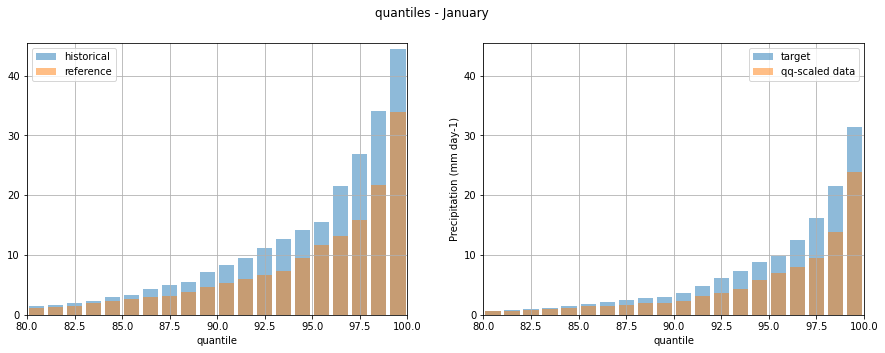

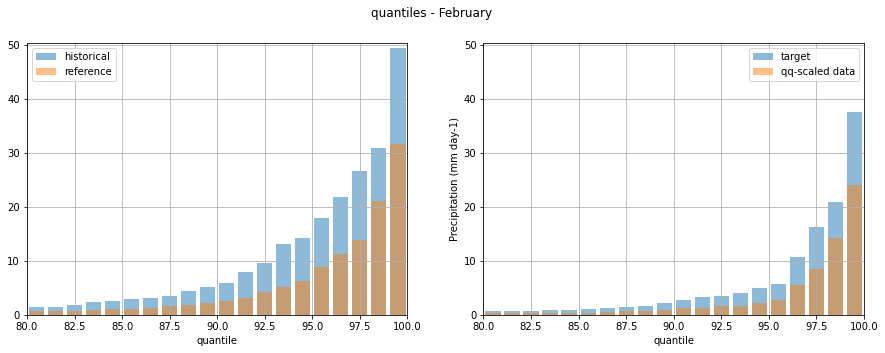

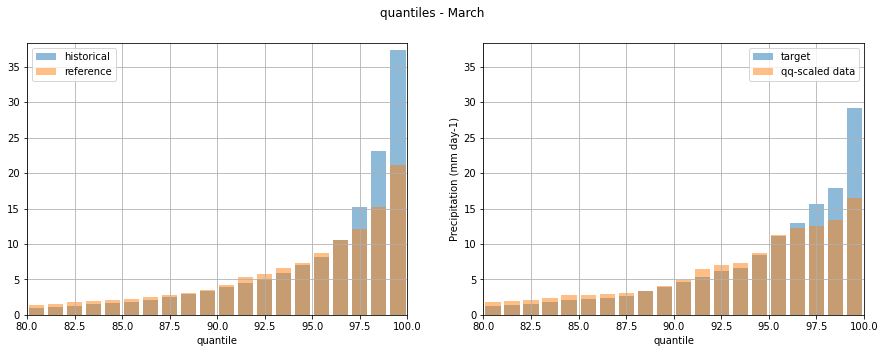

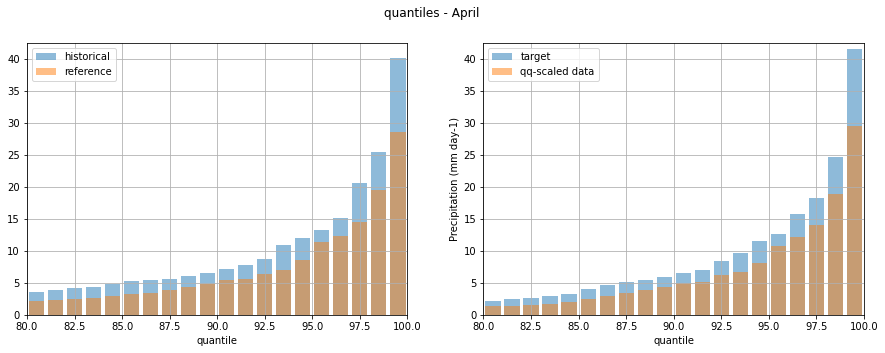

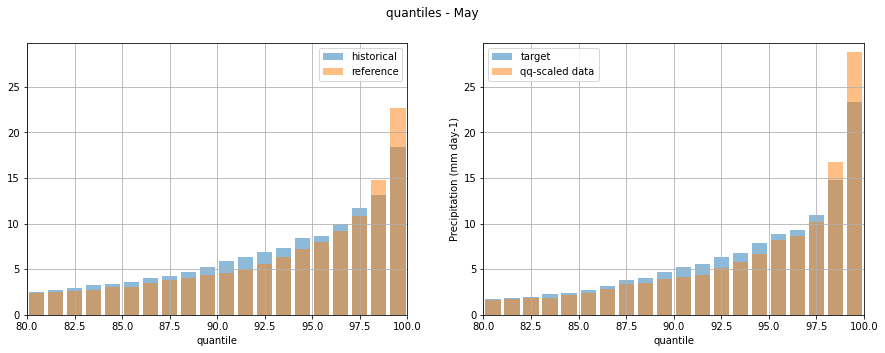

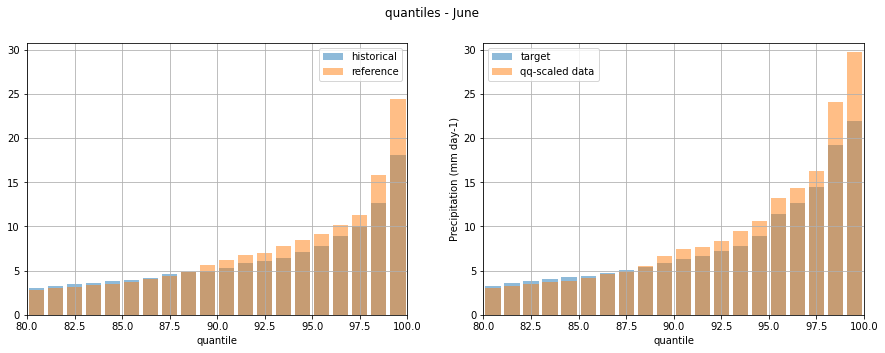

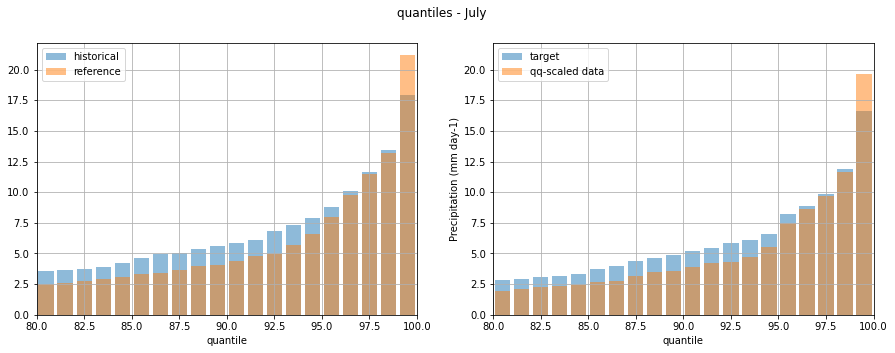

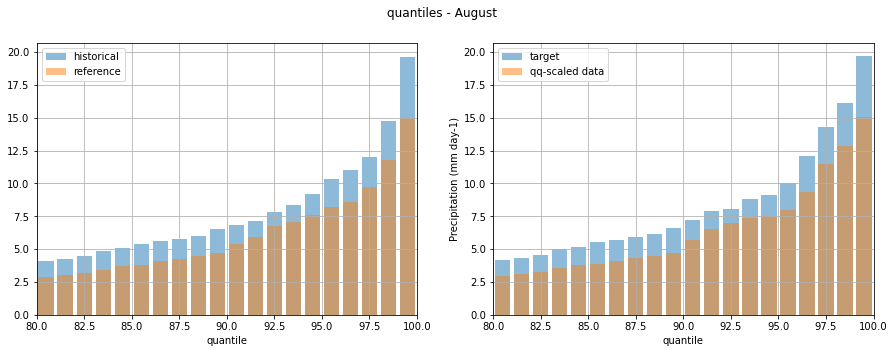

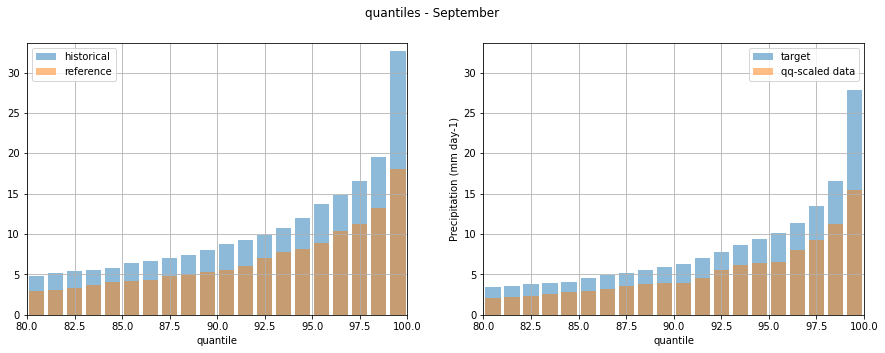

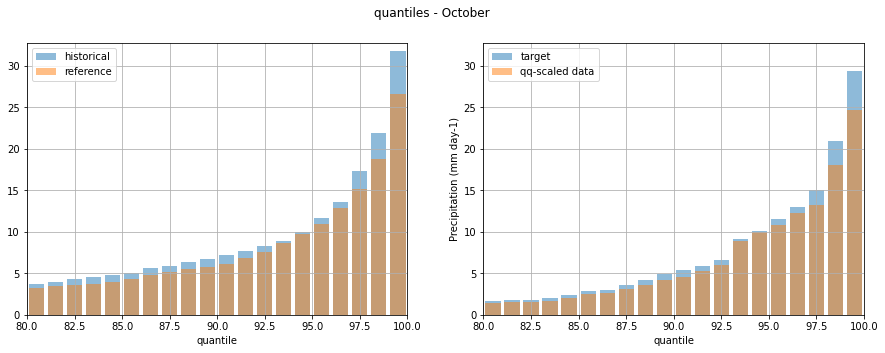

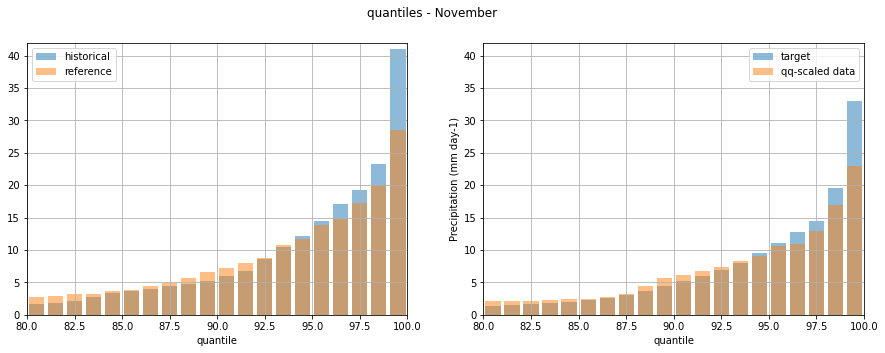

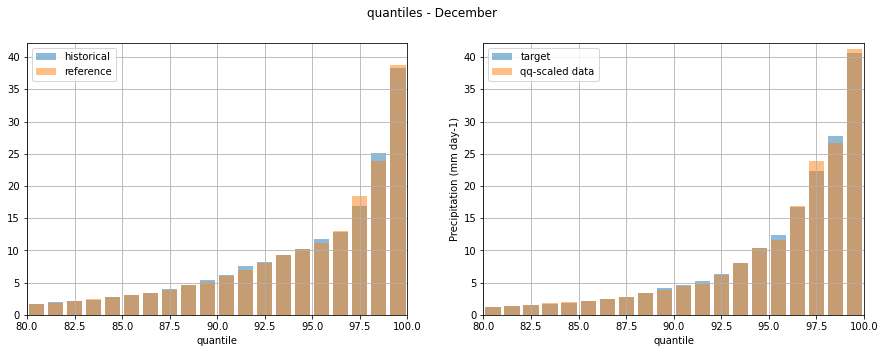

In [30]:
plot_city('Melbourne')

THREDBO


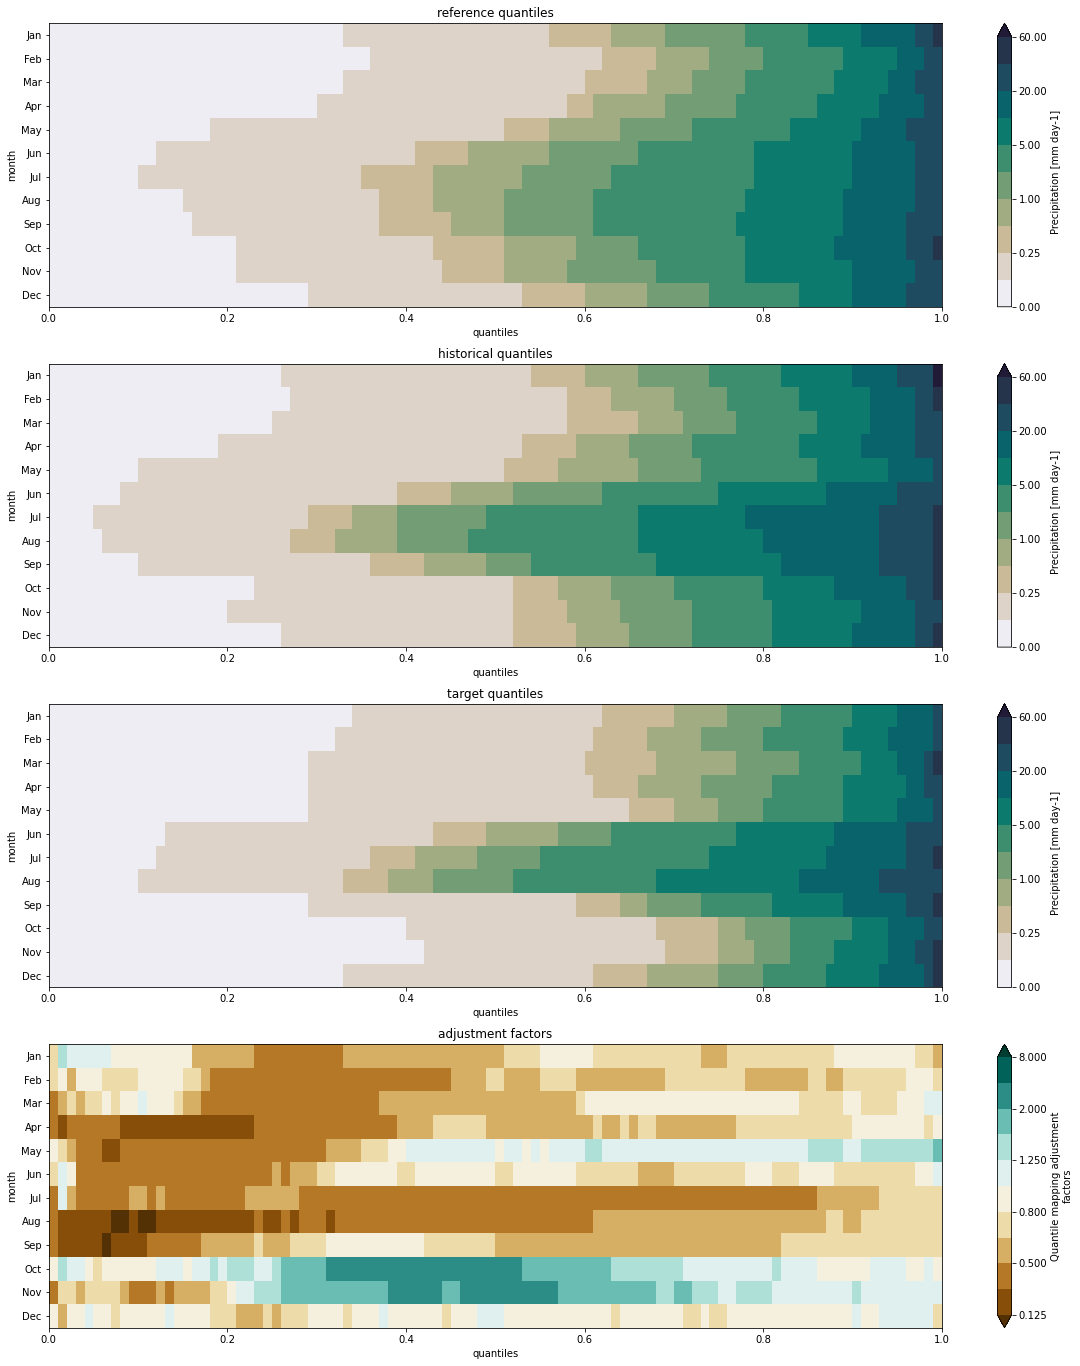

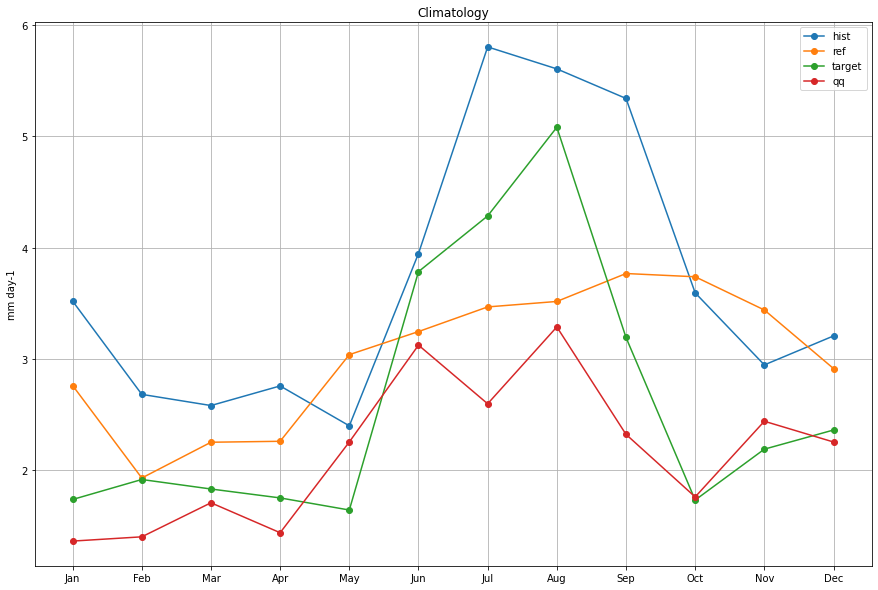

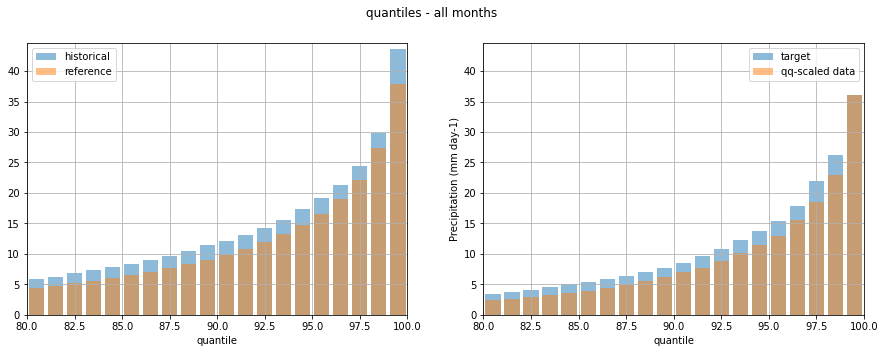

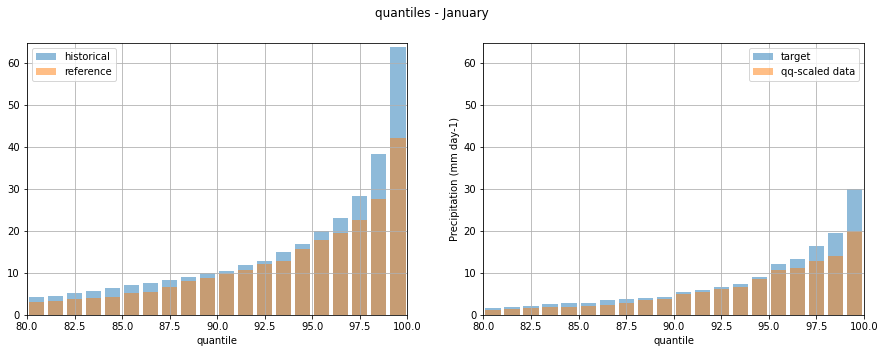

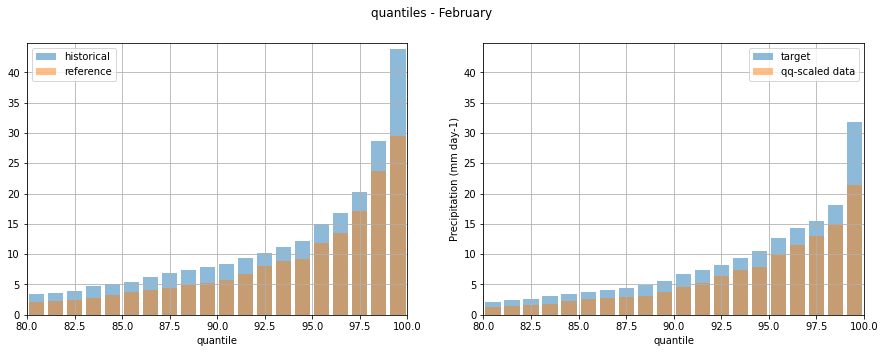

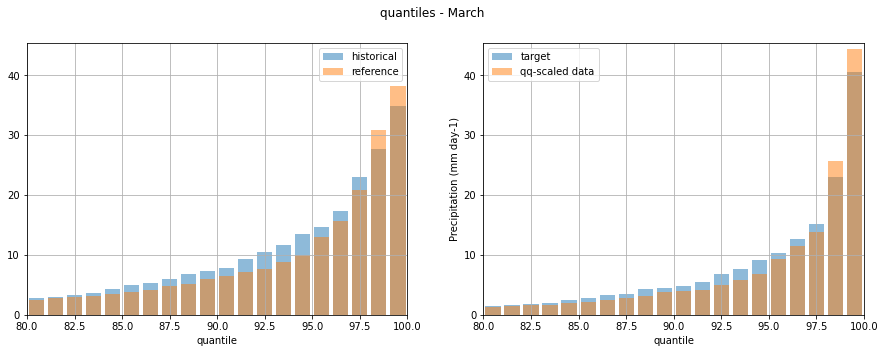

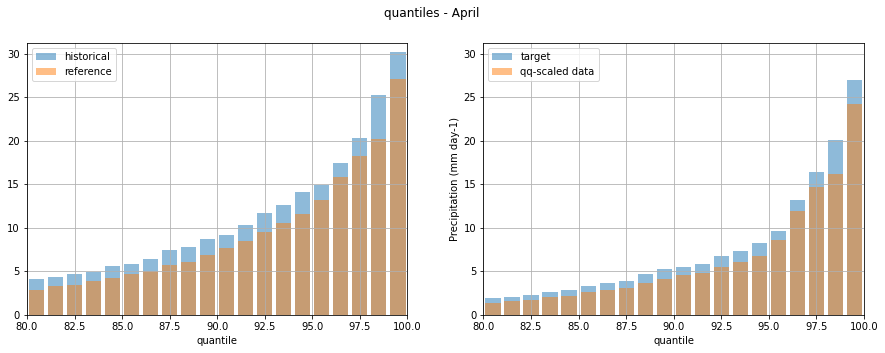

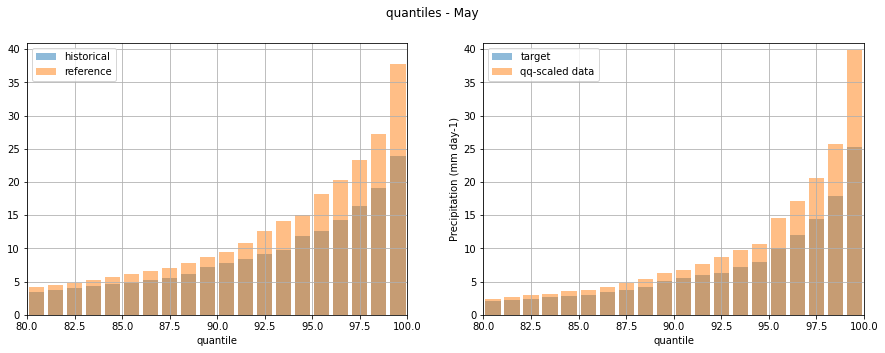

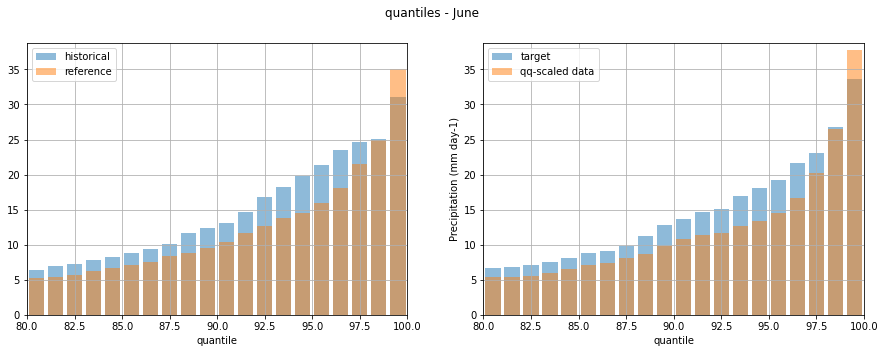

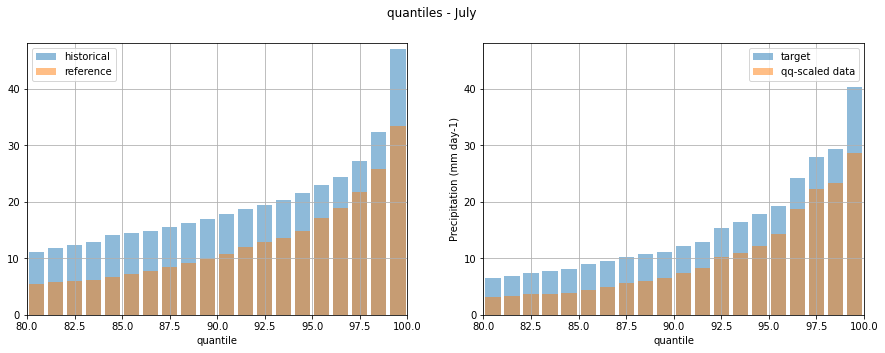

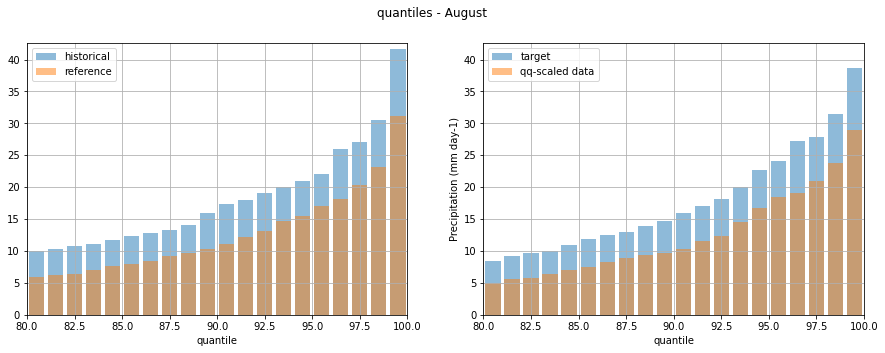

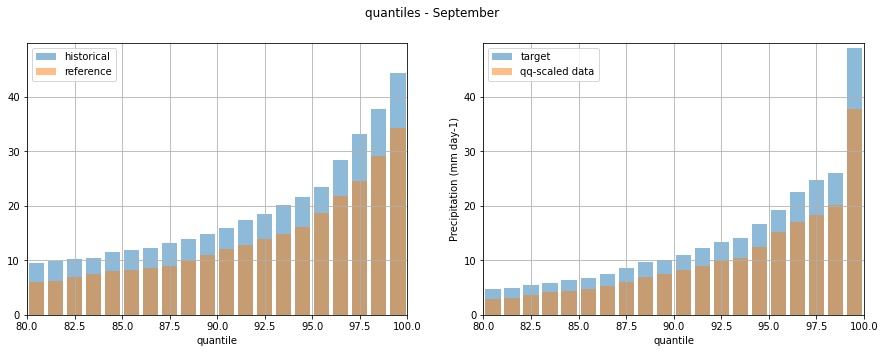

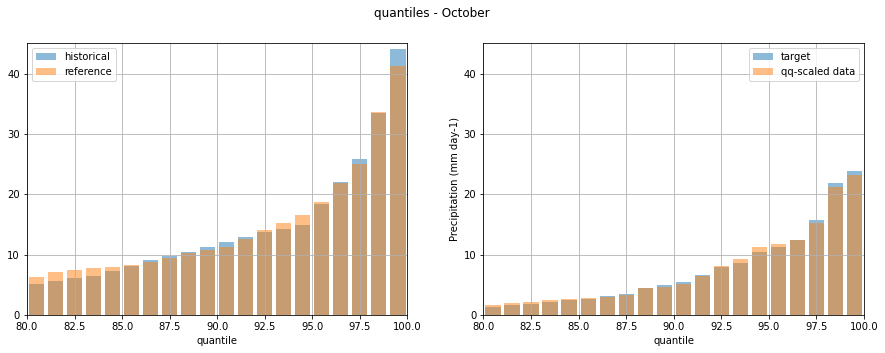

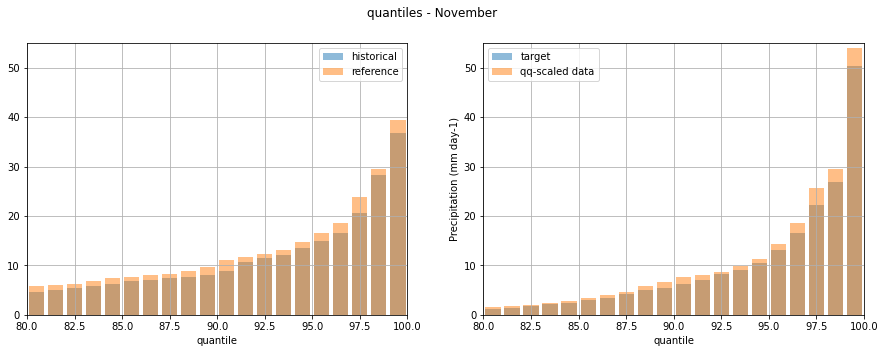

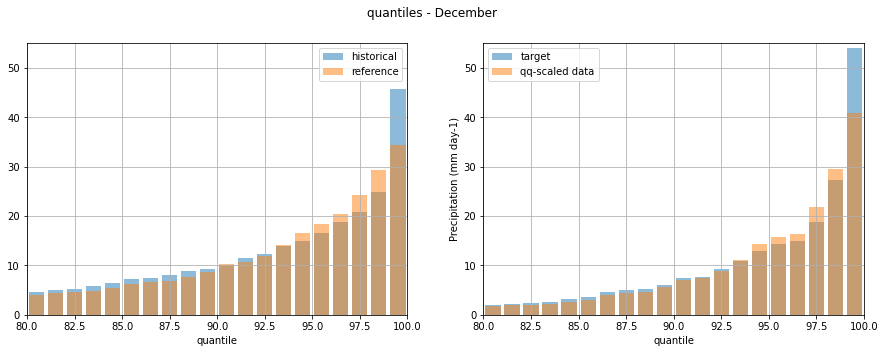

In [31]:
plot_city('Thredbo')

SYDNEY


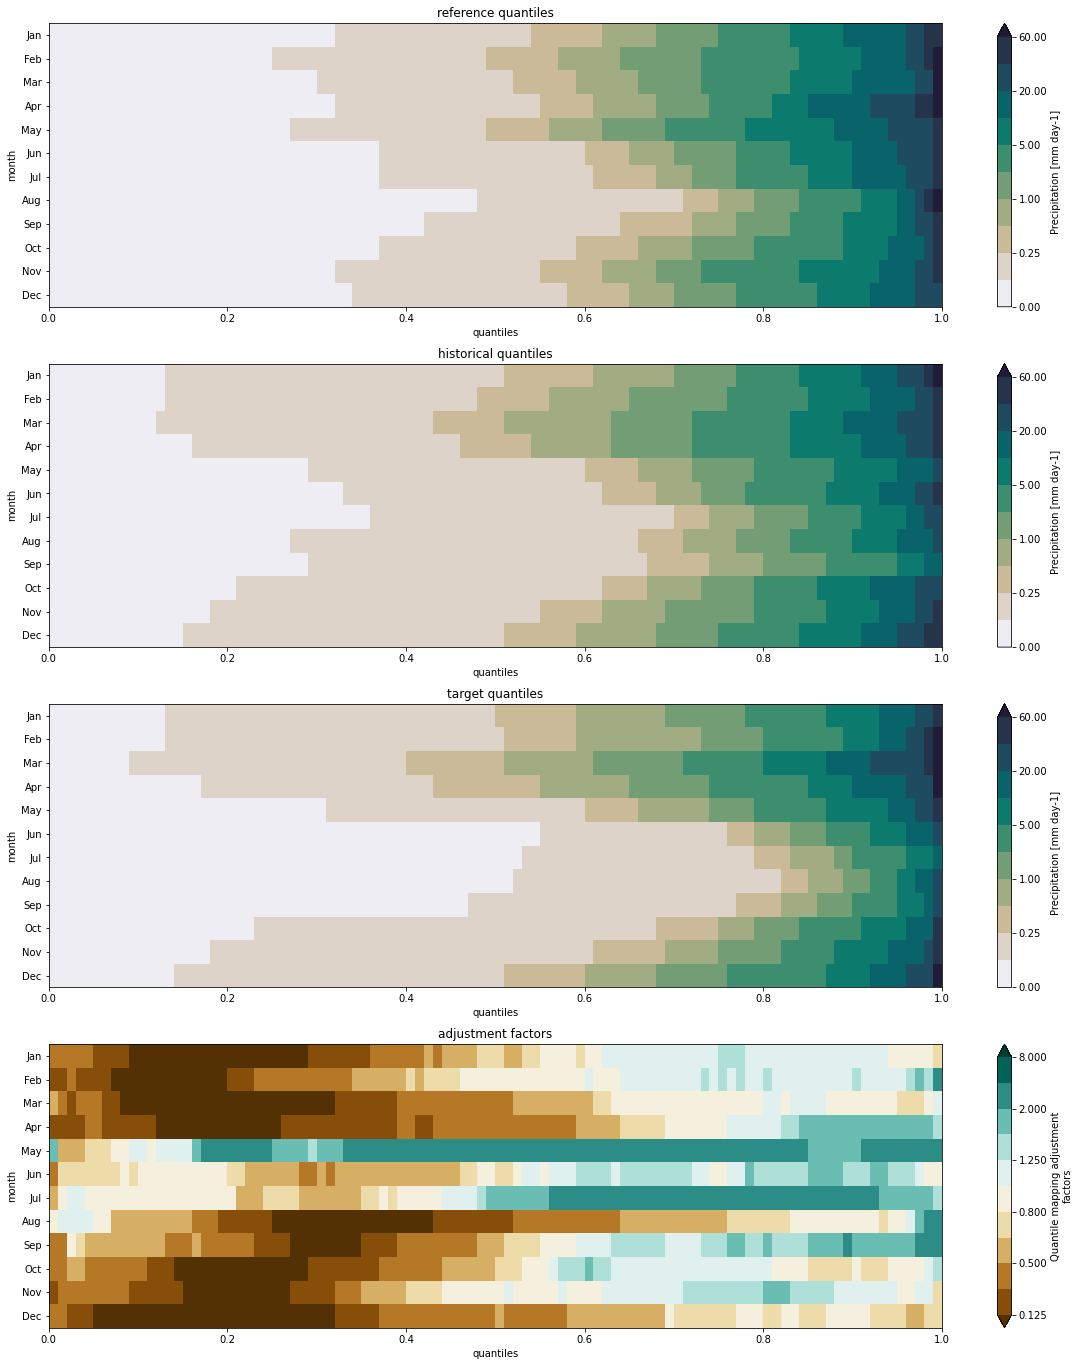

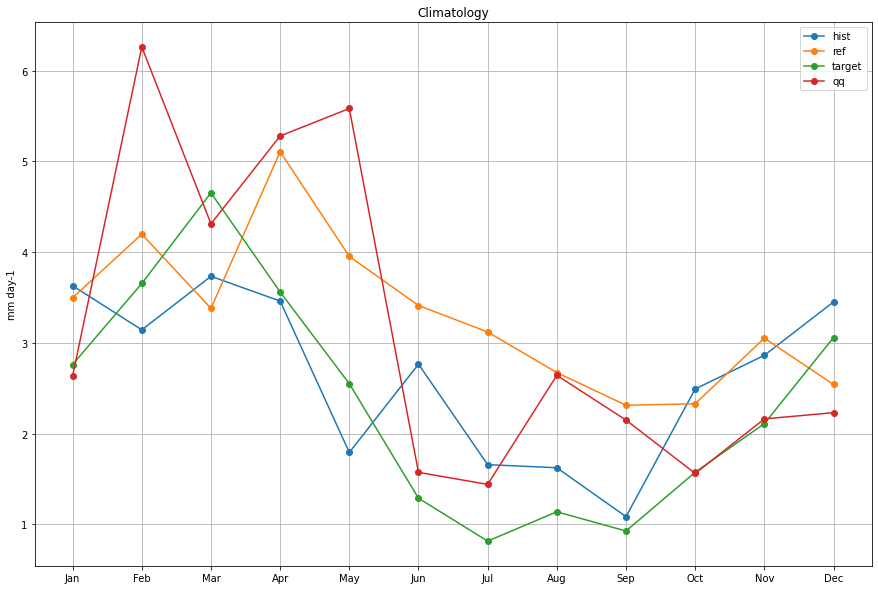

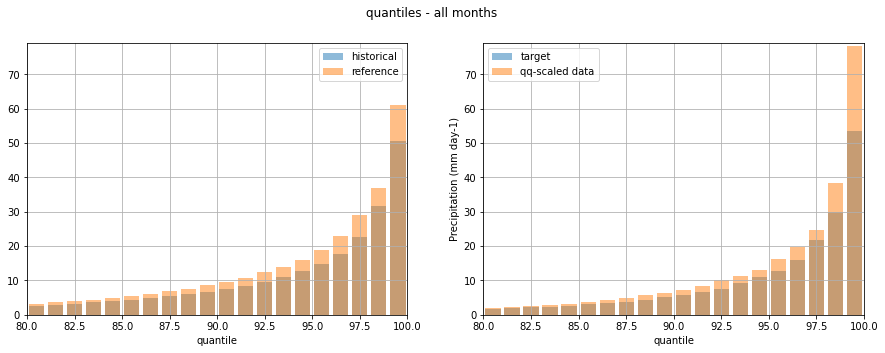

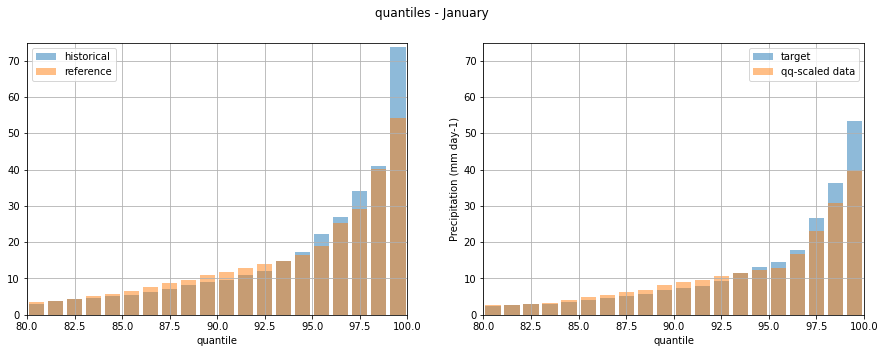

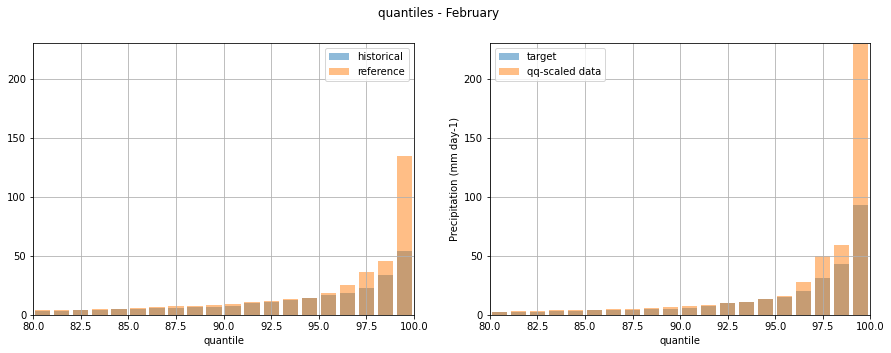

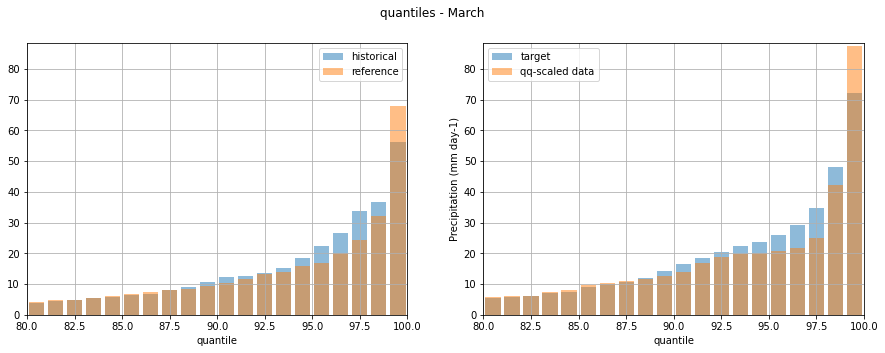

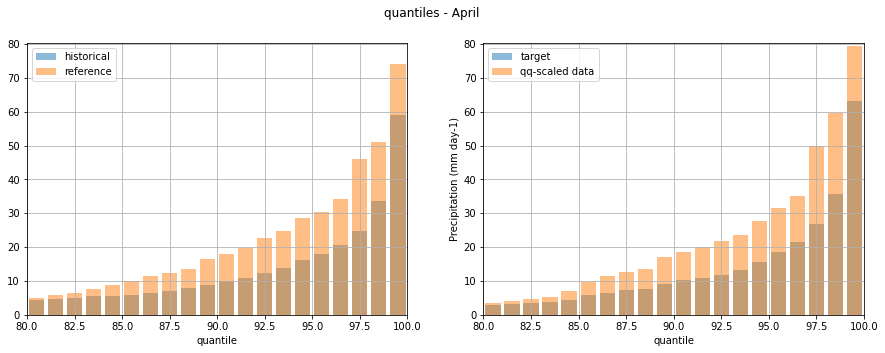

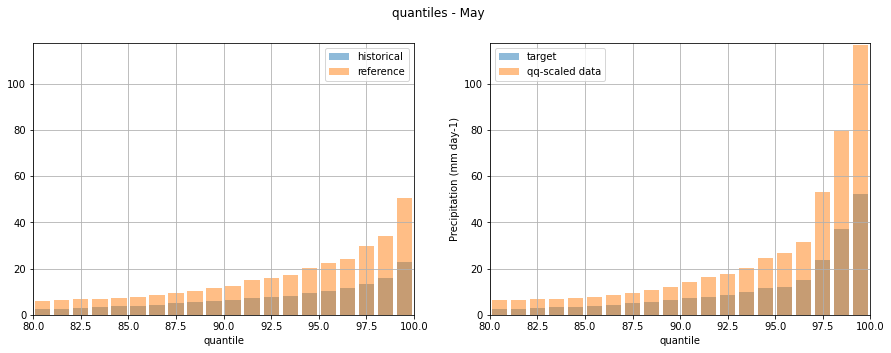

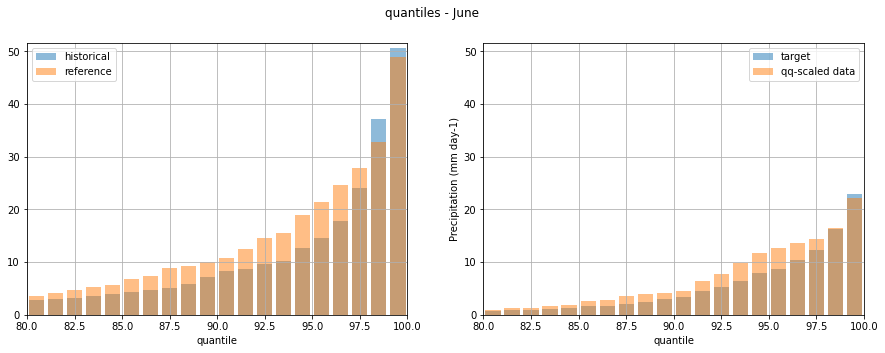

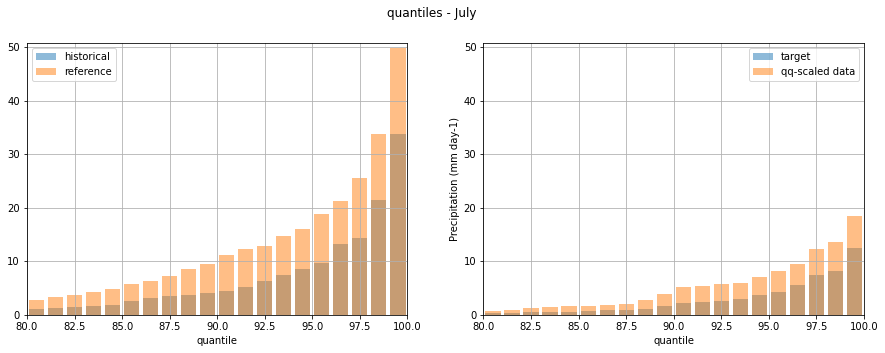

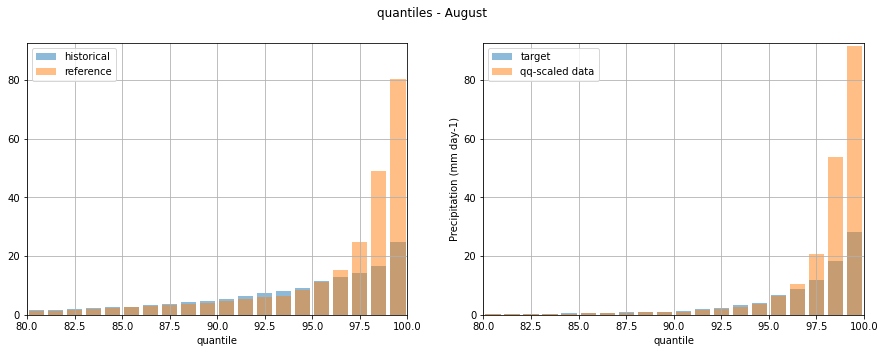

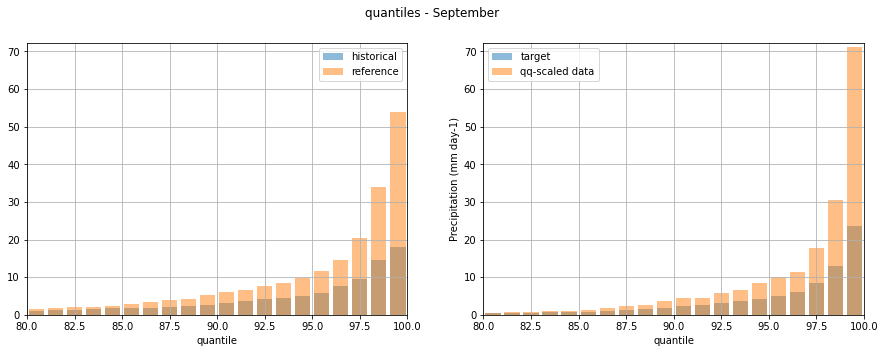

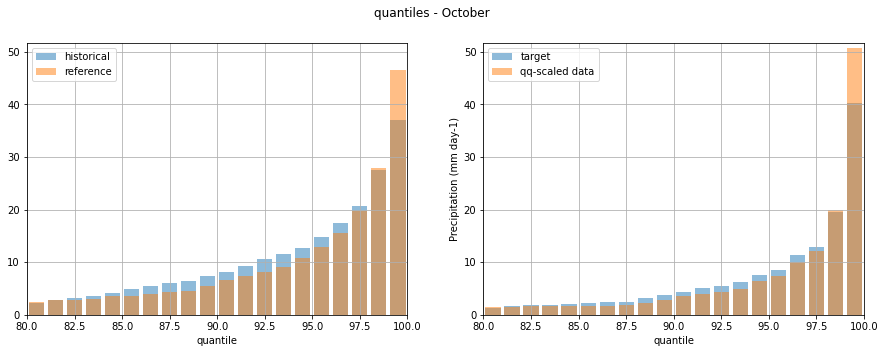

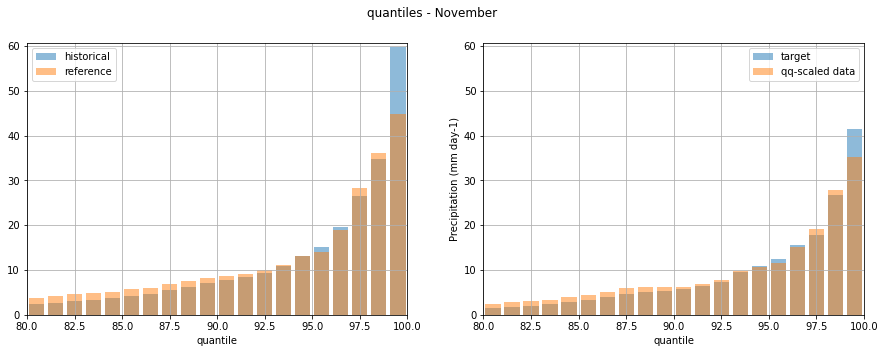

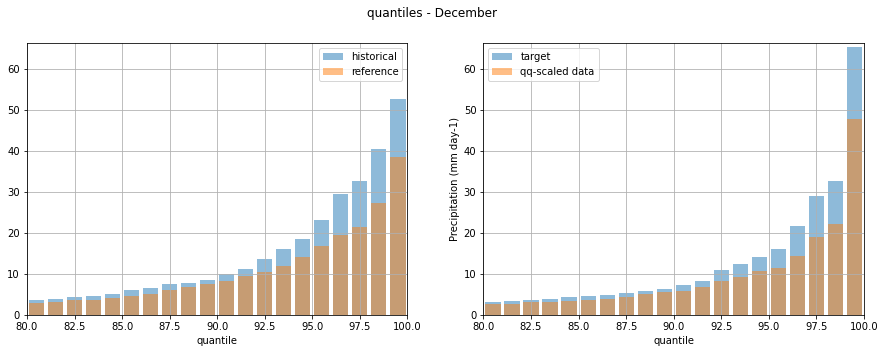

In [32]:
plot_city('Sydney')

BRISBANE


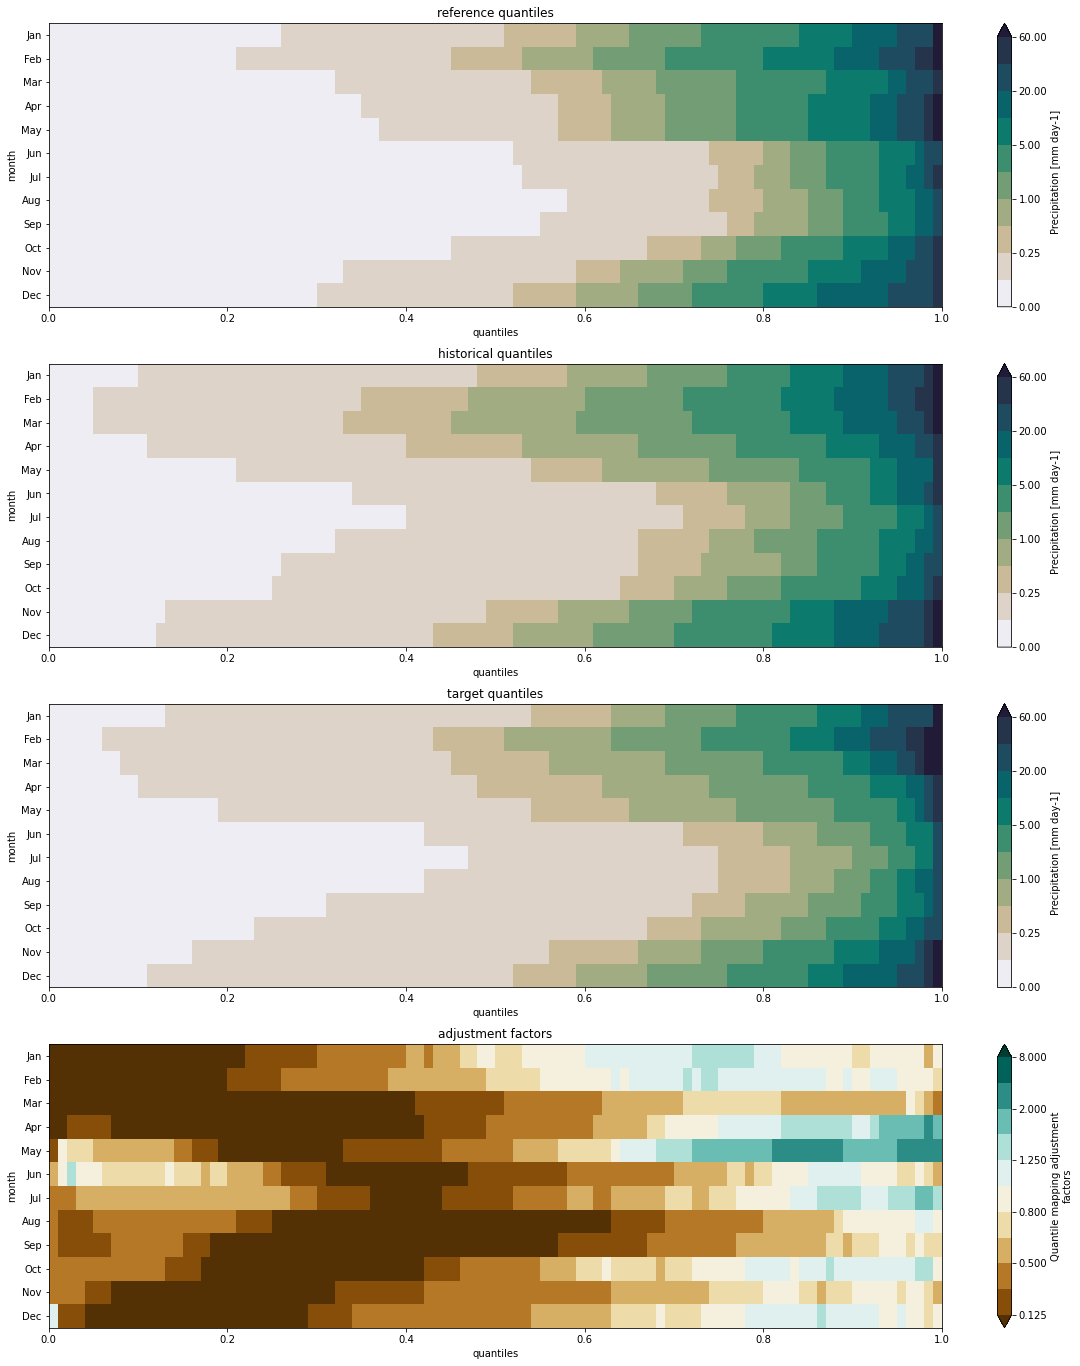

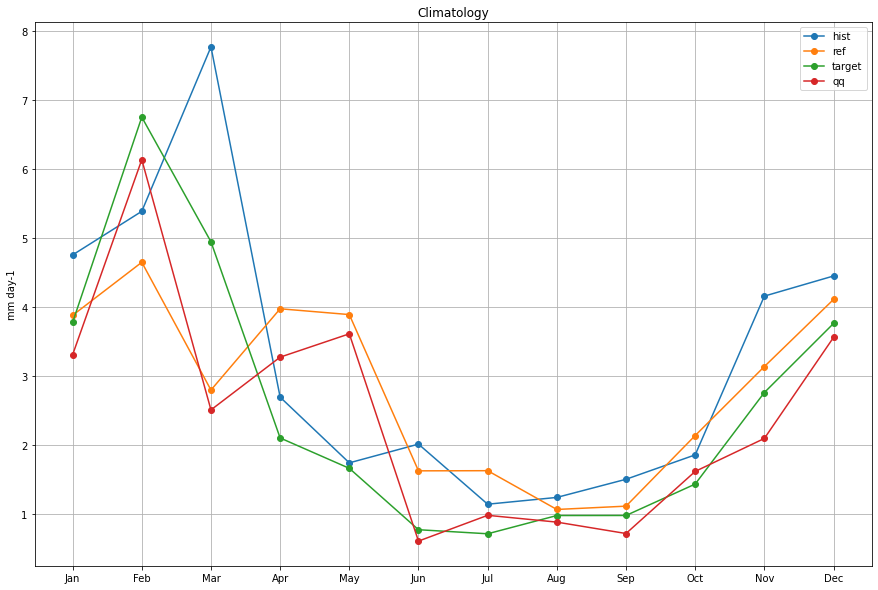

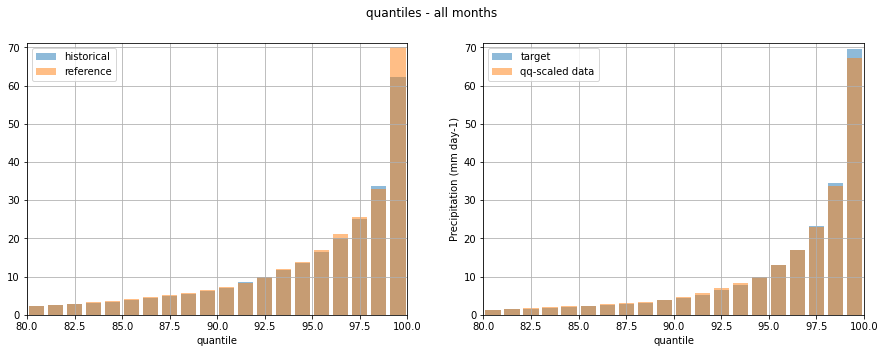

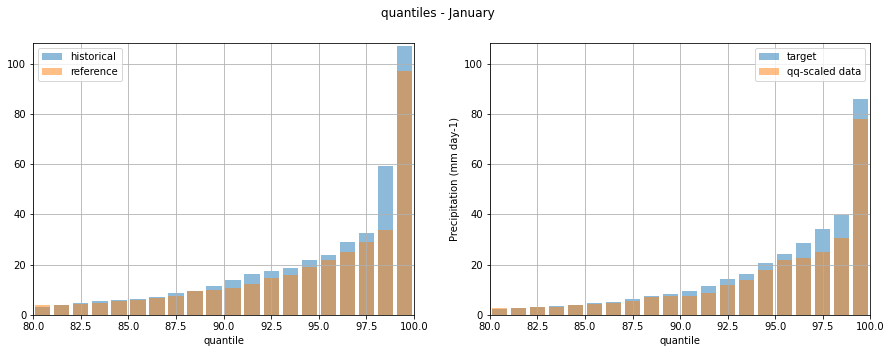

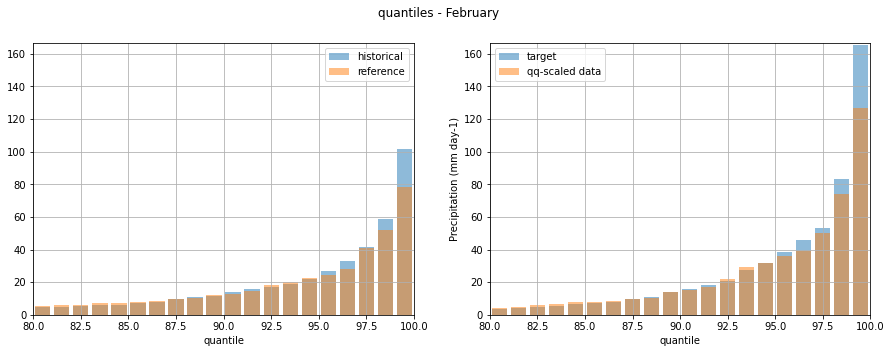

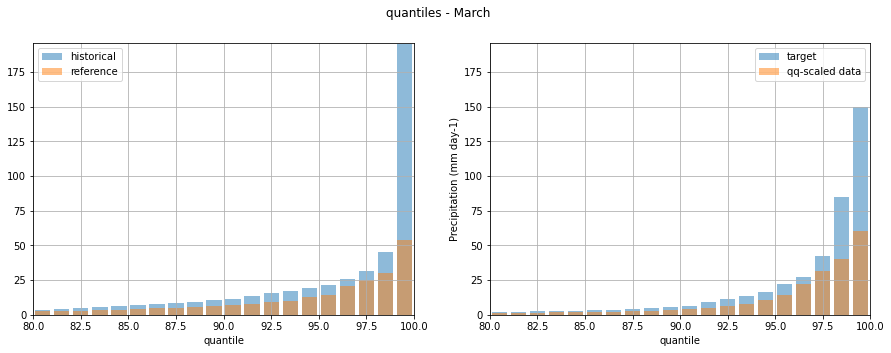

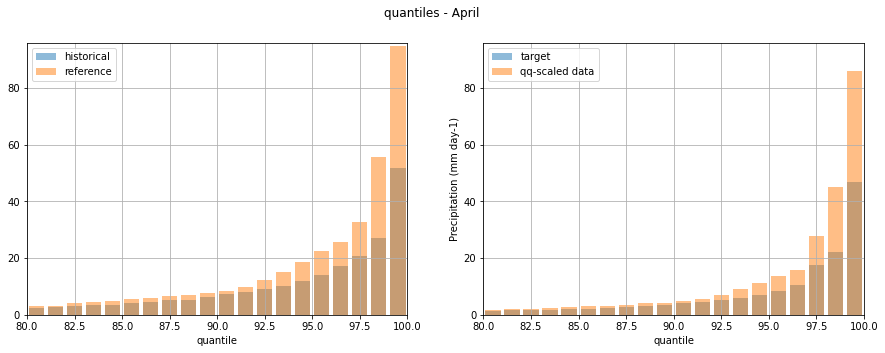

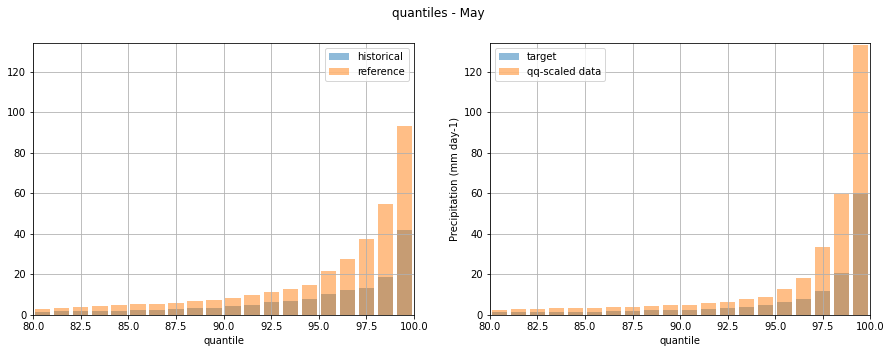

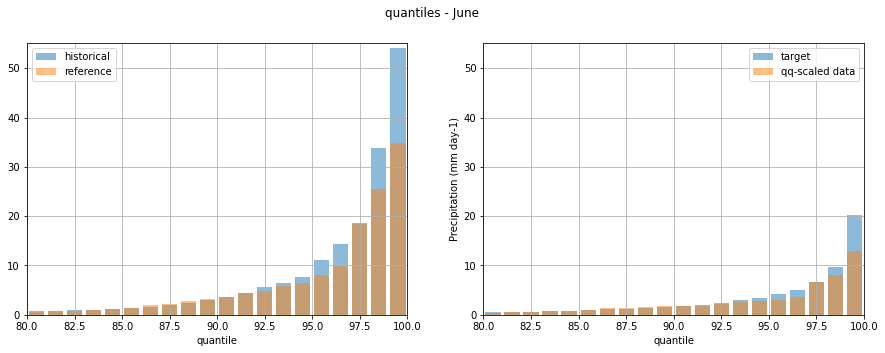

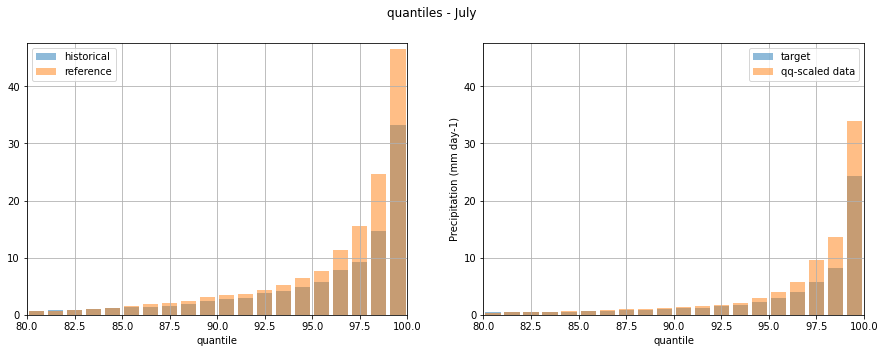

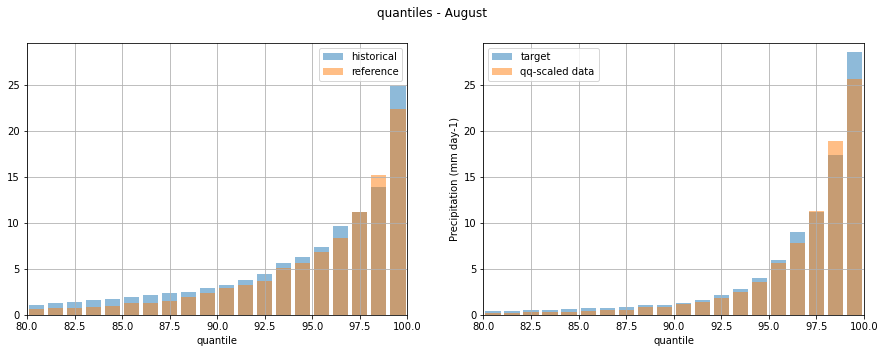

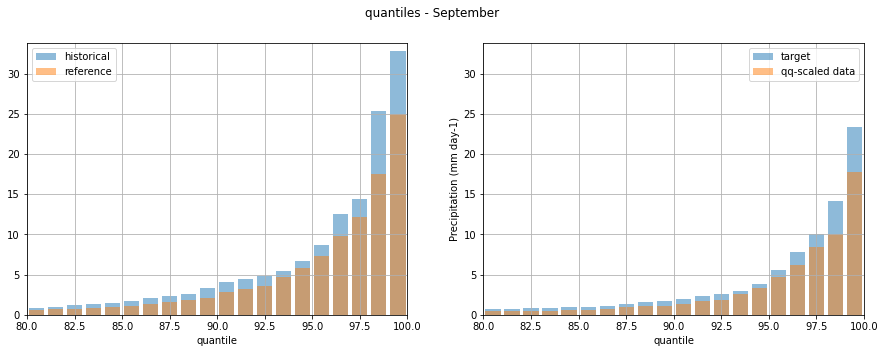

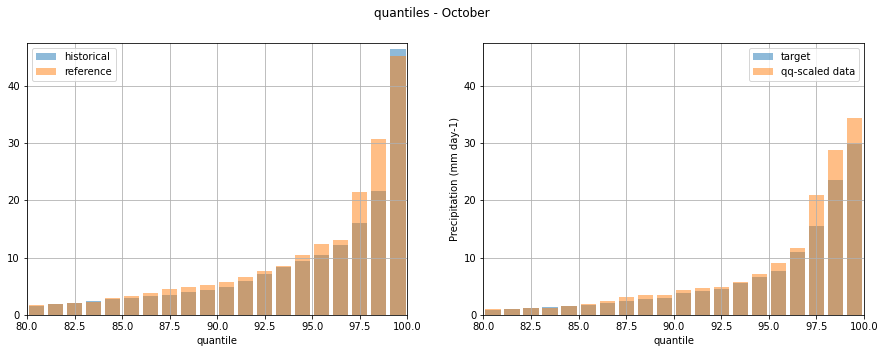

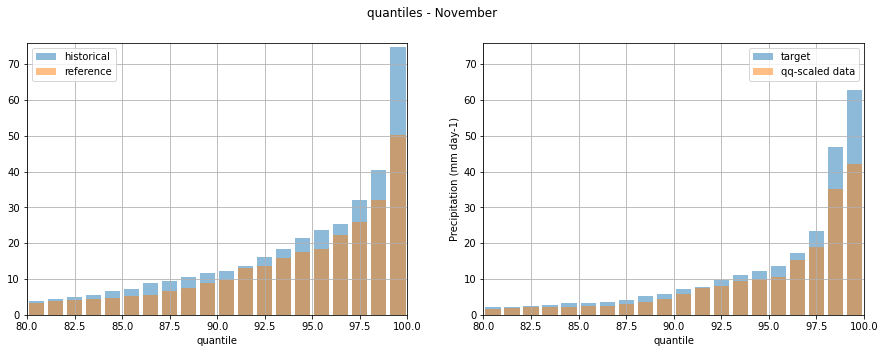

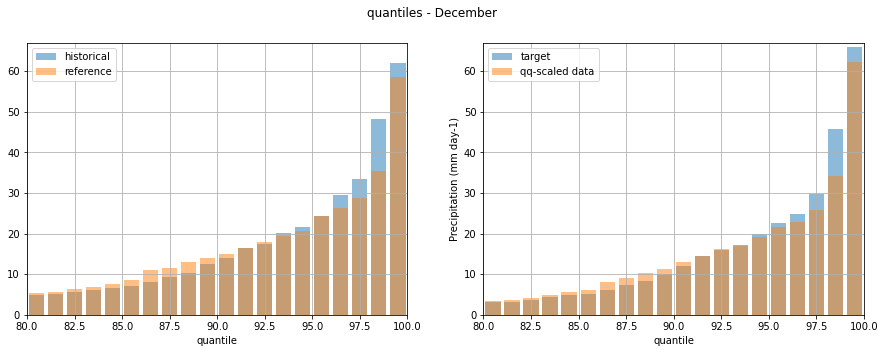

In [33]:
plot_city('Brisbane')

CAIRNS


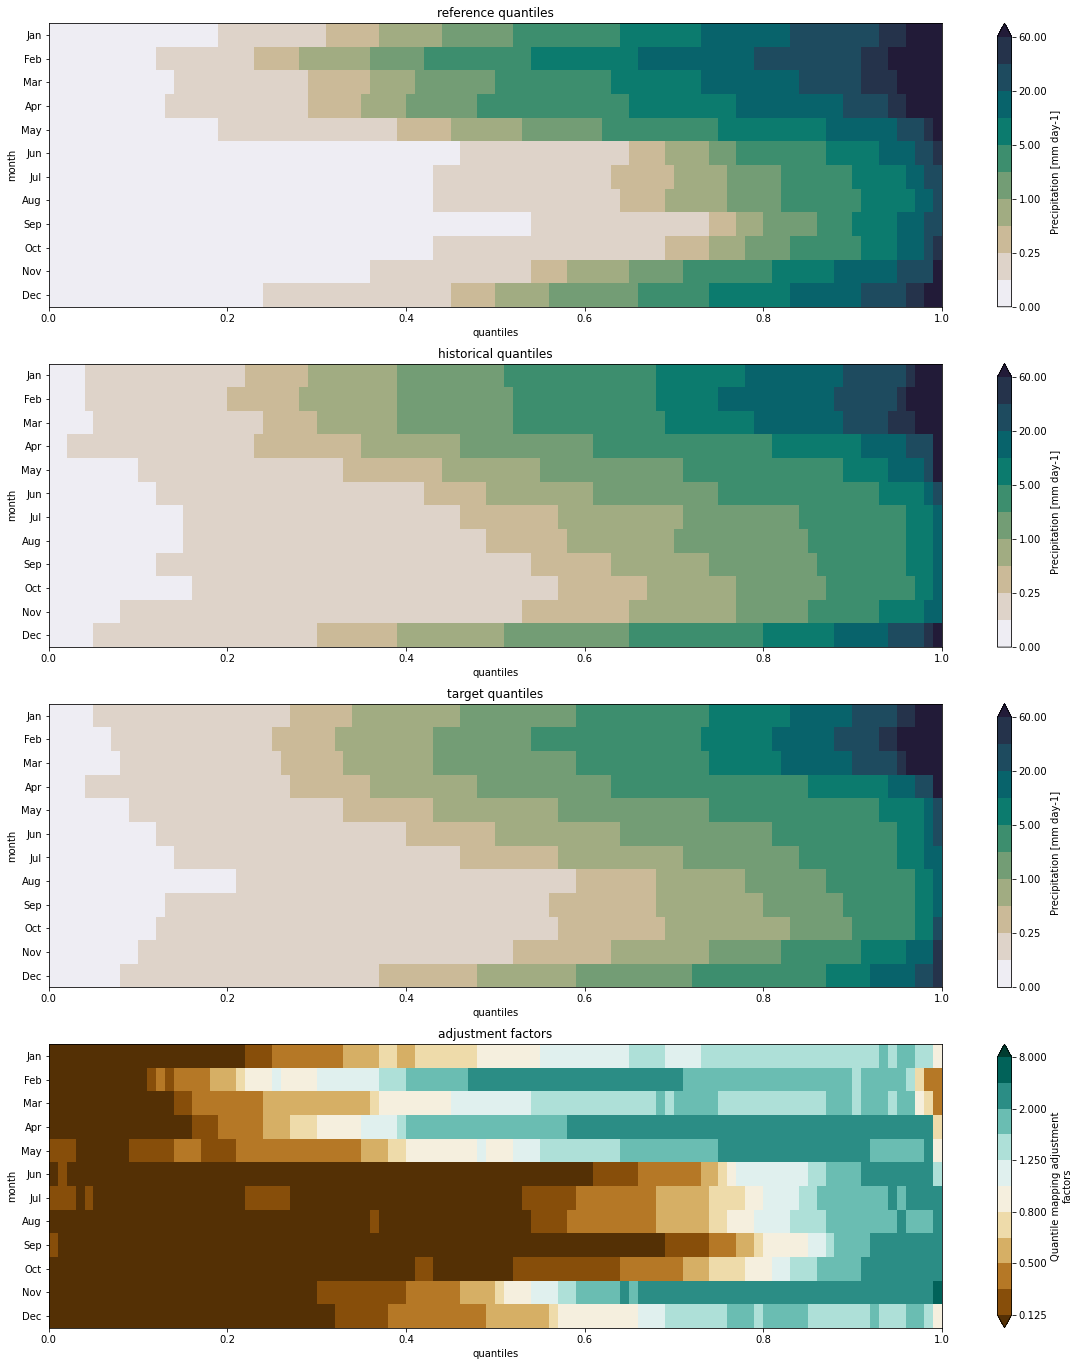

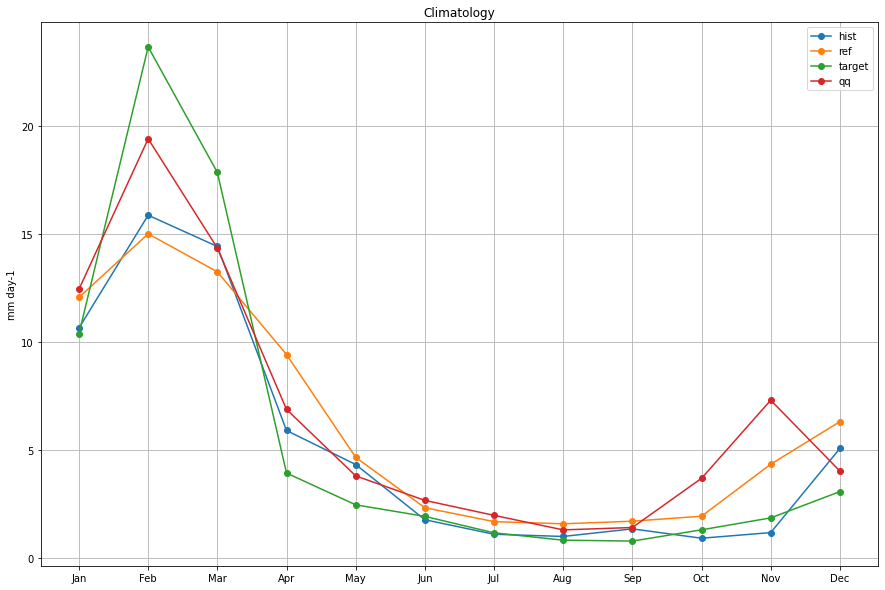

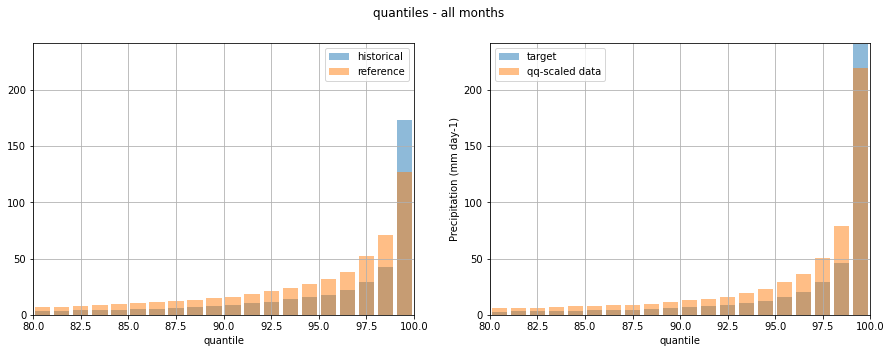

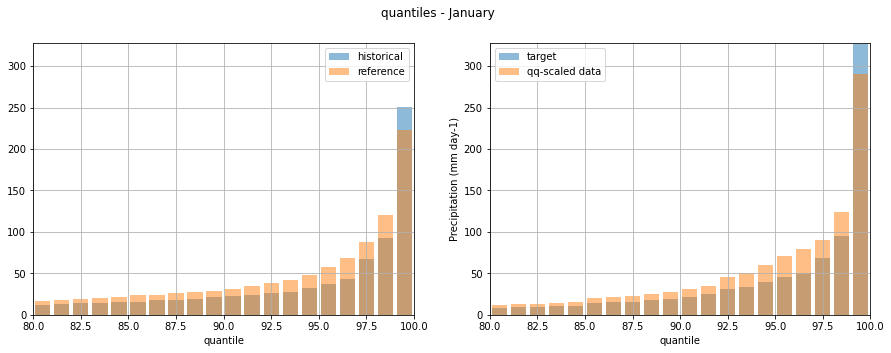

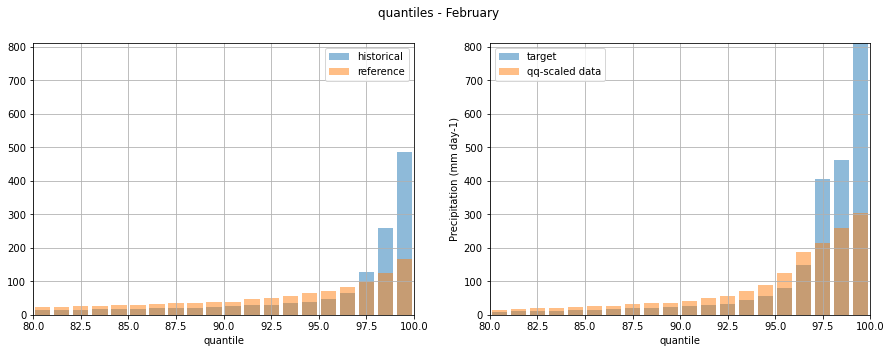

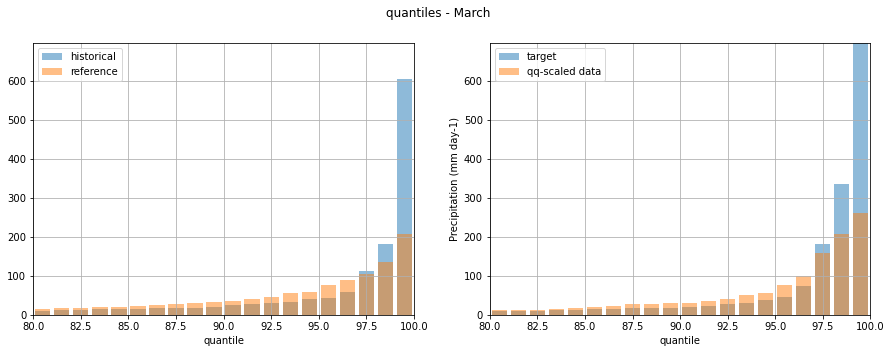

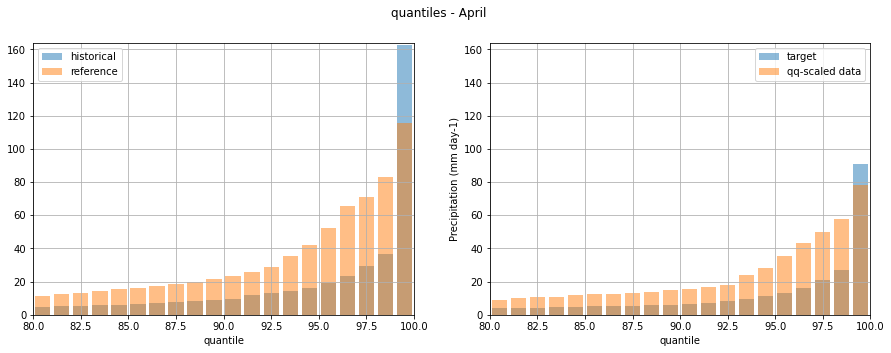

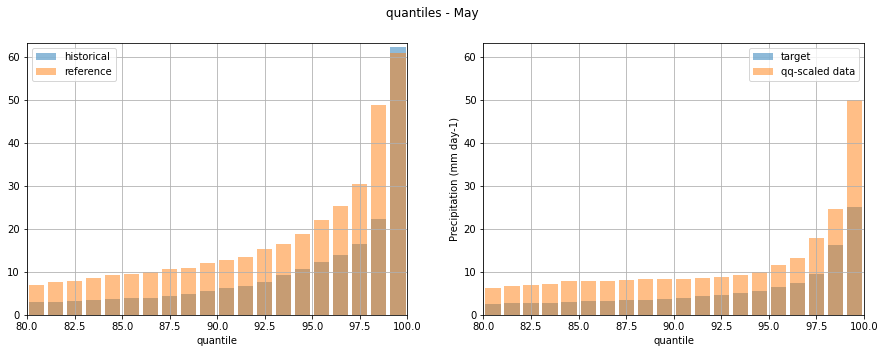

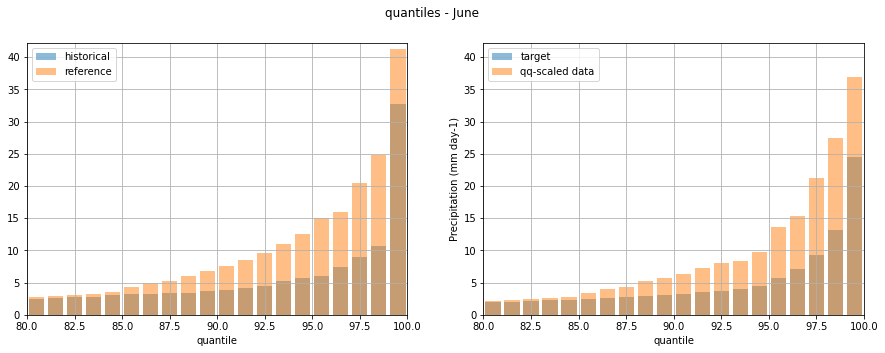

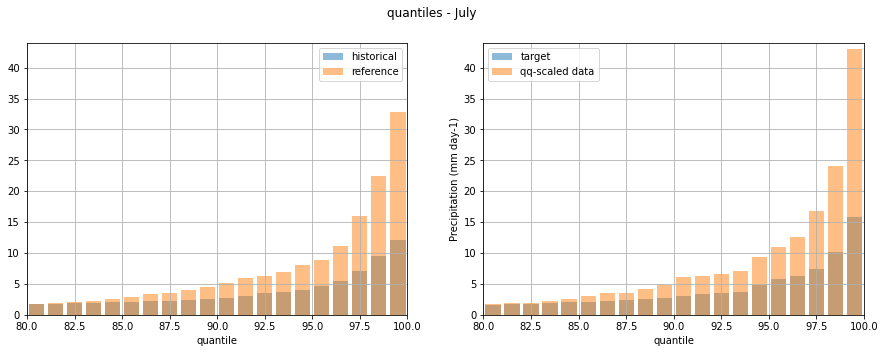

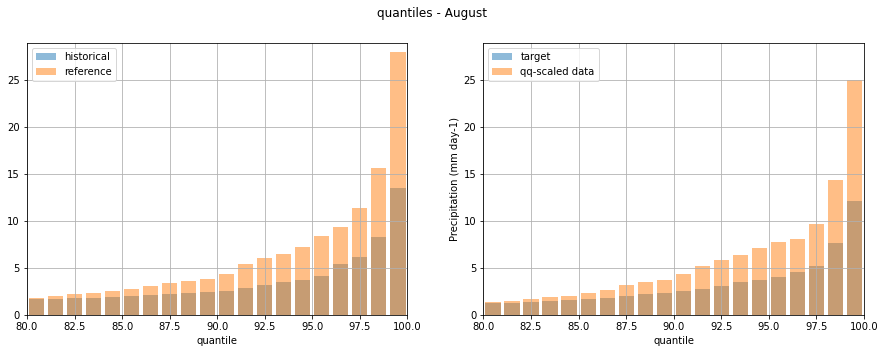

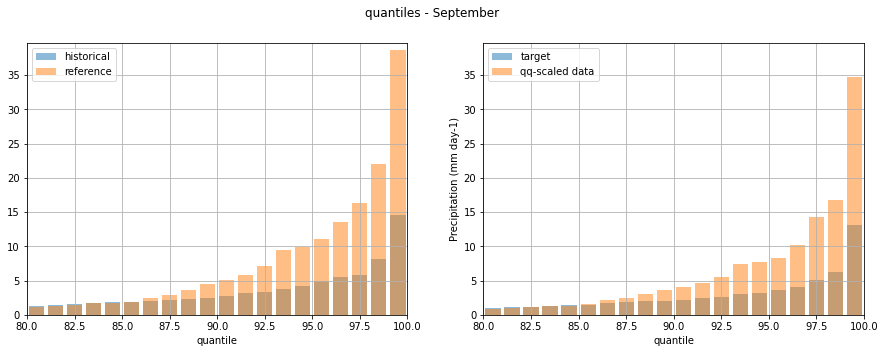

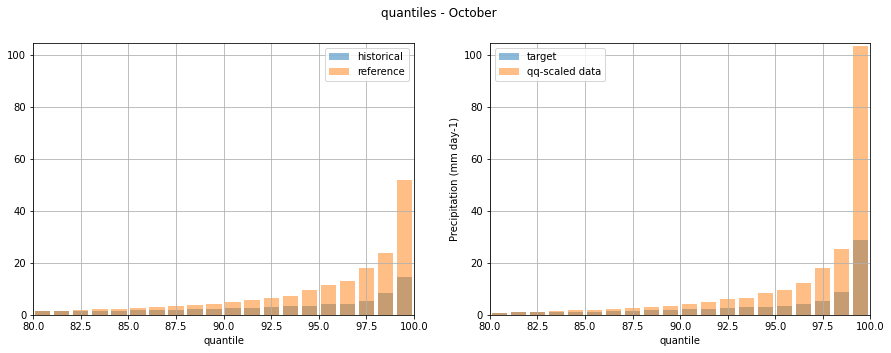

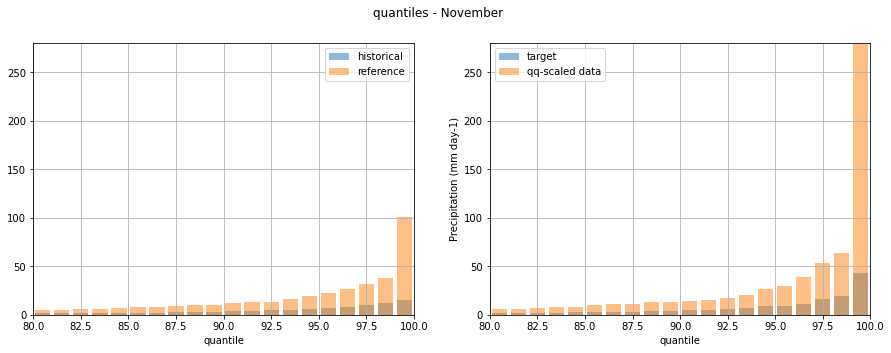

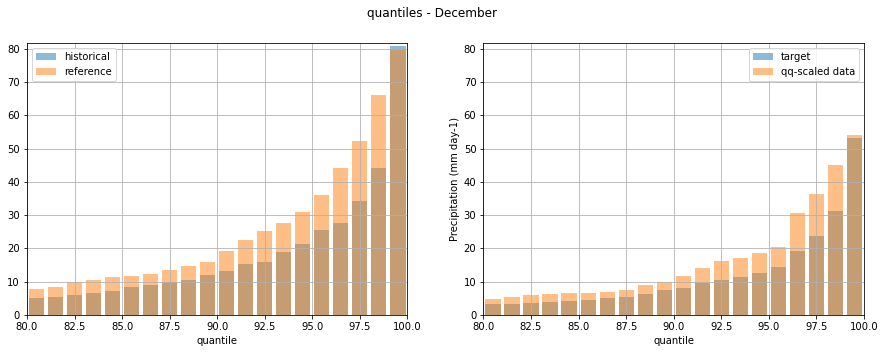

In [34]:
plot_city('Cairns')

DARWIN


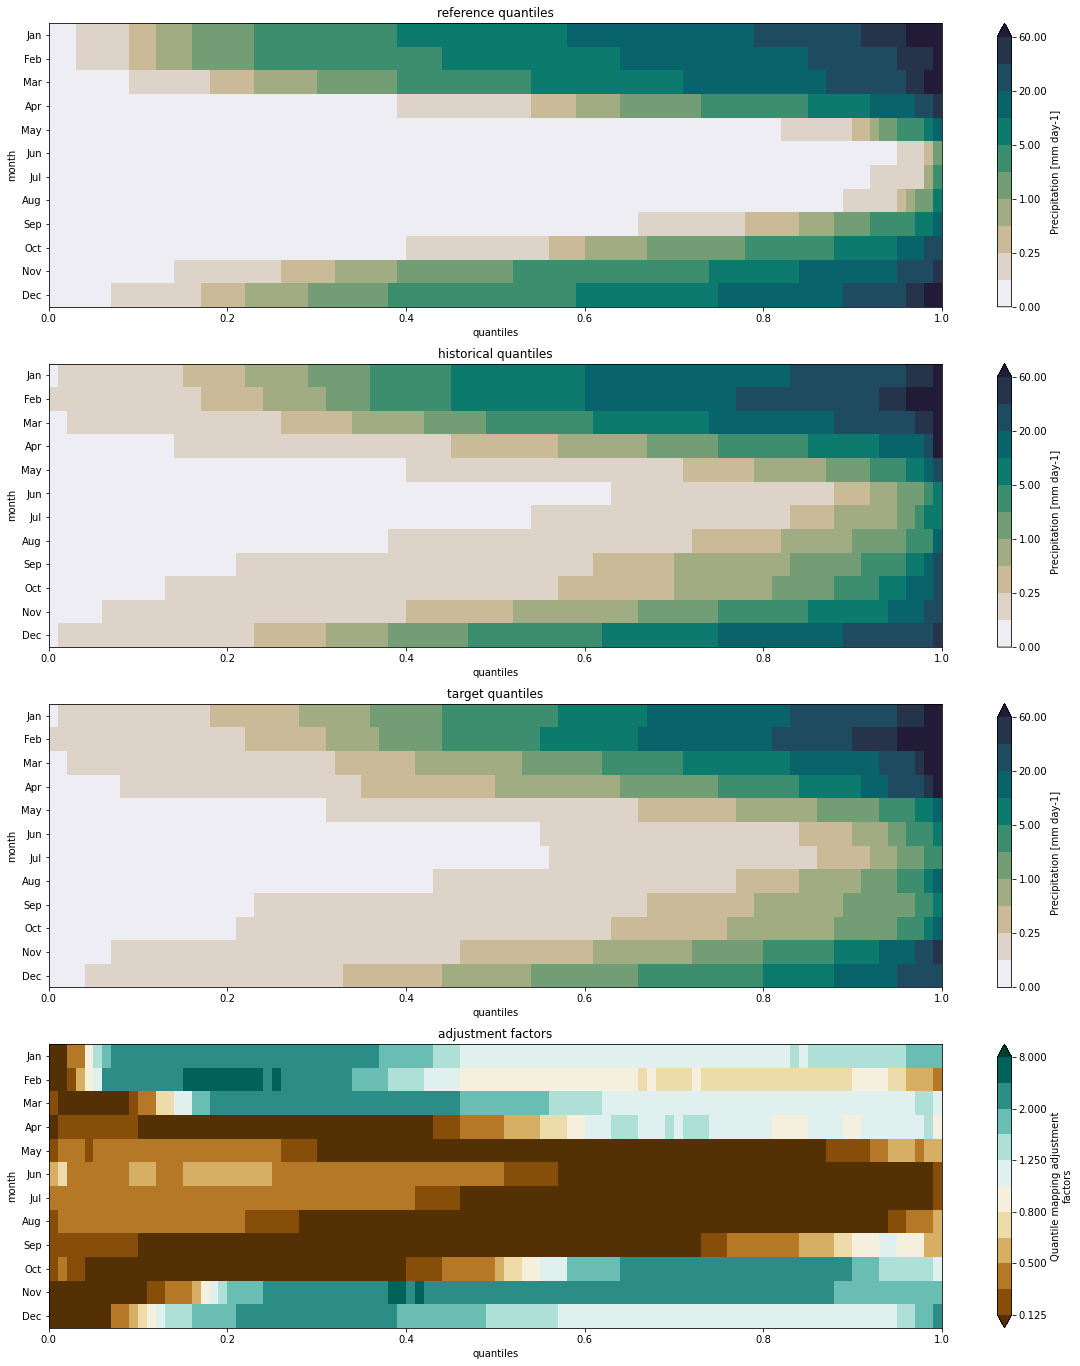

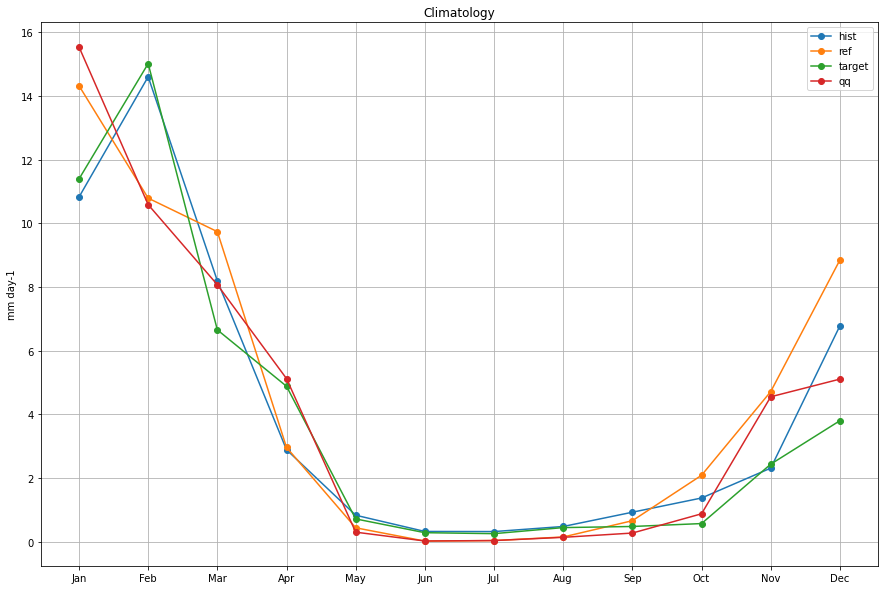

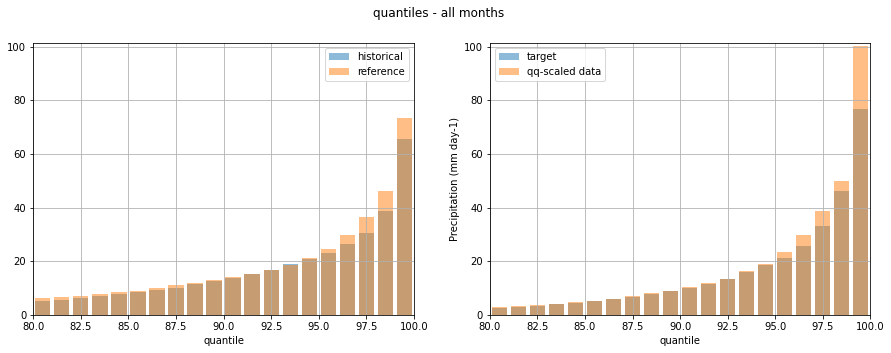

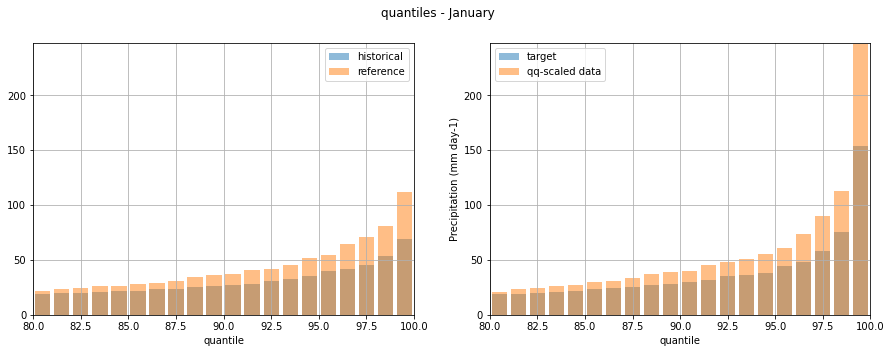

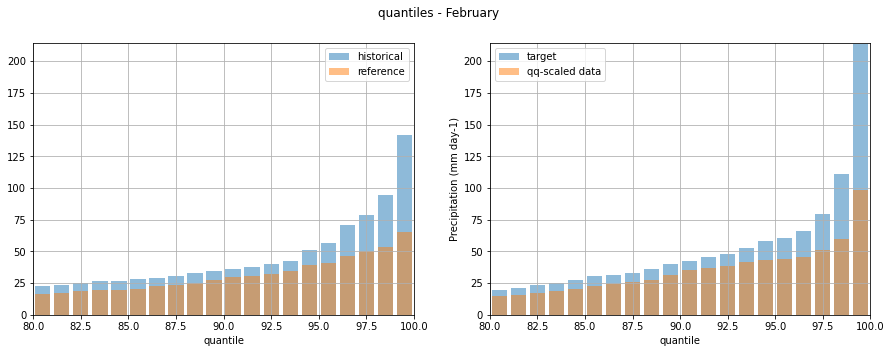

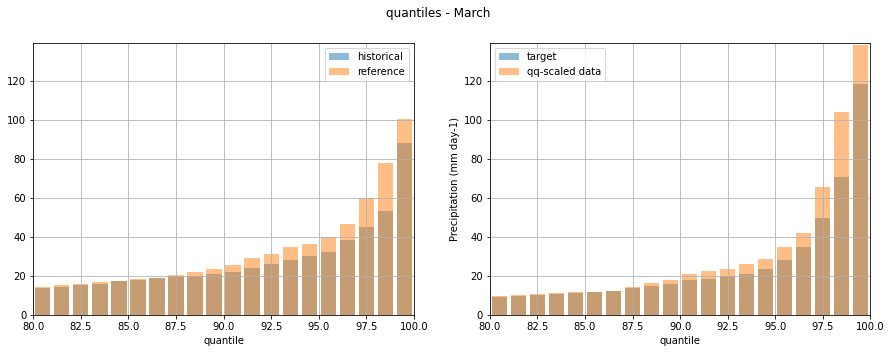

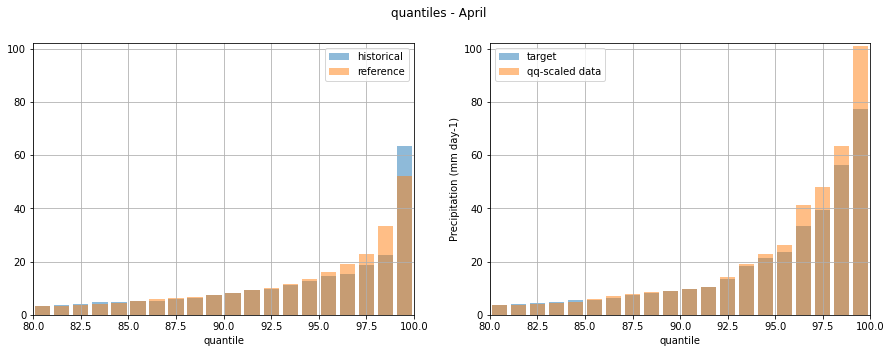

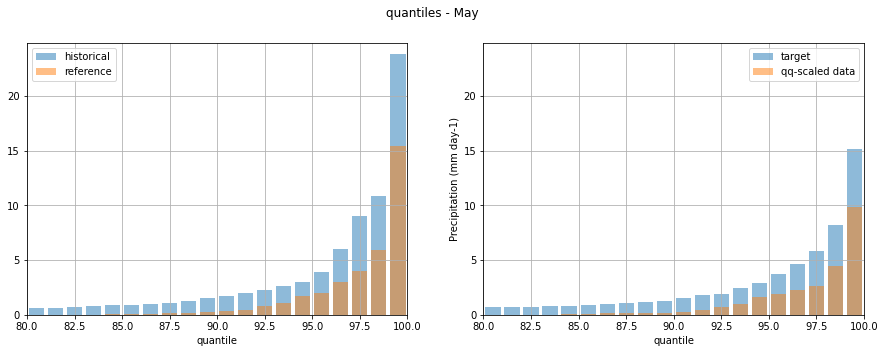

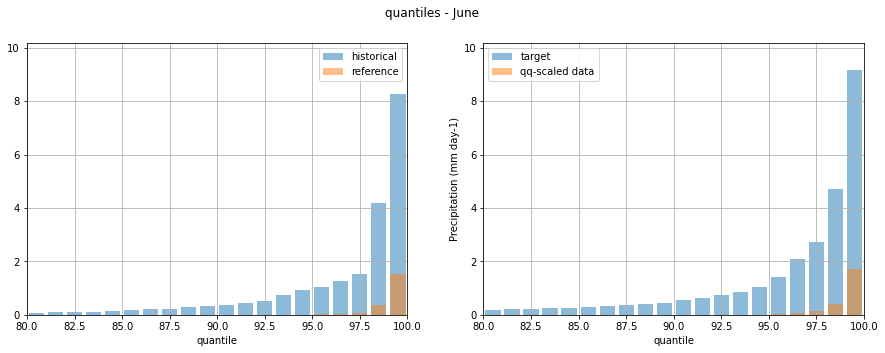

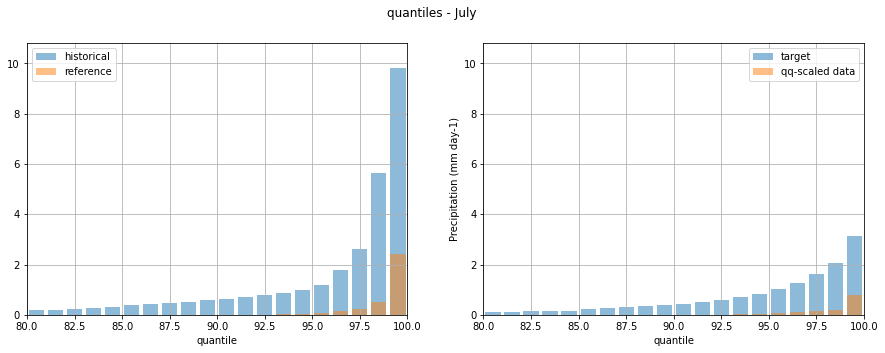

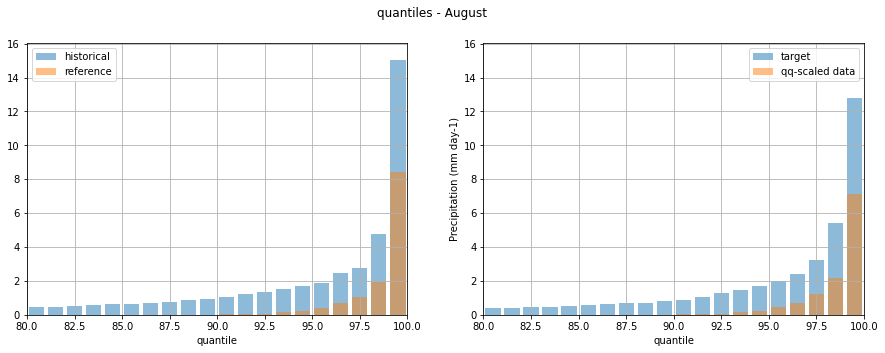

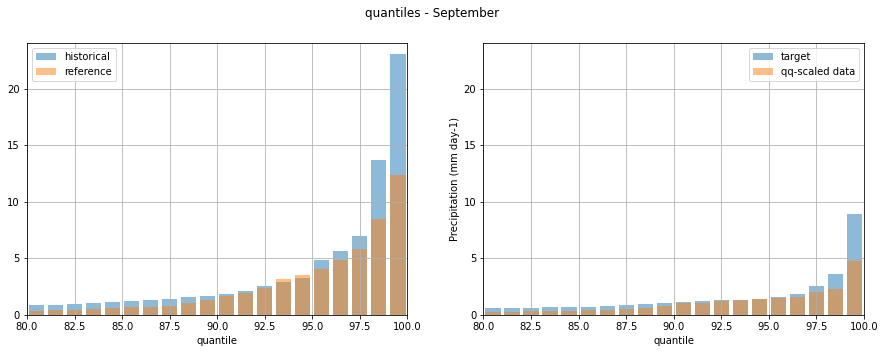

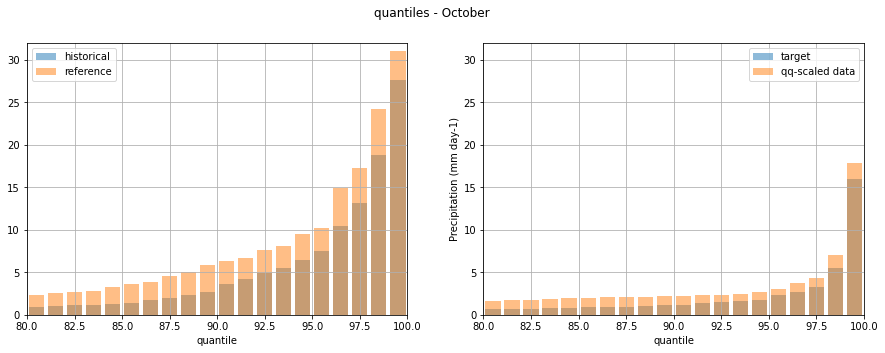

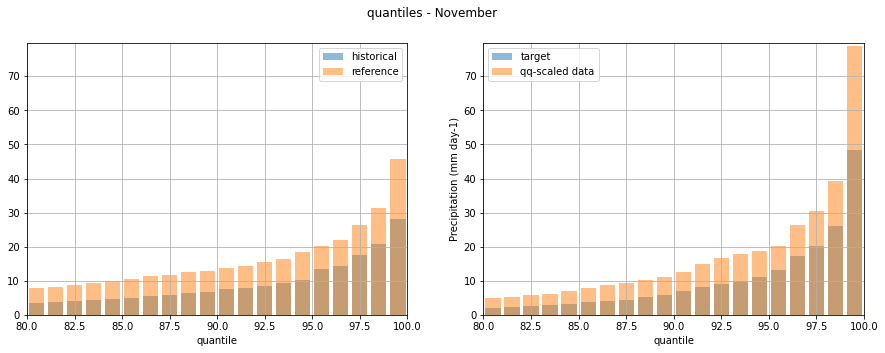

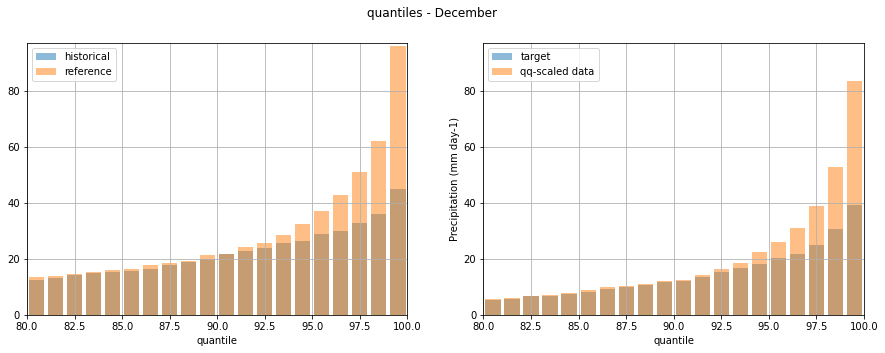

In [35]:
plot_city('Darwin')

ALICE SPRINGS


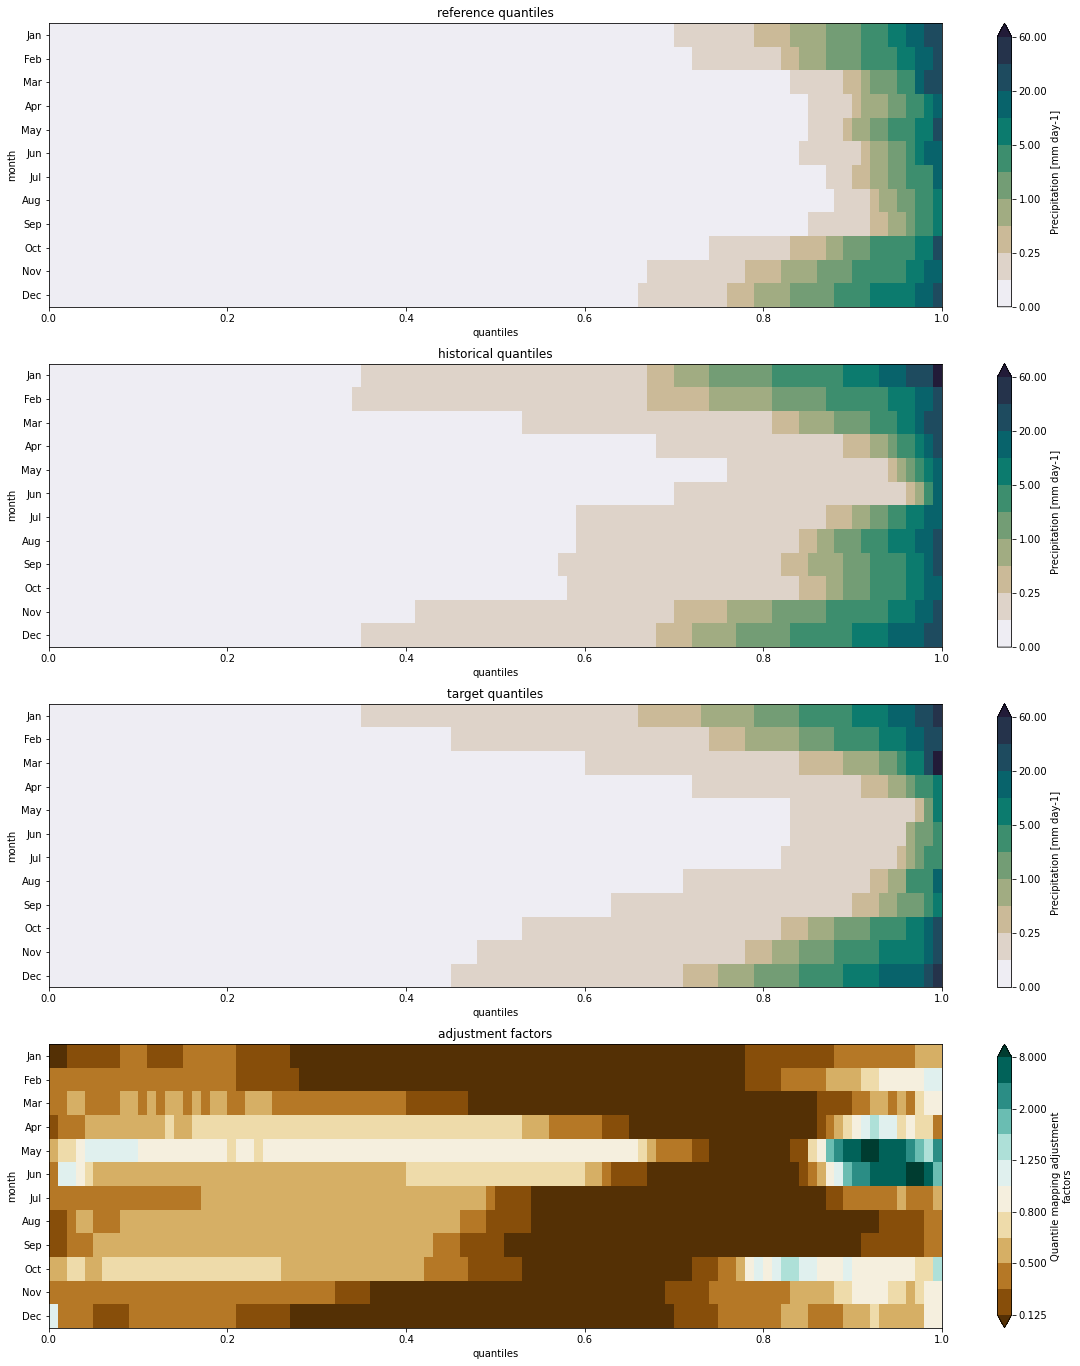

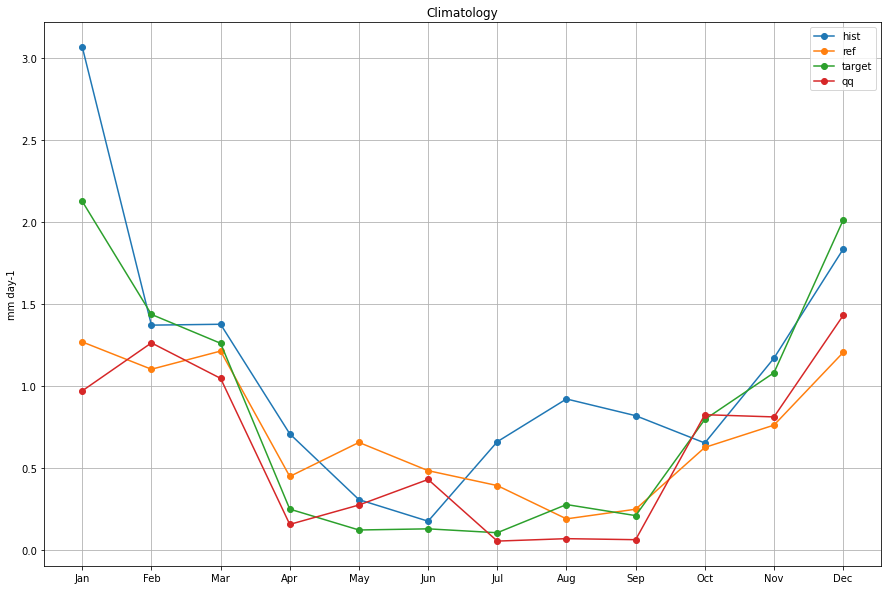

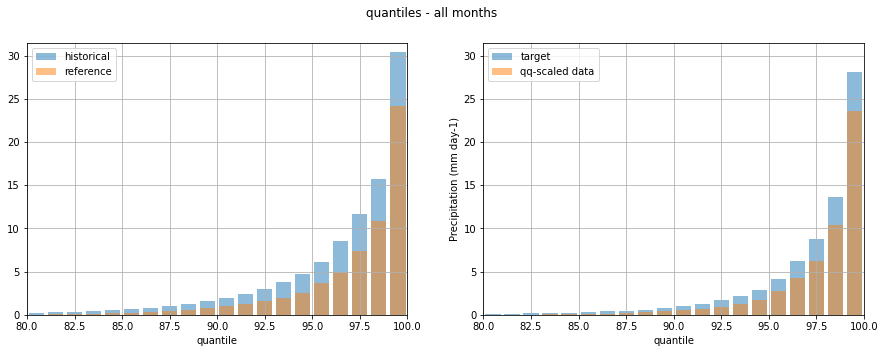

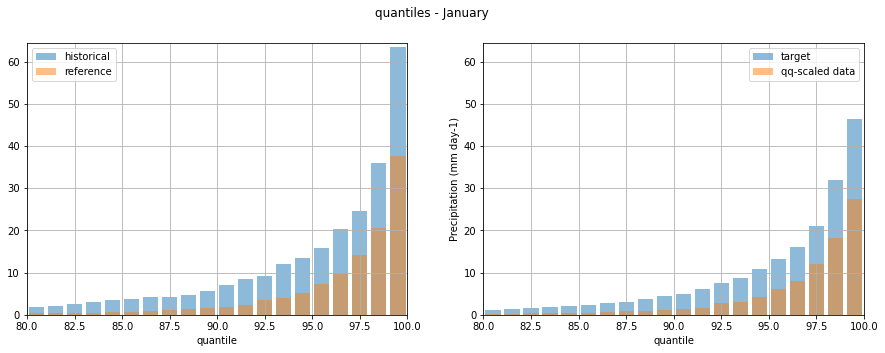

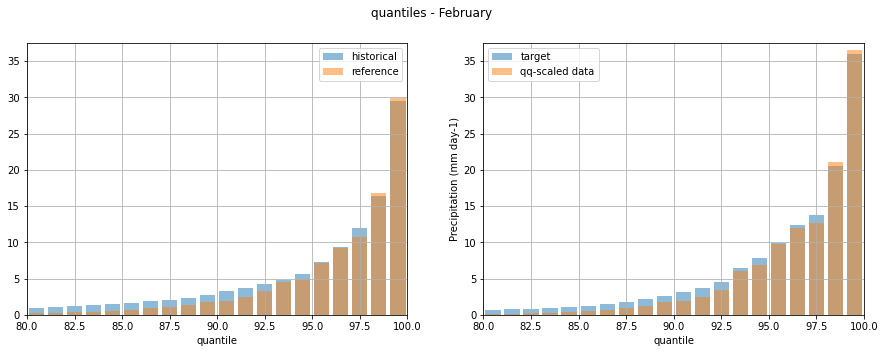

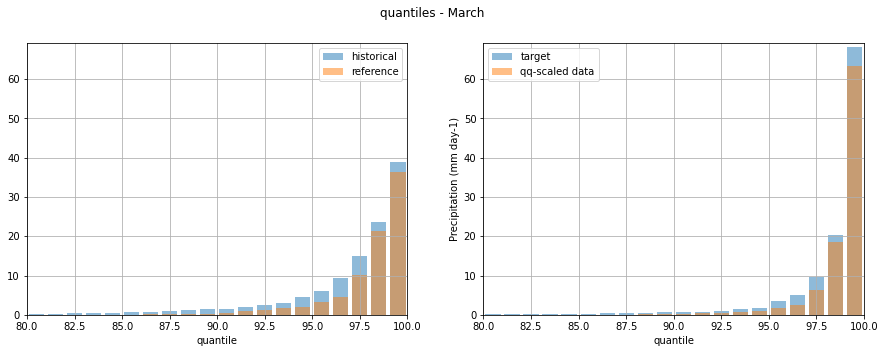

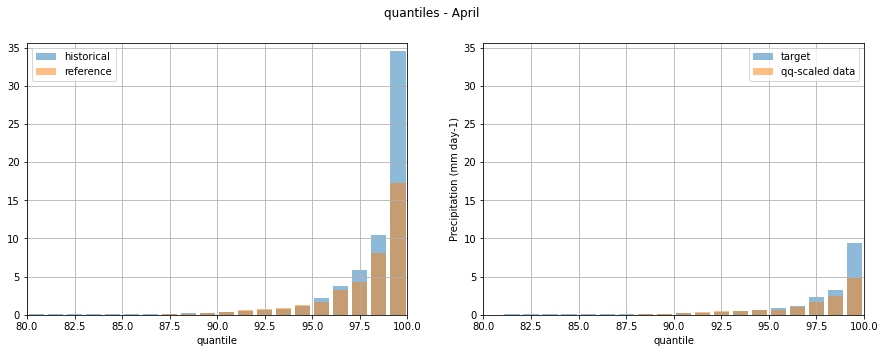

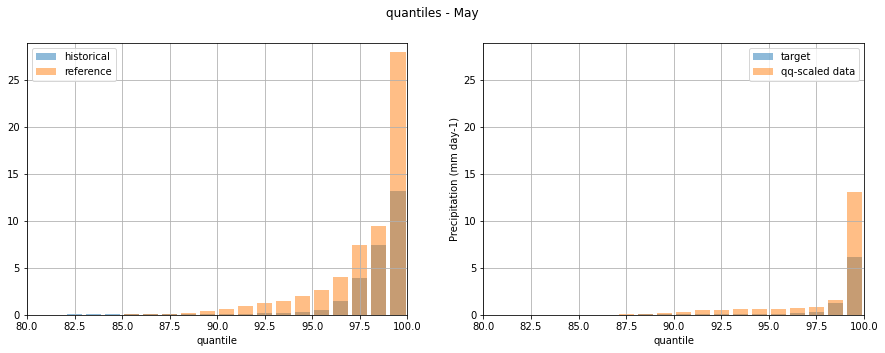

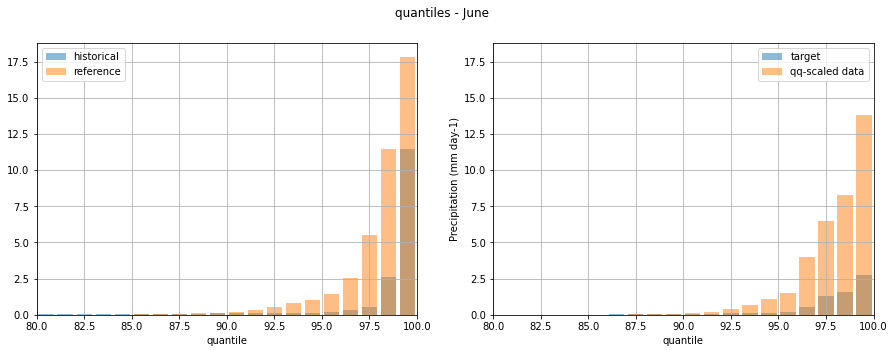

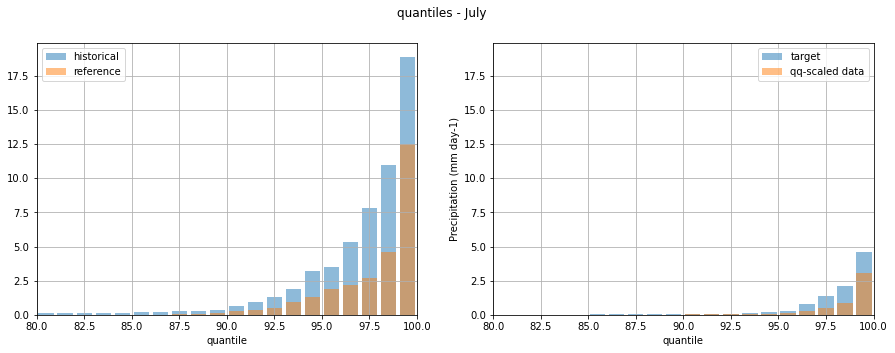

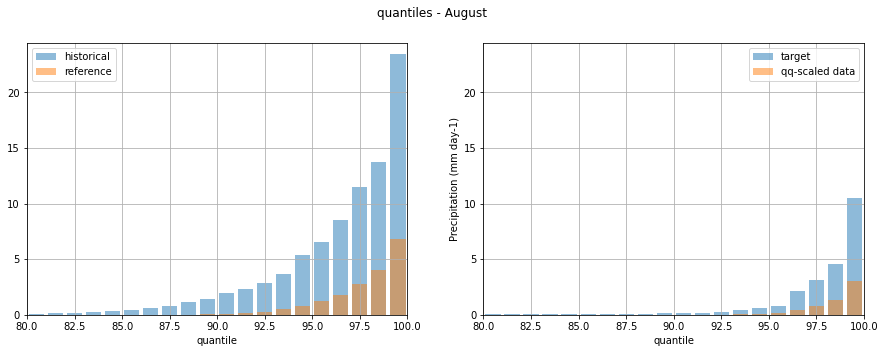

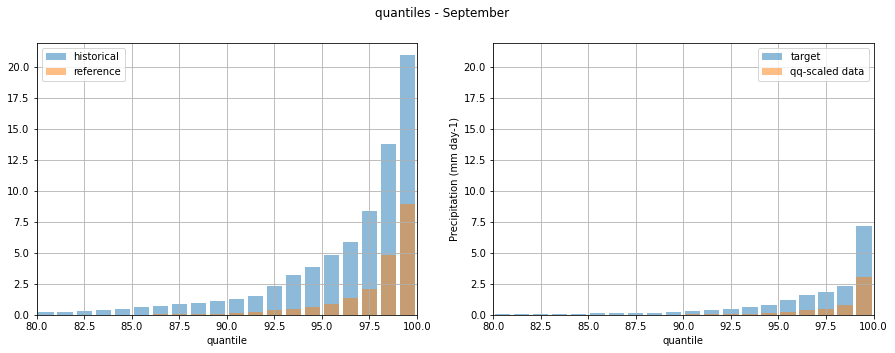

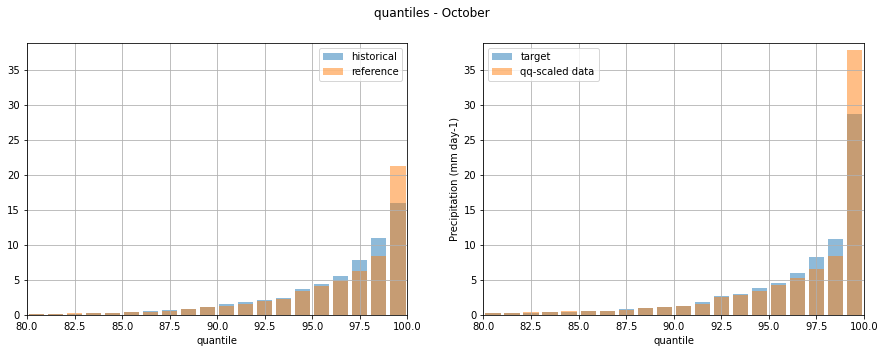

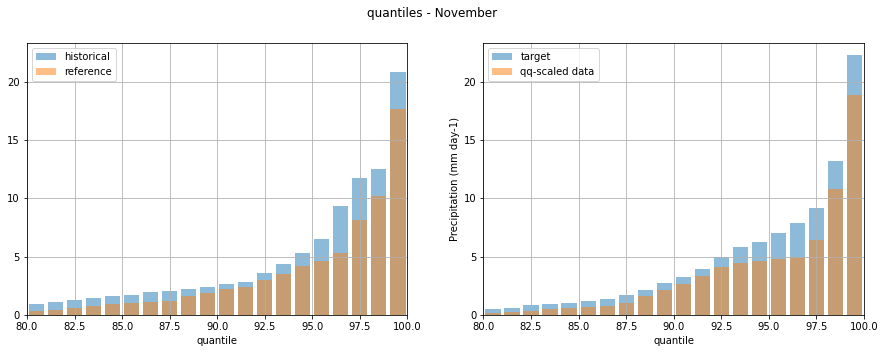

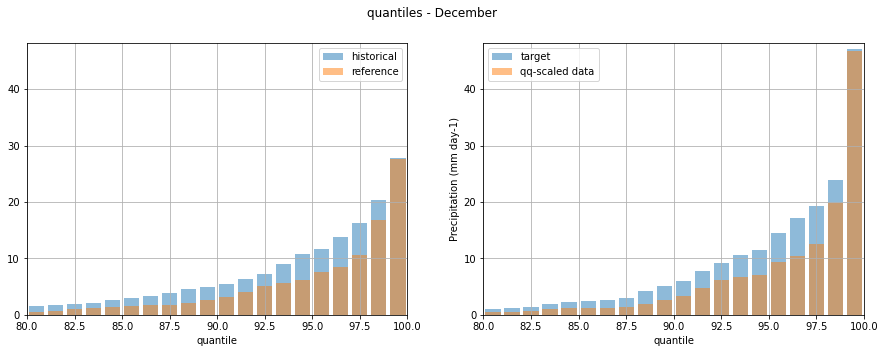

In [36]:
plot_city('Alice Springs')

PORT HEDLAND


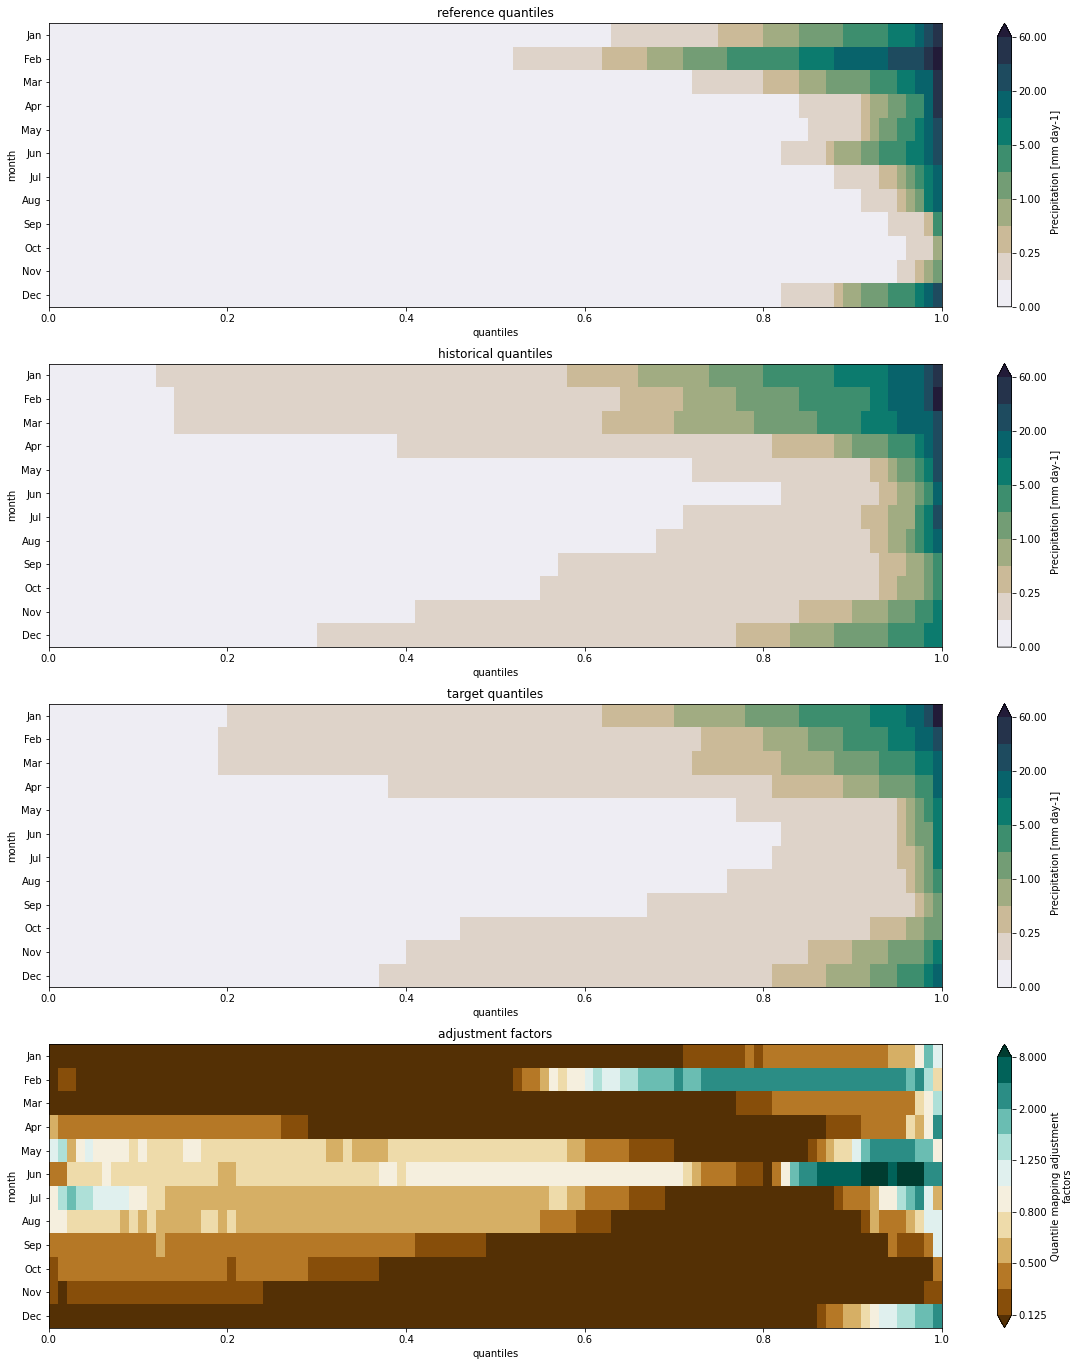

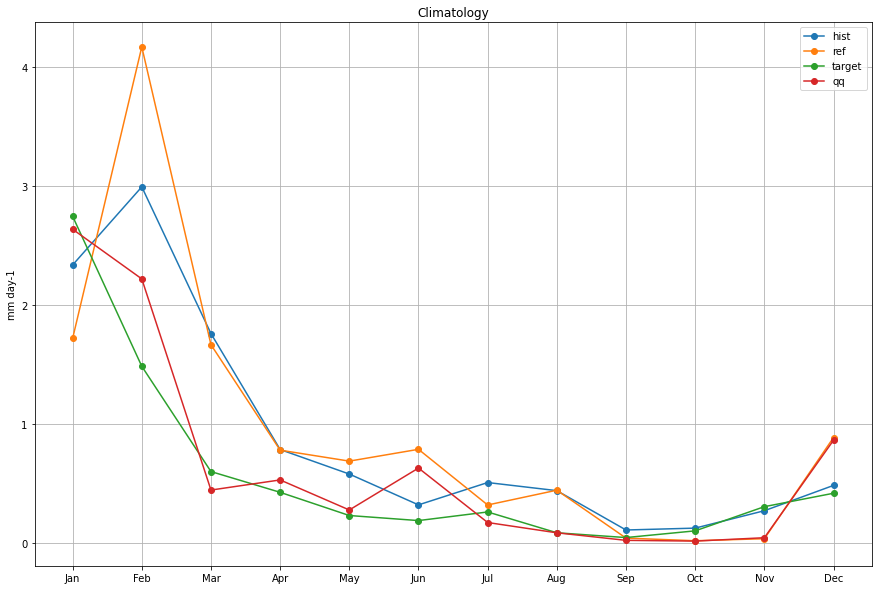

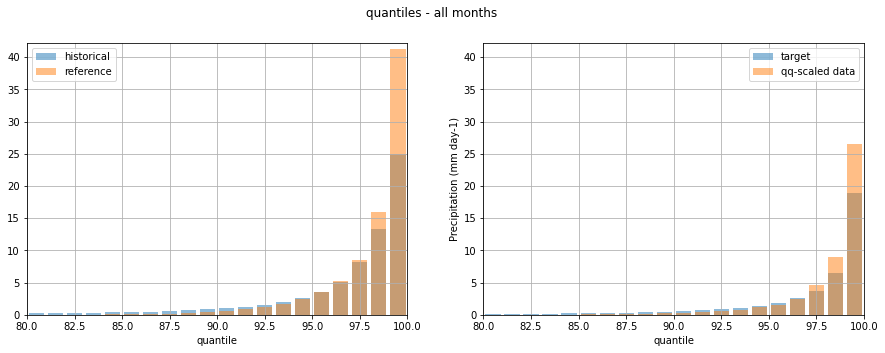

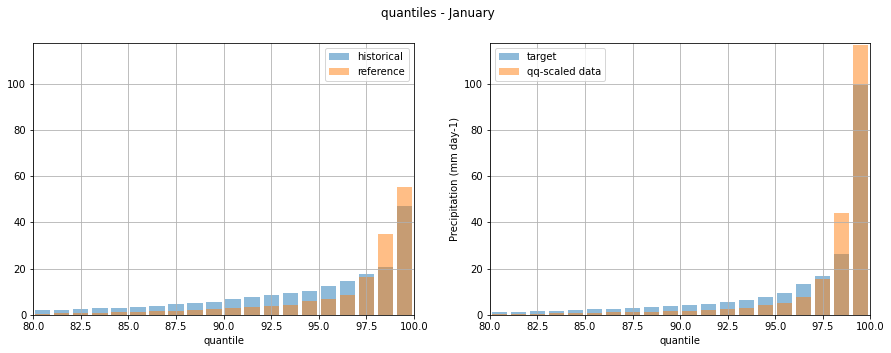

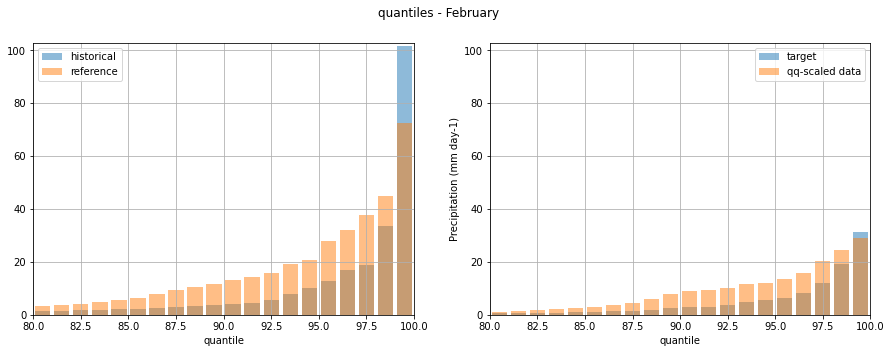

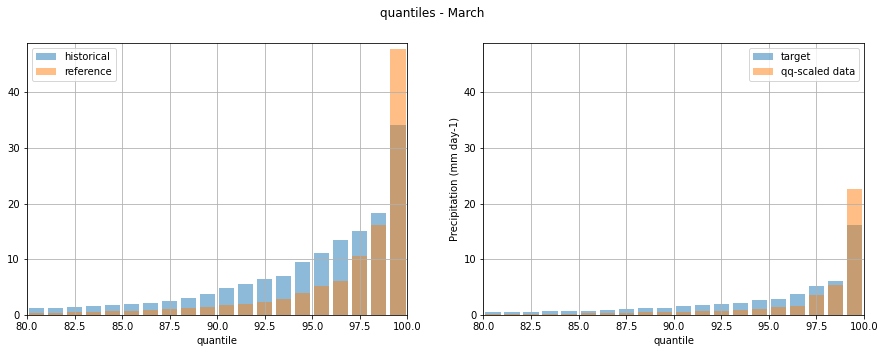

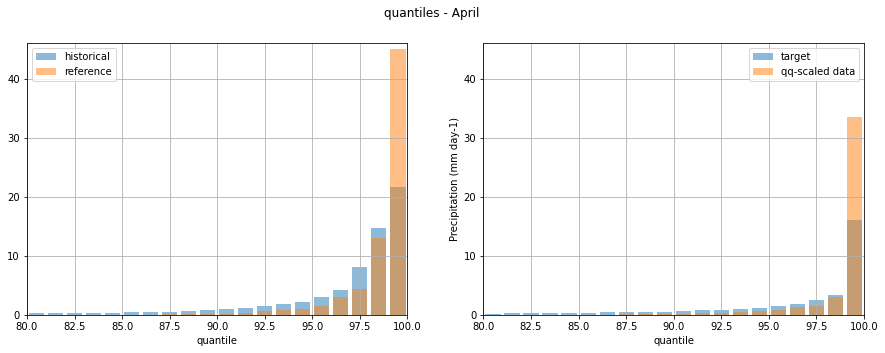

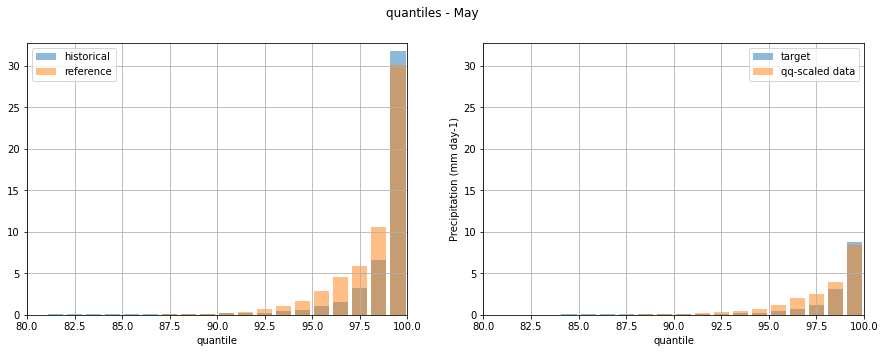

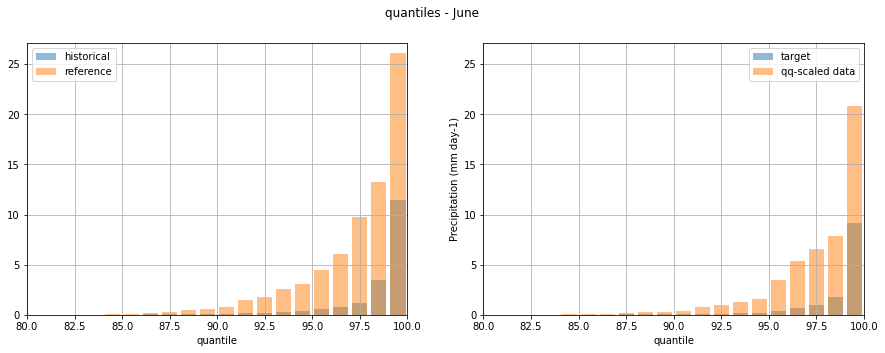

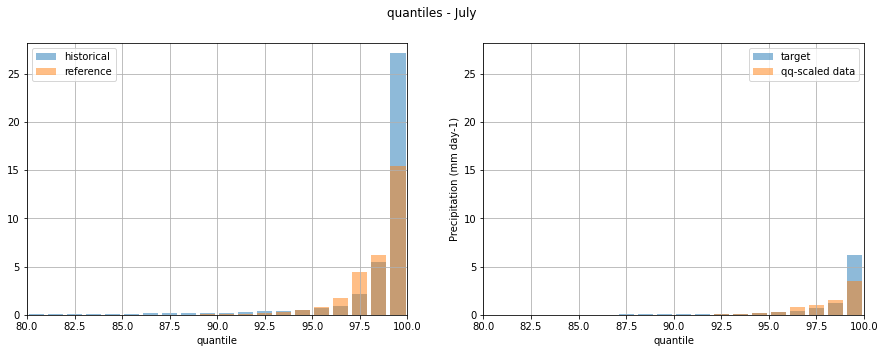

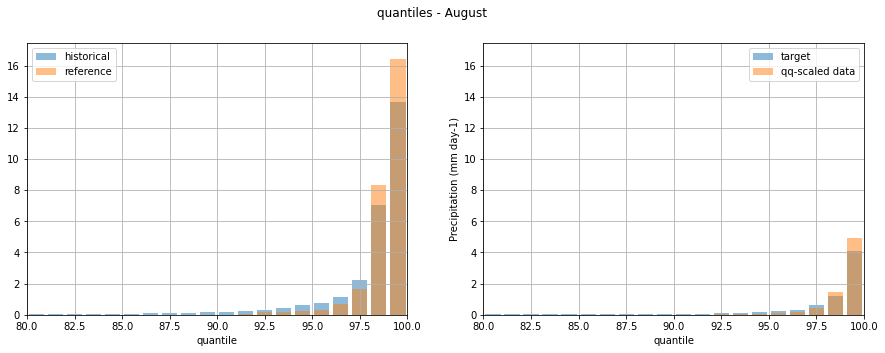

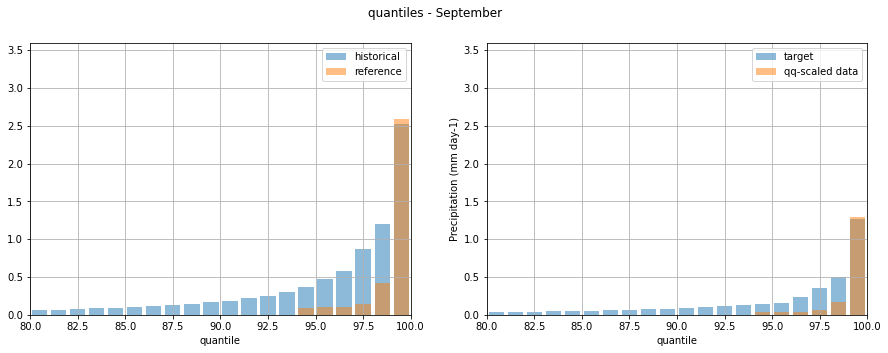

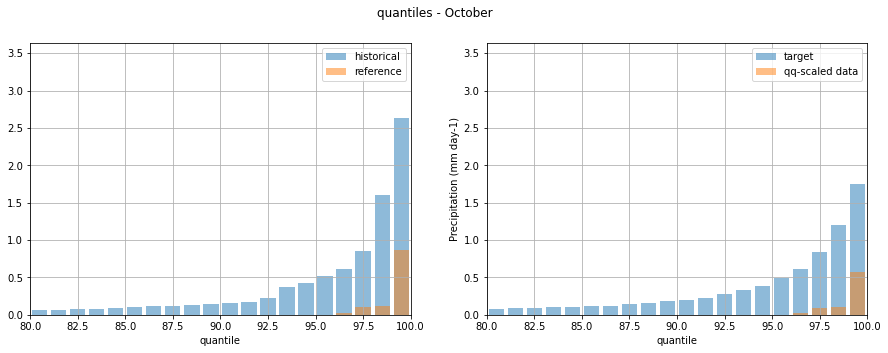

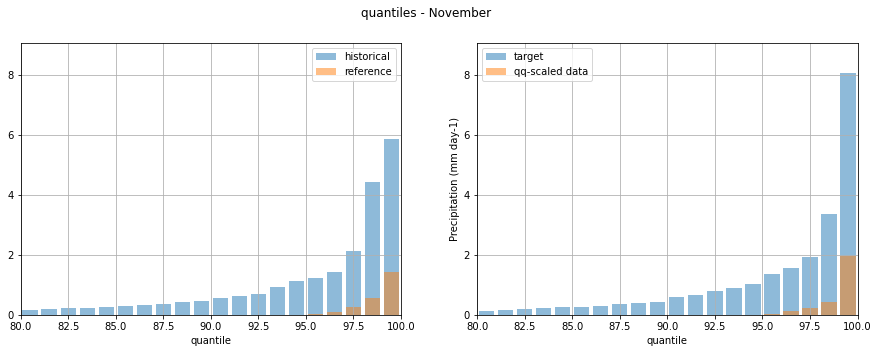

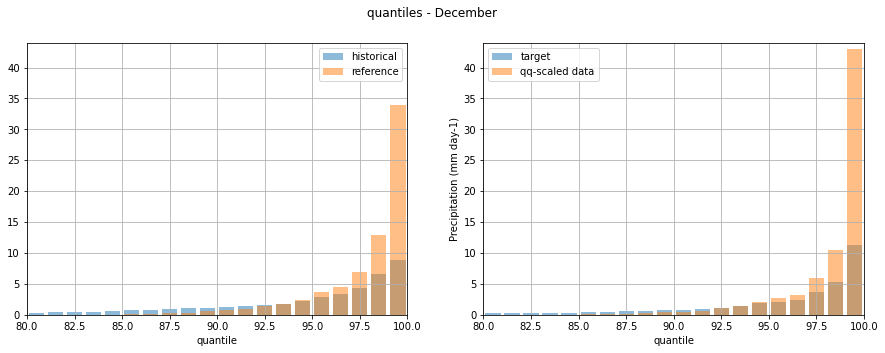

In [37]:
plot_city('Port Hedland')

PERTH


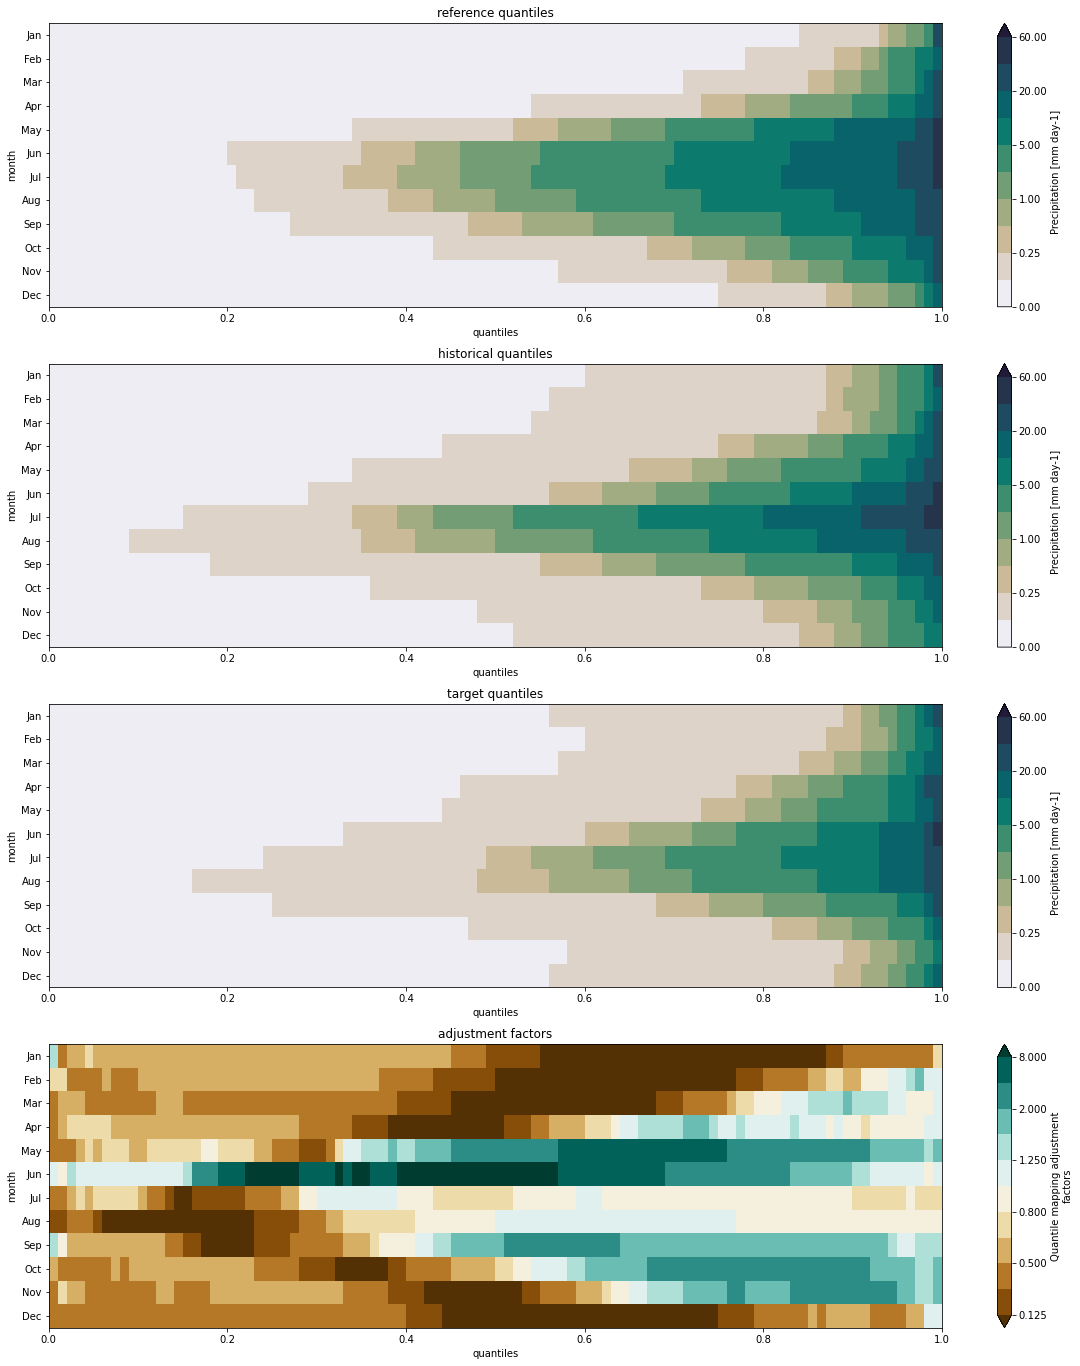

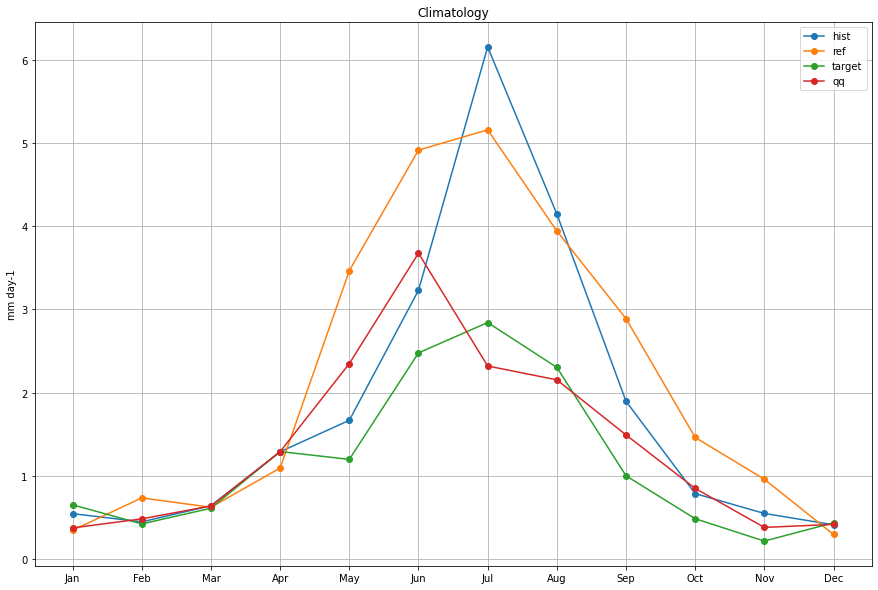

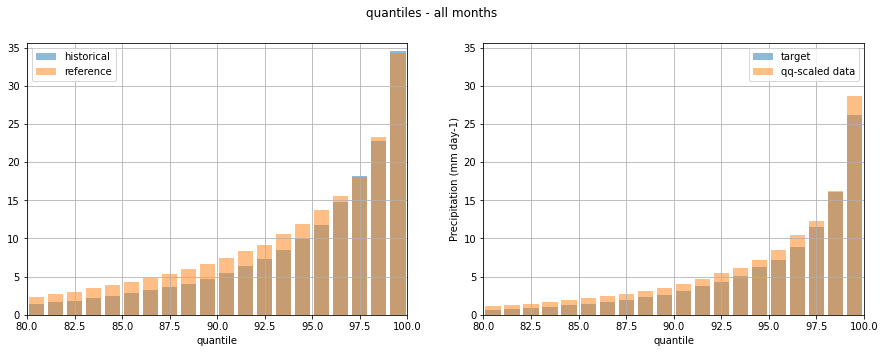

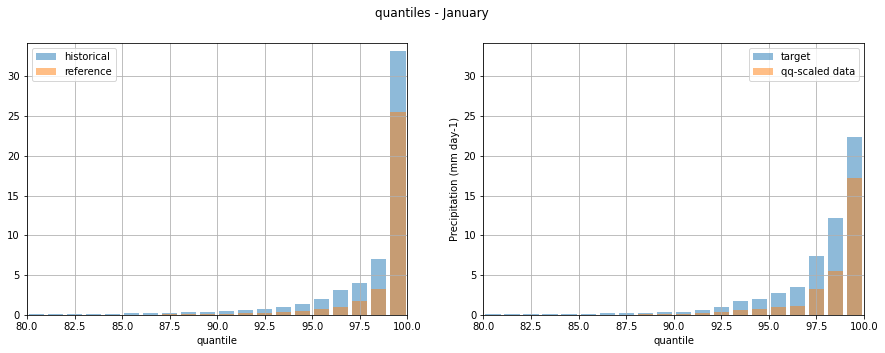

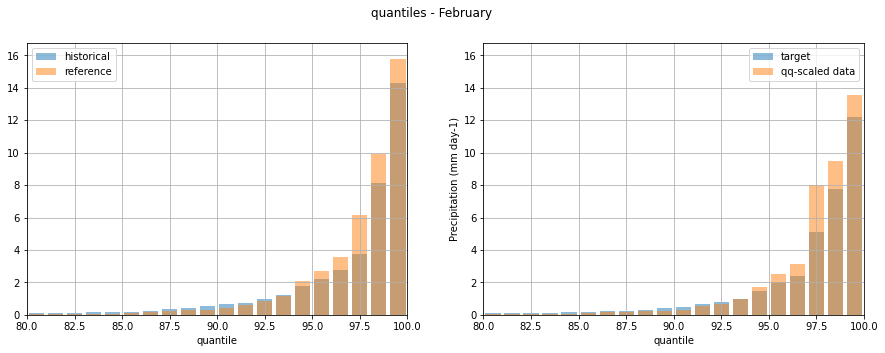

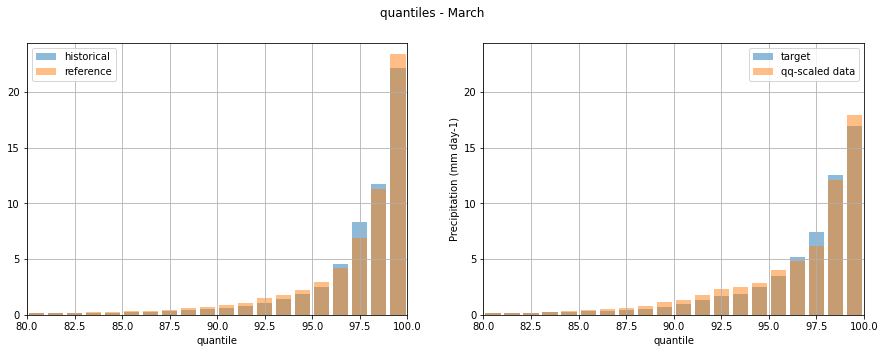

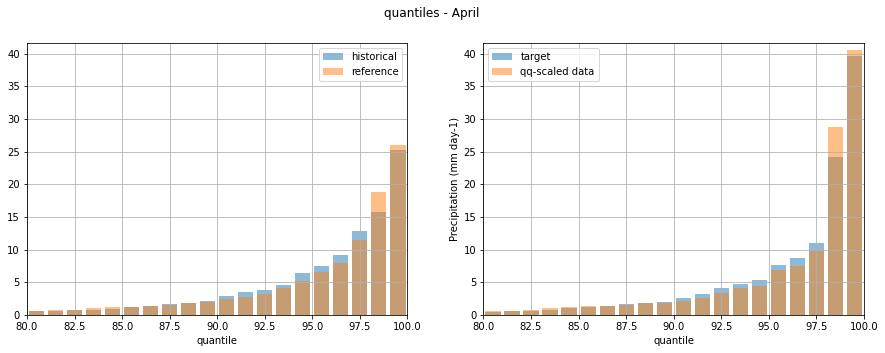

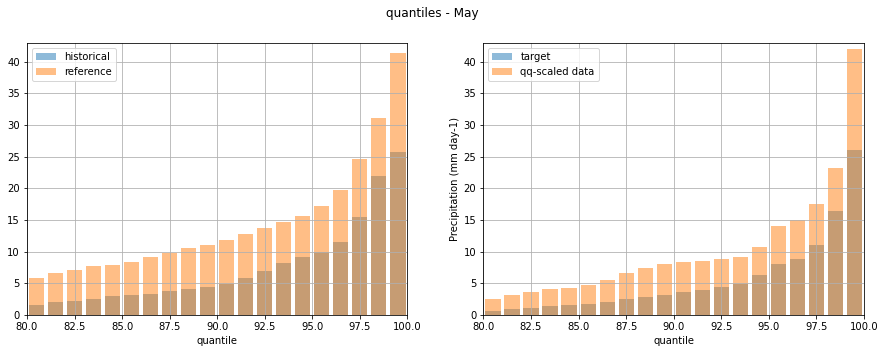

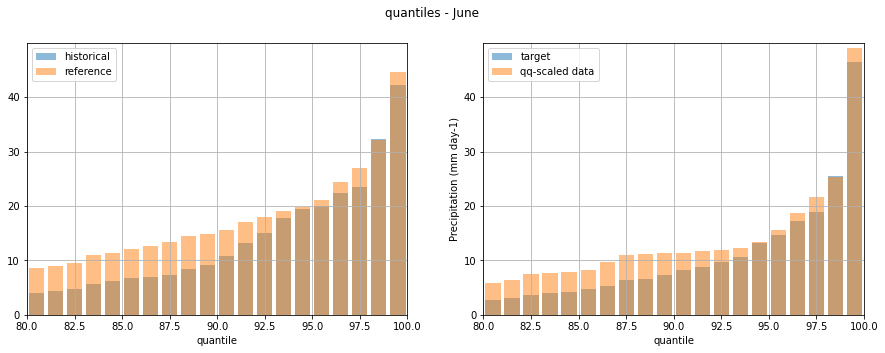

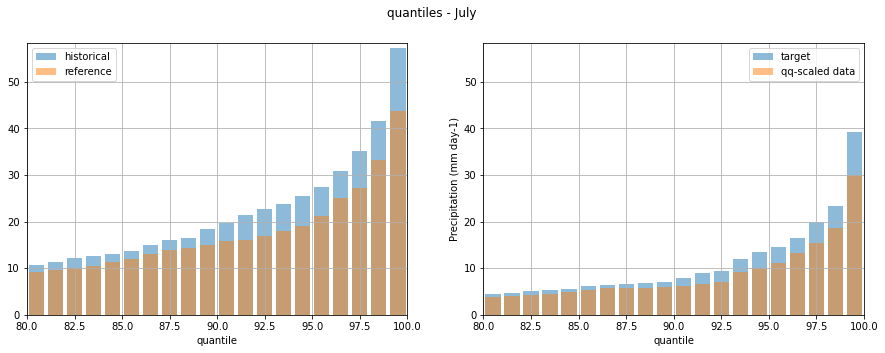

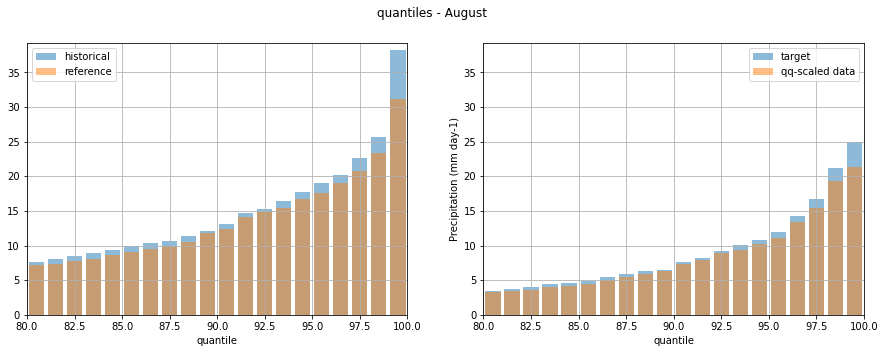

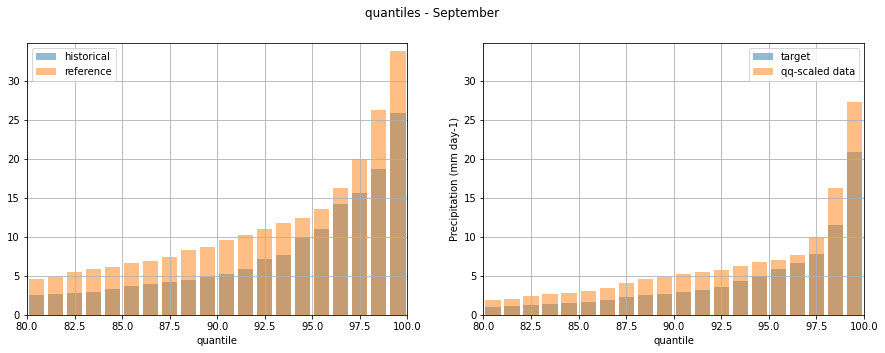

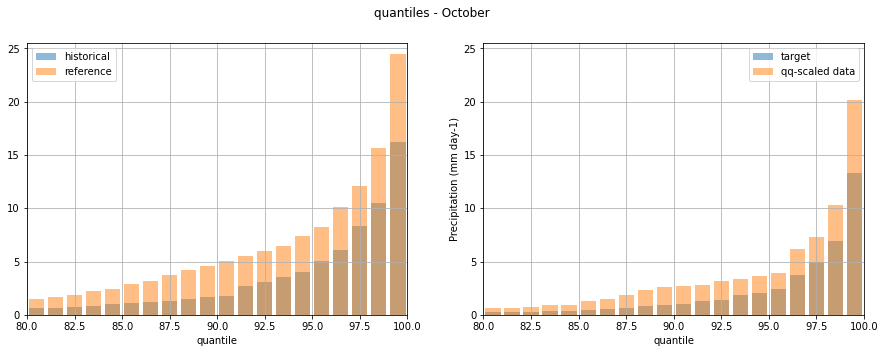

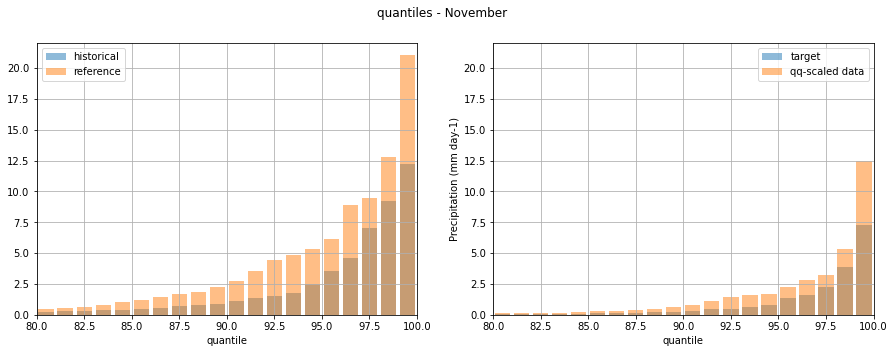

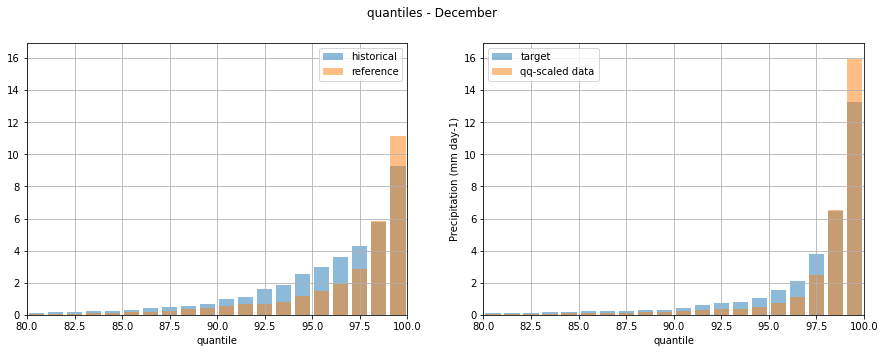

In [38]:
plot_city('Perth')

ADELAIDE


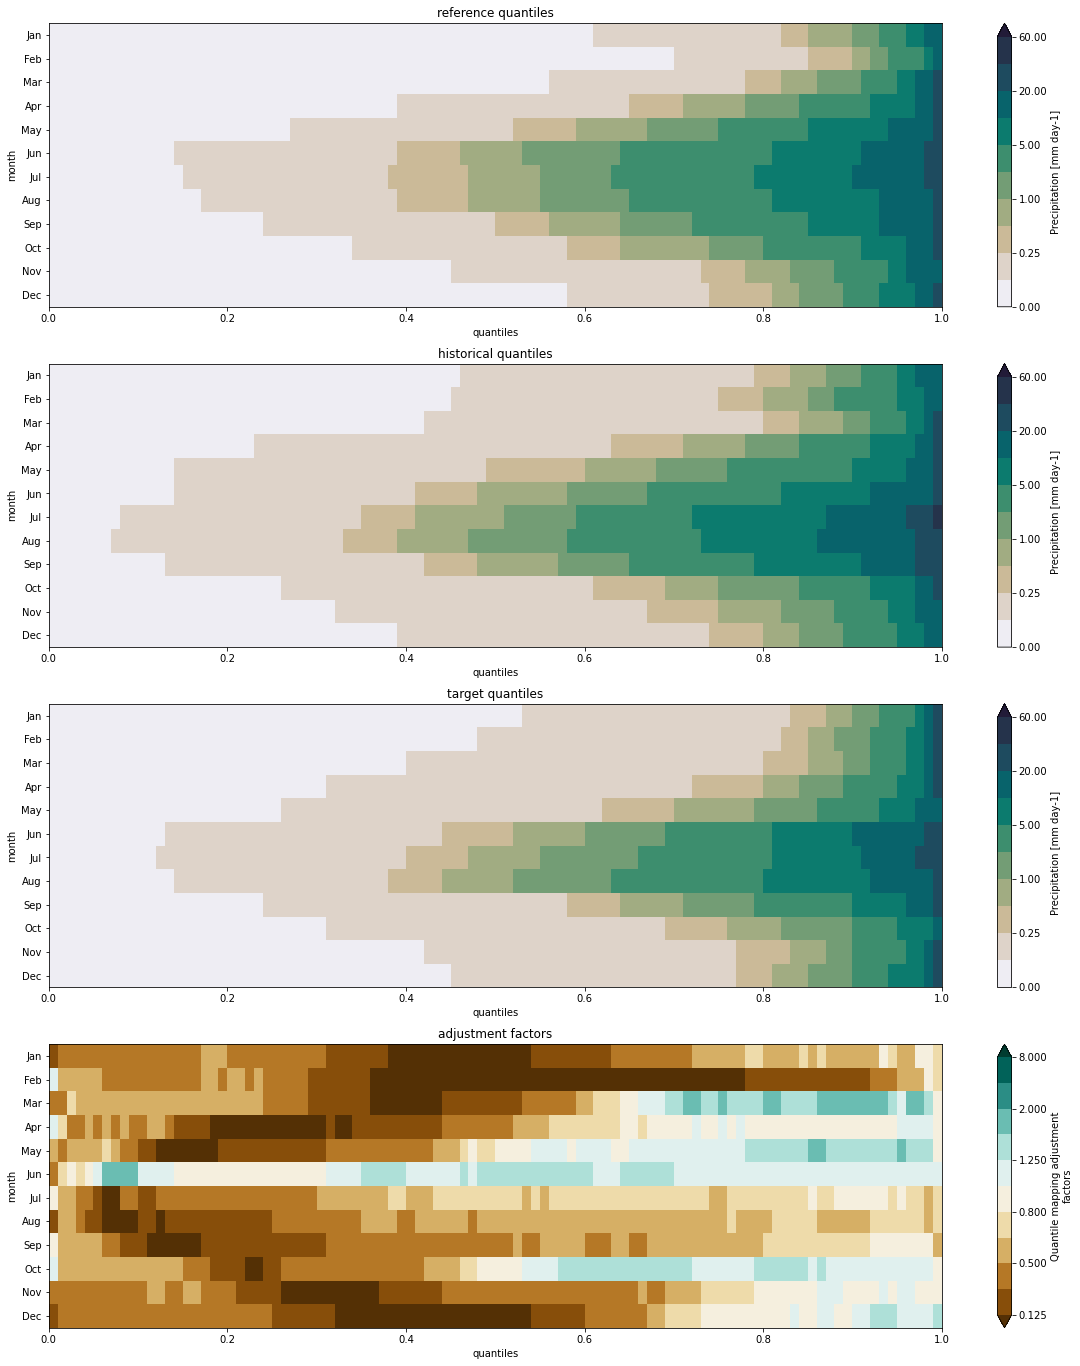

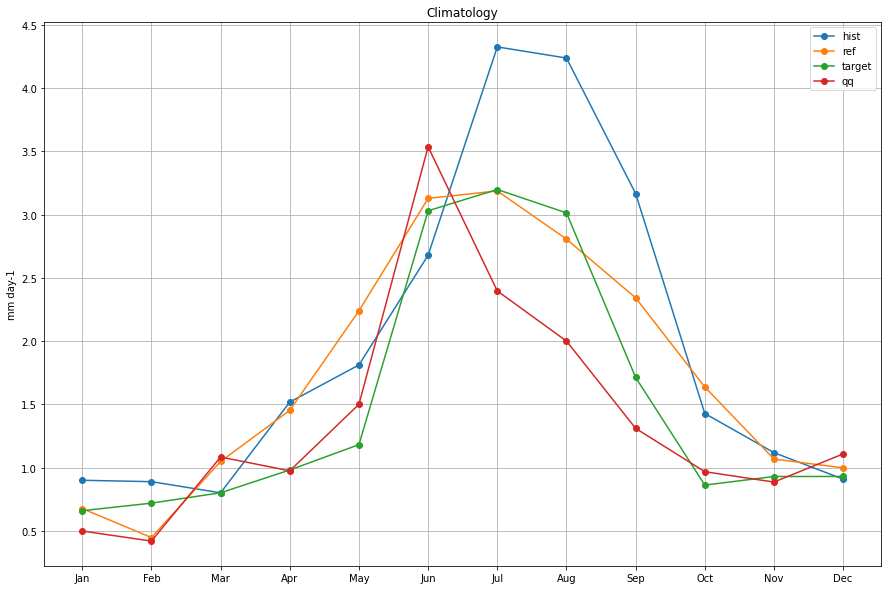

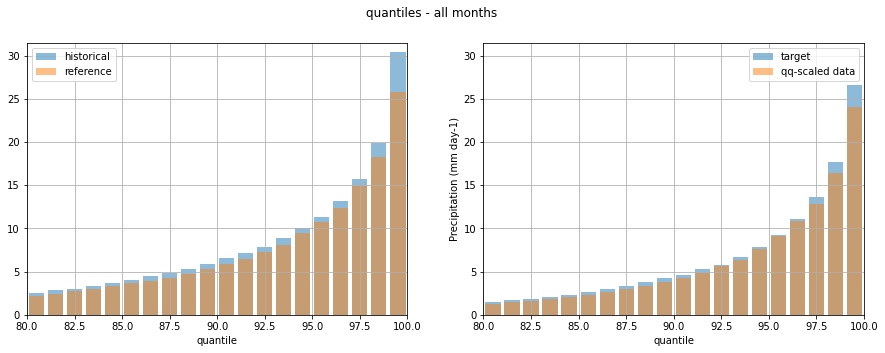

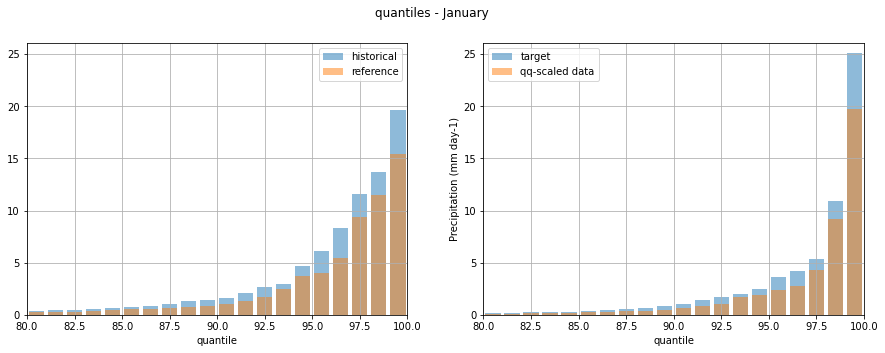

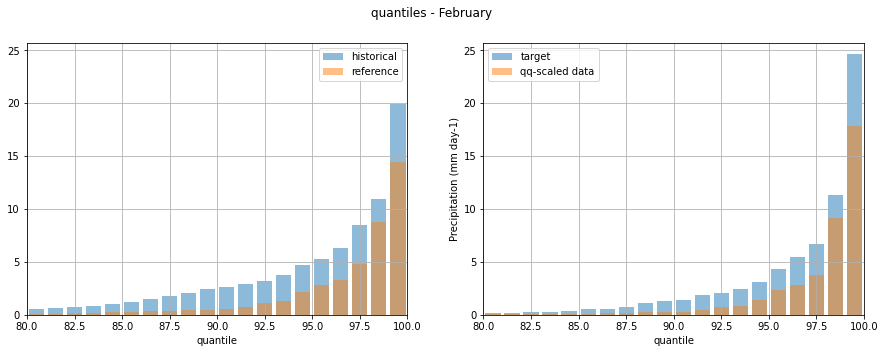

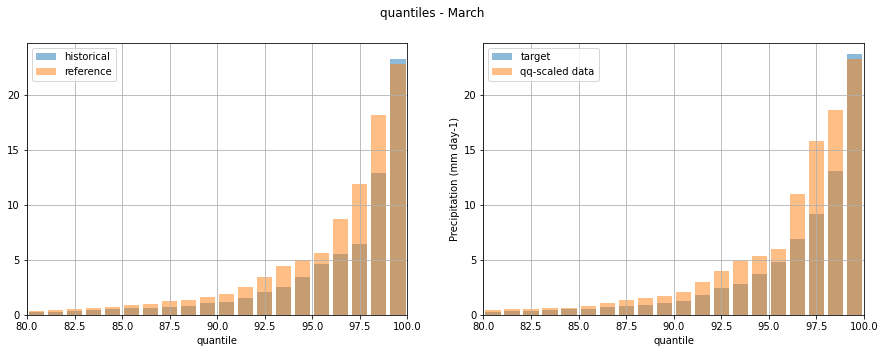

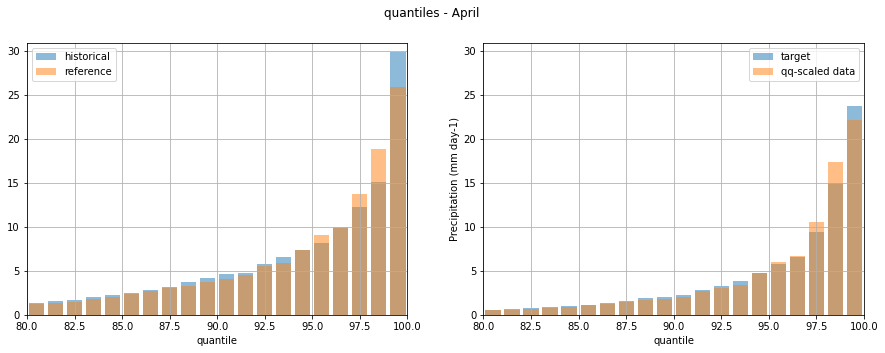

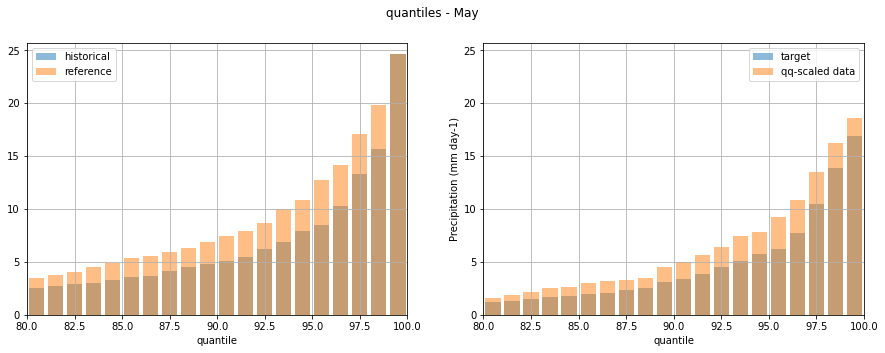

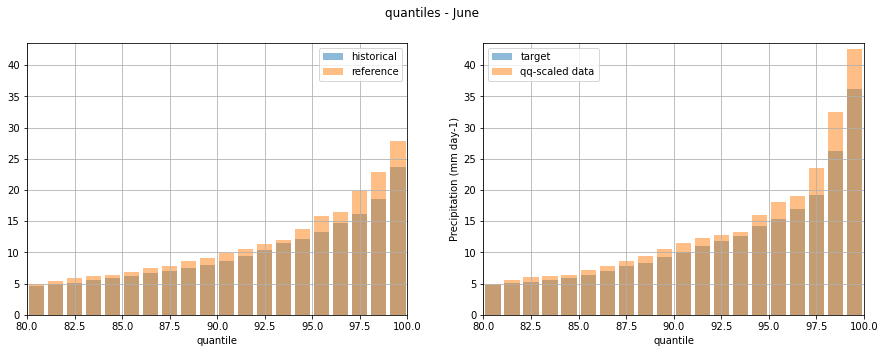

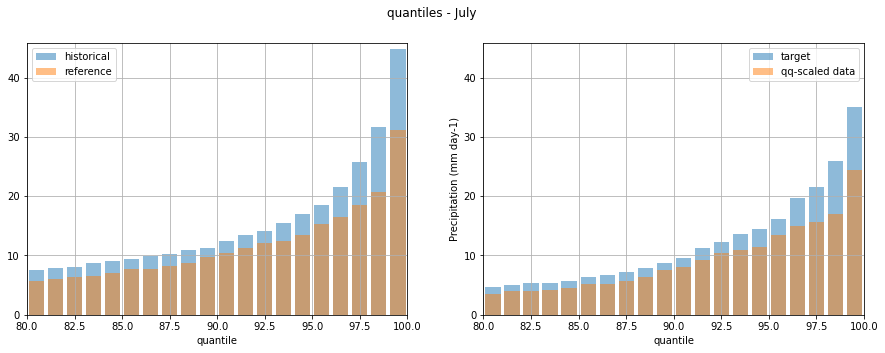

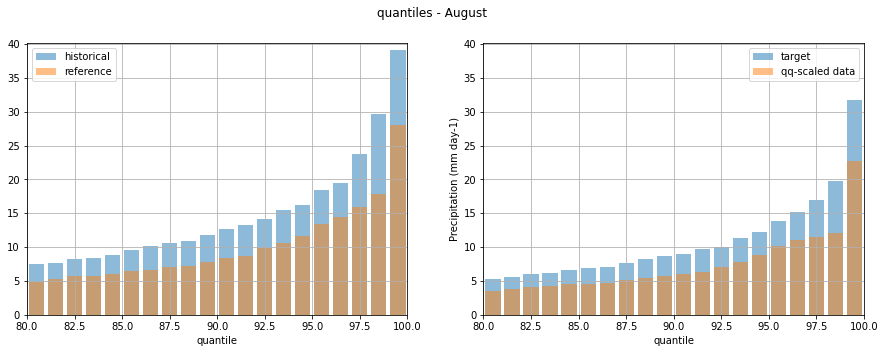

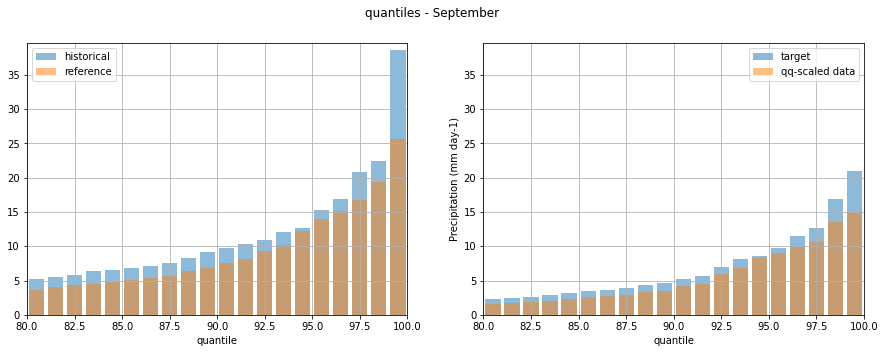

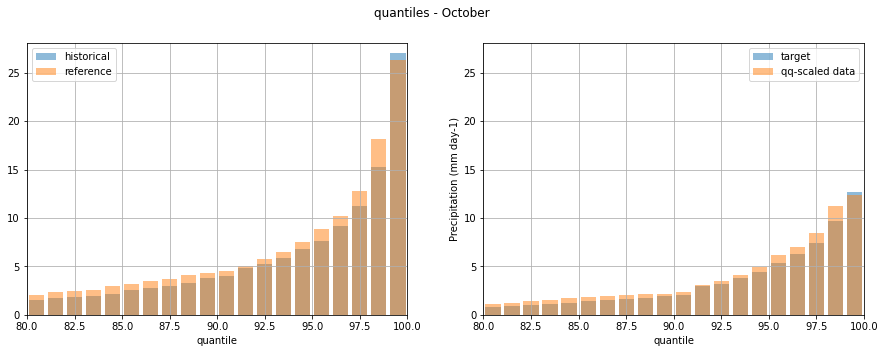

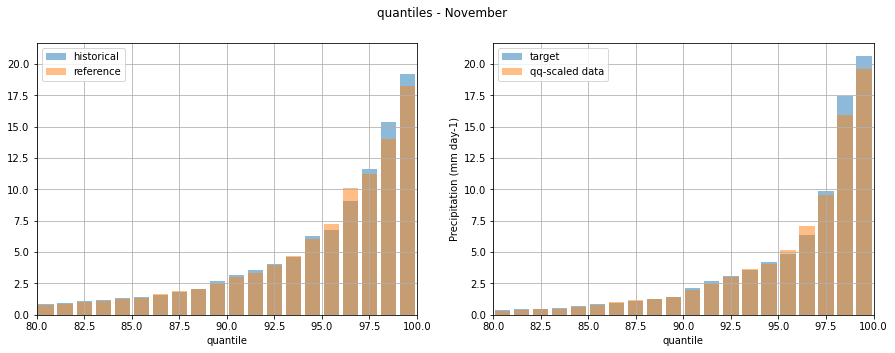

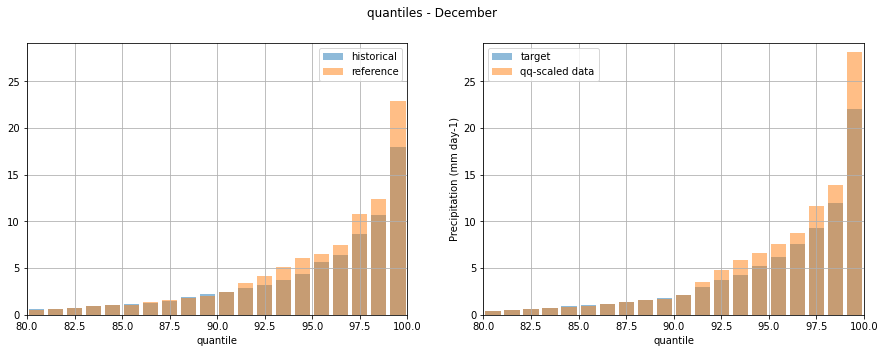

In [39]:
plot_city('Adelaide')